# 

# Customer Churn Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# 

### EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
for columns in df.columns:
    unique = df[columns].unique()
    print(f'Columns:{columns}')
    print(f'Unique values:{unique}')
    print('\n')

Columns:customerID
Unique values:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Columns:gender
Unique values:['Female' 'Male']


Columns:SeniorCitizen
Unique values:[0 1]


Columns:Partner
Unique values:['Yes' 'No']


Columns:Dependents
Unique values:['No' 'Yes']


Columns:tenure
Unique values:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Columns:PhoneService
Unique values:['No' 'Yes']


Columns:MultipleLines
Unique values:['No phone service' 'No' 'Yes']


Columns:InternetService
Unique values:['DSL' 'Fiber optic' 'No']


Columns:OnlineSecurity
Unique values:['No' 'Yes' 'No internet service']


Columns:OnlineBackup
Unique values:['Yes' 'No' 'No internet service']


Columns:DeviceProtection
Unique values:['No' 'Yes' 'No internet service']


Columns:TechSupport
Unique val

##### Dropping unnecessary columns

In [8]:
df.drop(['customerID'],axis=1,inplace=True)

In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 

### Imputation

In [13]:
for columns in df.columns:
    unique_values=df[columns].unique()
    print(f'columns: {columns}')
    print(unique_values)
    print('\n')

columns: gender
['Female' 'Male']


columns: SeniorCitizen
[0 1]


columns: Partner
['Yes' 'No']


columns: Dependents
['No' 'Yes']


columns: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


columns: PhoneService
['No' 'Yes']


columns: MultipleLines
['No phone service' 'No' 'Yes']


columns: InternetService
['DSL' 'Fiber optic' 'No']


columns: OnlineSecurity
['No' 'Yes' 'No internet service']


columns: OnlineBackup
['Yes' 'No' 'No internet service']


columns: DeviceProtection
['No' 'Yes' 'No internet service']


columns: TechSupport
['No' 'Yes' 'No internet service']


columns: StreamingTV
['No' 'Yes' 'No internet service']


columns: StreamingMovies
['No' 'Yes' 'No internet service']


columns: Contract
['Month-to-month' 'One year' 'Two year']


columns: PaperlessBilling
['Yes' 'No']


columns: Paym

In [14]:
for columns in df.columns:
    value_counts=df[columns].value_counts()
    print(f'columns: {columns}')
    print(value_counts)
    print('\n')

columns: gender
Male      3555
Female    3488
Name: gender, dtype: int64


columns: SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


columns: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


columns: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


columns: tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


columns: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


columns: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


columns: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


columns: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


columns: OnlineBackup
No                     308

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### The column 'TotalCharges' have float values, but shows as object & not float. Lets check what's the issue

In [16]:
df.loc[df['TotalCharges'] == " "]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [17]:
df["TotalCharges"]=df["TotalCharges"].replace(" ", np.nan)

#### The column 'TotalCharges' had ' ' values, which is replaced with Null values, for further treatment

In [18]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df['TotalCharges'].isnull().mean()

0.001561834445548772

#### % of Null values are almost negligible, so we can drop it

In [20]:
df= df.dropna()

#### Converting the datatype of "TotalCharges" from object to float

In [21]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# 

### Encoding

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
df.gender = le.fit_transform(df.gender)
df.Partner = le.fit_transform(df.Partner)
df.Dependents = le.fit_transform(df.Dependents)
df.PhoneService = le.fit_transform(df.PhoneService)
df.MultipleLines = le.fit_transform(df.MultipleLines)
df.InternetService = le.fit_transform(df.InternetService)
df.OnlineSecurity = le.fit_transform(df.OnlineSecurity)
df.OnlineBackup = le.fit_transform(df.OnlineBackup)
df.DeviceProtection = le.fit_transform(df.DeviceProtection)
df.TechSupport = le.fit_transform(df.TechSupport)
df.StreamingTV = le.fit_transform(df.StreamingTV)
df.StreamingMovies = le.fit_transform(df.StreamingMovies)
df.Contract = le.fit_transform(df.Contract)
df.PaperlessBilling = le.fit_transform(df.PaperlessBilling)
df.PaymentMethod = le.fit_transform(df.PaymentMethod)

In [27]:
df['Churn']=df['Churn'].replace('Yes', 1)
df['Churn']=df['Churn'].replace('No', 0)

In [28]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# 

### Remove Outliners

In [29]:
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7032.000000       7032.000000  7032.000000  7032.000000   
mean       0.905859          0.903868     0.796359     0.984926   
std        0.880394          0.880178     0.861674     0.885285   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7032.000000  7032.000000       7032.000000    7032.000000   
mean          0.992890     0.688567          0.592719       1.573237   
std           0.885385     0.832934          0.491363       1.067504   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7032.000000   7032.000000  7032.000000  
mean        64.798208   2283.300441     0.265785  
std         30.085974   2266.771362     0.441782  
min         18.250000     18.800000     0.000000  
25%         35.587500    401.450000     0.000000  
50%         70.350000   1397.475000     0.000000  
75%         89.862500   3794.737500     1.000000  
max        118.750000   8684.800000     1.000000

#### Making a copy of dataframe with only continious data columns, to check outliners

In [30]:
df1=df[['MonthlyCharges','SeniorCitizen','TotalCharges']].copy()
df1

MonthlyCharges  SeniorCitizen  TotalCharges
0              29.85              0         29.85
1              56.95              0       1889.50
2              53.85              0        108.15
3              42.30              0       1840.75
4              70.70              0        151.65
...              ...            ...           ...
7038           84.80              0       1990.50
7039          103.20              0       7362.90
7040           29.60              0        346.45
7041           74.40              1        306.60
7042          105.65              0       6844.50

[7032 rows x 3 columns]

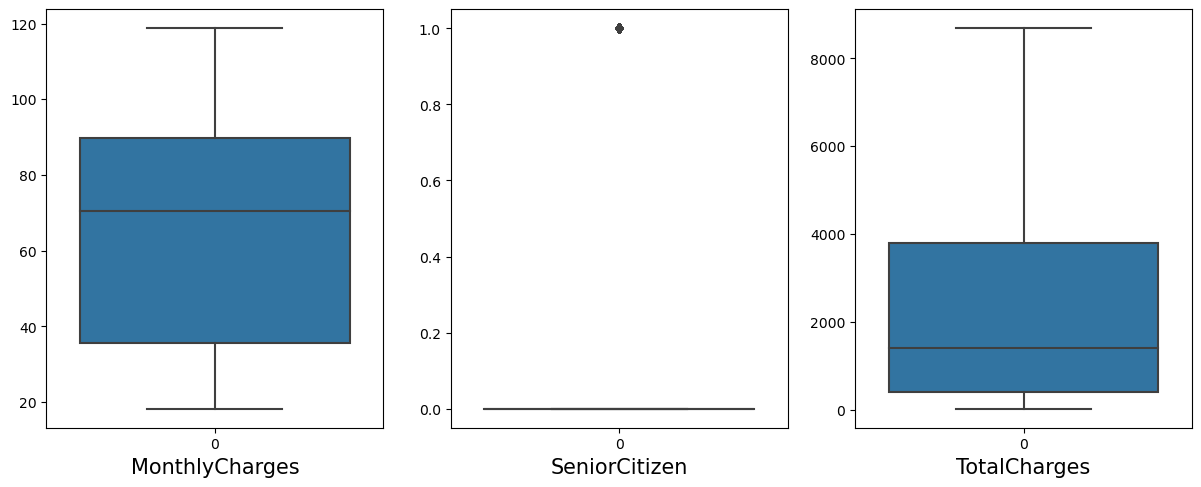

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df1: 
    if graph<=3:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df1[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [32]:
from scipy.stats import zscore 

z_score = zscore (df[['MonthlyCharges','SeniorCitizen','TotalCharges']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]

df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7032.000000       7032.000000  7032.000000  7032.000000   
mean       0.905859          0.903868     0.796359     0.984926   
std        0.880394          0.880178     0.861674     0.885285   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7032.000000  7032.000000       7032.000000    7032.000000   
mean          0.992890     0.688567          0.592719       1.573237   
std           0.885385     0.832934          0.491363       1.067504   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7032.000000   7032.000000  7032.000000  
mean        64.798208   2283.300441     0.265785  
std         30.085974   2266.771362     0.441782  
min         18.250000     18.800000     0.000000  
25%         35.587500    401.450000     0.000000  
50%         70.350000   1397.475000     0.000000  
75%         89.862500   3794.737500     1.000000  
max        118.750000   8684.800000     1.000000

In [33]:
df.shape

(7032, 20)

# 

### Removing Skewness

In [34]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

#### Making a copy of dataframe with only continious data columns, to check skewness

In [35]:
df1=df[['tenure','MonthlyCharges','TotalCharges']].copy()

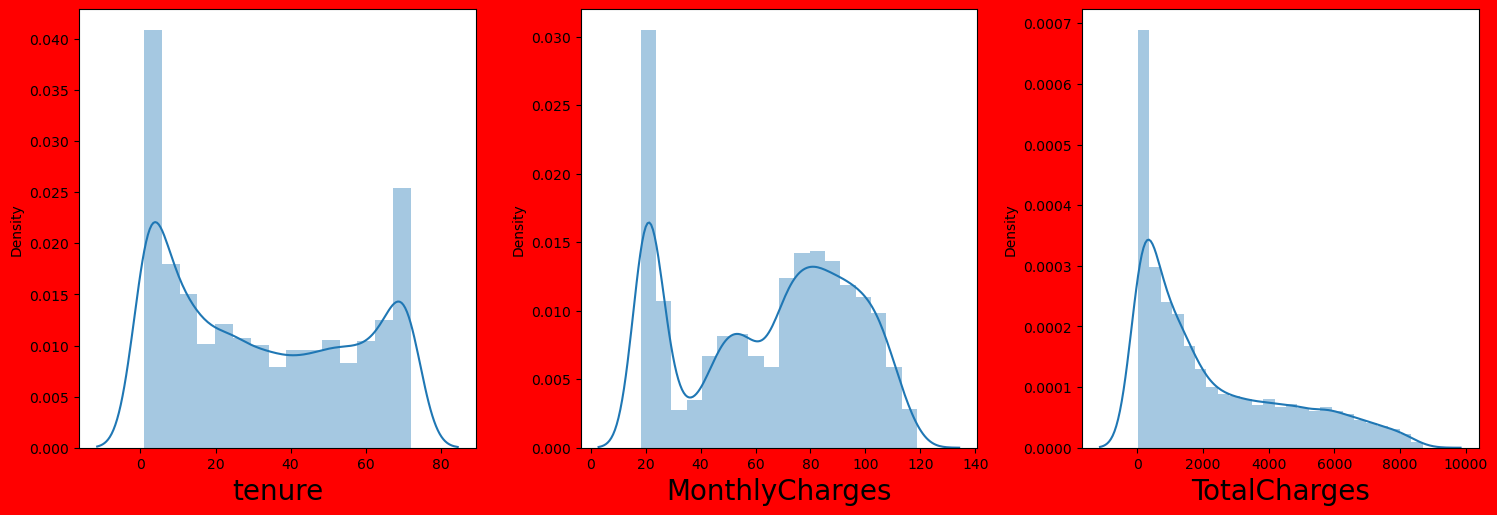

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20), facecolor='red')
plotnumber = 1

for column in df1:                       
    if plotnumber<=4:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df1[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [37]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [38]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges       -0.743089
Churn               1.060622
dtype: float64

#### Making a copy of dataframe with only continious data columns, to check skewness again

In [39]:
df1=df[['tenure','MonthlyCharges','TotalCharges']].copy()

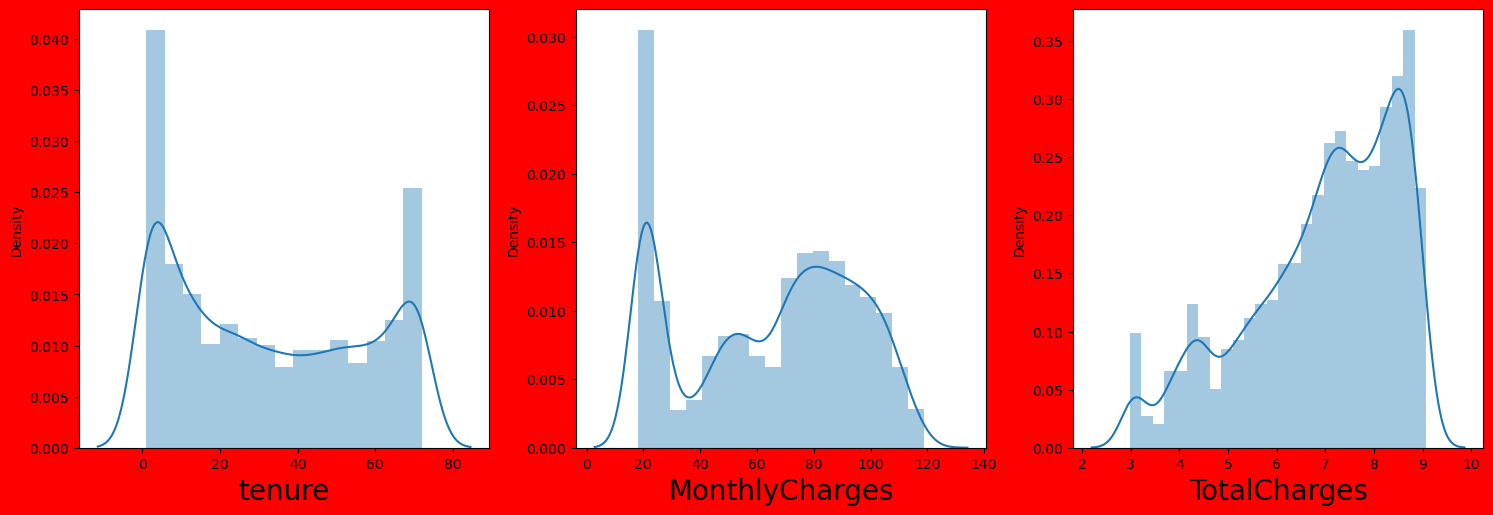

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20), facecolor='red')
plotnumber = 1

for column in df1:                       
    if plotnumber<=4:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df1[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [41]:
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7032.000000       7032.000000  7032.000000  7032.000000   
mean       0.905859          0.903868     0.796359     0.984926   
std        0.880394          0.880178     0.861674     0.885285   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7032.000000  7032.000000       7032.000000    7032.000000   
mean          0.992890     0.688567          0.592719       1.573237   
std           0.885385     0.832934          0.491363       1.067504   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7032.000000   7032.000000  7032.000000  
mean        64.798208      6.943387     0.265785  
std         30.085974      1.546438     0.441782  
min         18.250000      2.985682     0.000000  
25%         35.587500      5.997571     0.000000  
50%         70.350000      7.243138     0.000000  
75%         89.862500      8.241634     1.000000  
max        118.750000      9.069445     1.000000

In [42]:
df.shape

(7032, 20)

# 

### Checking Contribution Score

In [43]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

In [45]:
df.shape

(7032, 20)

In [46]:
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [47]:
best_features = SelectKBest(score_func=f_classif, k=19)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(19, 'Score'))

        Feature_Name        Score
14          Contract  1308.616162
4             tenure  1007.509431
8     OnlineSecurity   640.904068
11       TechSupport   608.441398
18      TotalCharges   436.961317
9       OnlineBackup   278.742773
17    MonthlyCharges   271.576990
15  PaperlessBilling   267.487636
10  DeviceProtection   229.715033
3         Dependents   192.188857
1      SeniorCitizen   163.012426
2            Partner   161.775966
16     PaymentMethod    82.735749
7    InternetService    15.628210
13   StreamingMovies    10.600156
6      MultipleLines    10.189201
12       StreamingTV     9.276976
5       PhoneService     0.961054
0             gender     0.513304


In [48]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Dropping featured columns that have very less contribution

In [49]:
df = df.drop(columns=['PaymentMethod','InternetService','StreamingMovies','MultipleLines','StreamingTV','StreamingTV','PhoneService','gender'])
df.head()

SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0       1               0             2   
1              0        0           0      34               2             0   
2              0        0           0       2               2             2   
3              0        0           0      45               2             0   
4              0        0           0       2               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  MonthlyCharges  \
0                 0            0         0                 1           29.85   
1                 2            0         1                 0           56.95   
2                 0            0         0                 1           53.85   
3                 2            2         1                 0           42.30   
4                 0            0         0                 1           70.70   

   TotalCharges  Churn  
0      3.429137      0  
1      7.544597      0  
2      4.692723      1  
3      7.518471      0  
4      5.028148      1

# 

### Removing Multi-colinearity

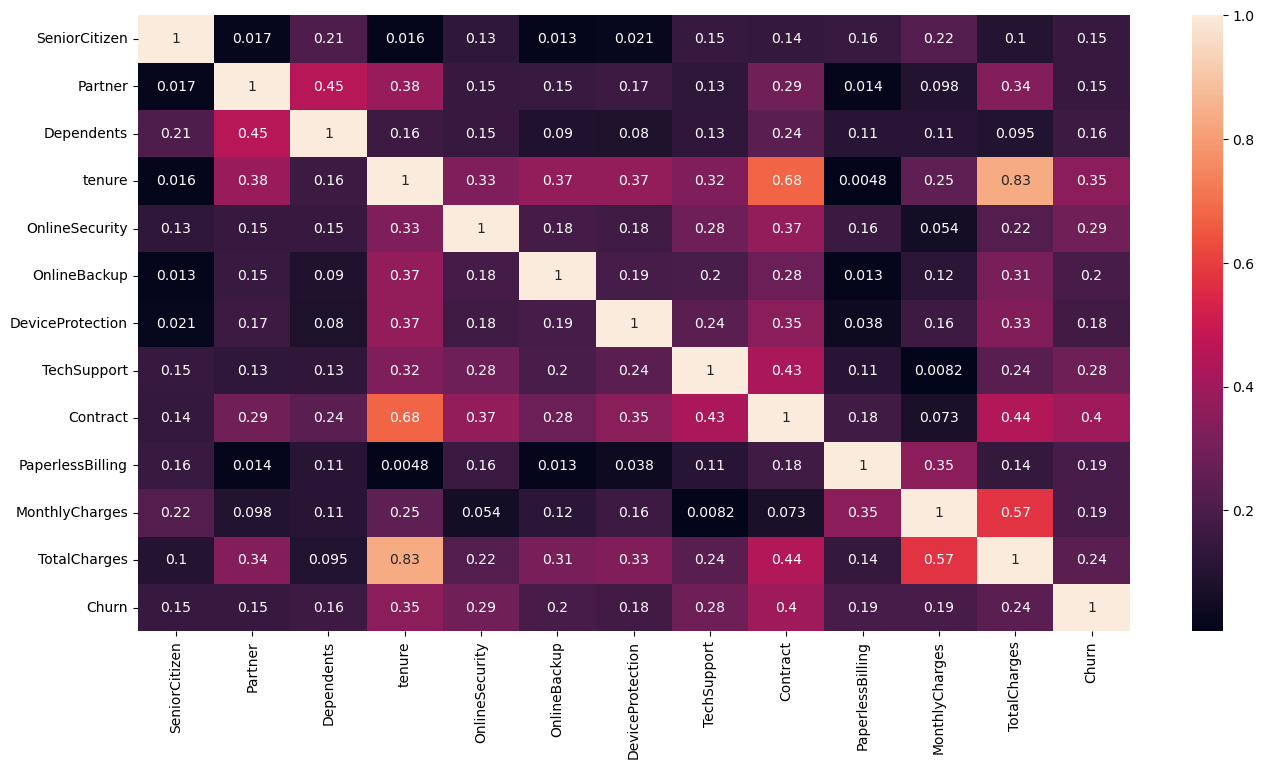

In [50]:
df_corr = df.corr().abs ()
plt.figure(figsize=(16, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

#### Removing columns that shows multicolinearity

In [51]:
df = df.drop(columns=['tenure'])
df.head()

SeniorCitizen  Partner  Dependents  OnlineSecurity  OnlineBackup  \
0              0        1           0               0             2   
1              0        0           0               2             0   
2              0        0           0               2             2   
3              0        0           0               2             0   
4              0        0           0               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  MonthlyCharges  \
0                 0            0         0                 1           29.85   
1                 2            0         1                 0           56.95   
2                 0            0         0                 1           53.85   
3                 2            2         1                 0           42.30   
4                 0            0         0                 1           70.70   

   TotalCharges  Churn  
0      3.429137      0  
1      7.544597      0  
2      4.692723      1  
3      7.518471      0  
4      5.028148      1

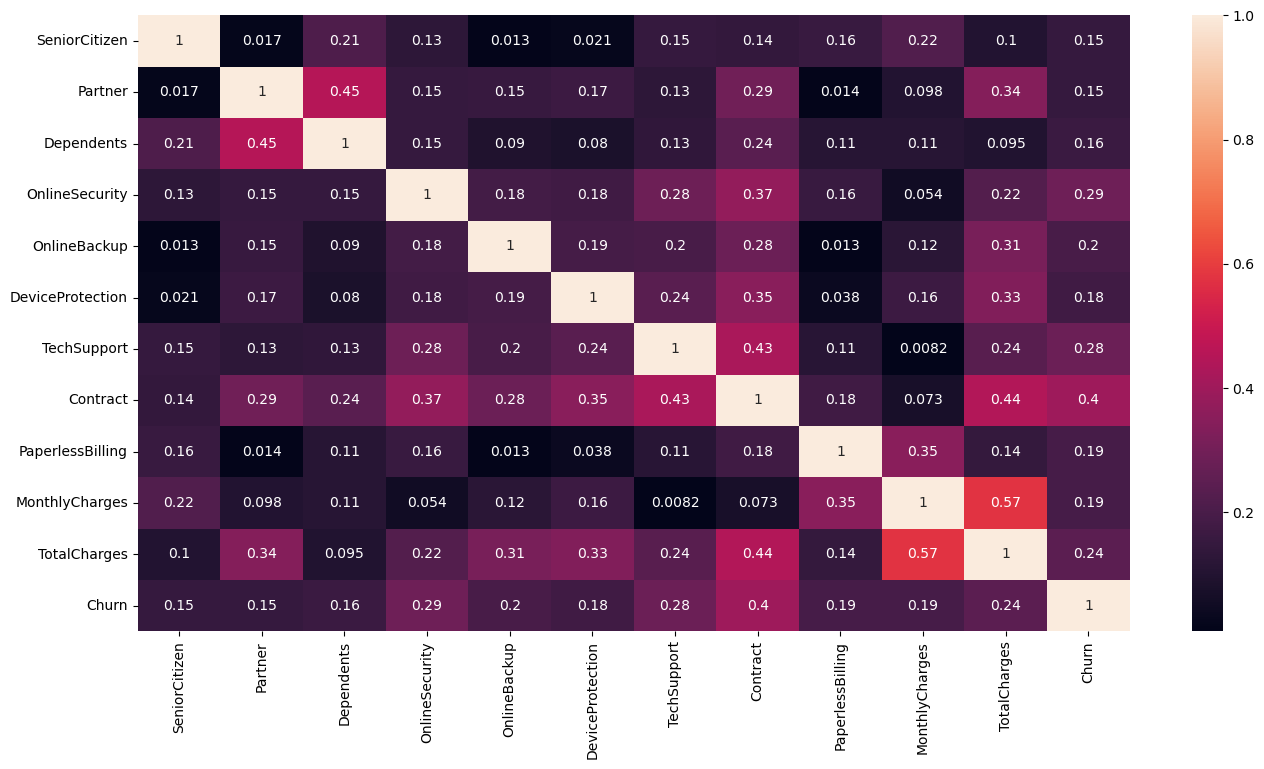

In [52]:
df_corr = df.corr().abs ()
plt.figure(figsize=(16, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Oversampling

In [53]:
df.head()

SeniorCitizen  Partner  Dependents  OnlineSecurity  OnlineBackup  \
0              0        1           0               0             2   
1              0        0           0               2             0   
2              0        0           0               2             2   
3              0        0           0               2             0   
4              0        0           0               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  MonthlyCharges  \
0                 0            0         0                 1           29.85   
1                 2            0         1                 0           56.95   
2                 0            0         0                 1           53.85   
3                 2            2         1                 0           42.30   
4                 0            0         0                 1           70.70   

   TotalCharges  Churn  
0      3.429137      0  
1      7.544597      0  
2      4.692723      1  
3      7.518471      0  
4      5.028148      1

In [54]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
df["Churn"].unique()

array([0, 1], dtype=int64)

In [56]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
upsample = SMOTE()

In [60]:
x, y = upsample.fit_resample(x,y)

In [61]:
from collections import Counter
count = Counter(y)
print(count)

Counter({0: 5163, 1: 5163})


# 

### Standardization

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Train-Test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [263]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [264]:
cls_reg.coef_

array([[-0.06658795, -0.1055854 , -0.30516837, -0.23130904, -0.14337691,
        -0.02741732, -0.23187645, -0.90029106,  0.03711433,  1.05977445,
        -0.77010904]])

In [265]:
cls_reg.intercept_

array([-0.23037192])

In [266]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.7816373966942148


In [267]:
y_pred = cls_reg.predict(x_test)

In [268]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7935708752904725


In [269]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 952,  325],
       [ 208, 1097]], dtype=int64)

In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1277
           1       0.77      0.84      0.80      1305

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582



In [271]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [272]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84061303 1.        ]
False Positive rate =  [0.         0.25450274 1.        ]


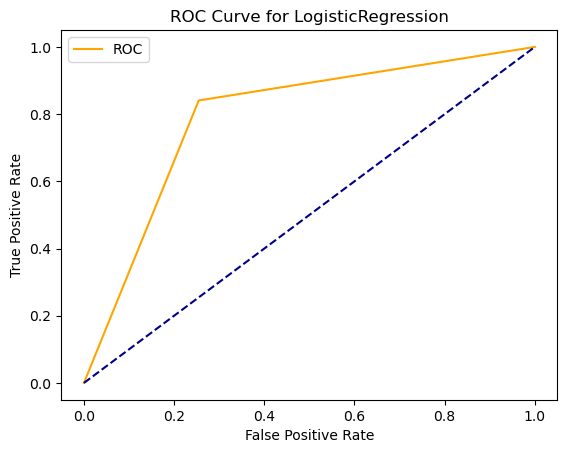

In [273]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

### Cross-validation

In [274]:
from sklearn.model_selection import KFold, cross_val_score

In [275]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.79212395, 0.78954164, 0.78114913, 0.76759199, 0.76421189])

In [276]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.7789237200627894

In [277]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.80464217, 0.77756286, 0.81782946, 0.77906977, 0.7751938 ])

In [278]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.7908596104538708

In [279]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [280]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84061303 1.        ]
False Positive rate =  [0.         0.25450274 1.        ]


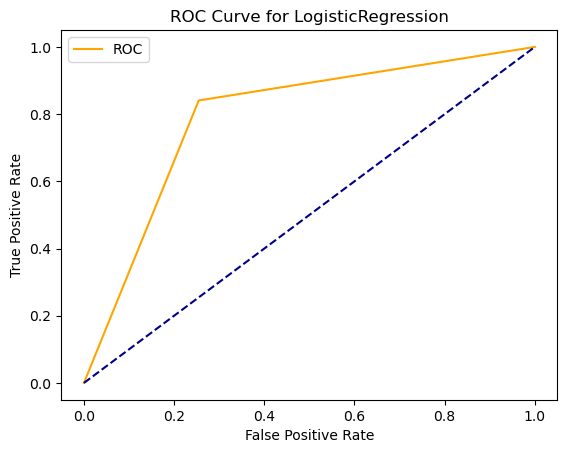

In [281]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to LogisticRegression

In [282]:
from sklearn.ensemble import BaggingClassifier

In [283]:
bag0 = BaggingClassifier(LogisticRegression())

In [284]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [285]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.7826704545454546


In [286]:
y_pred = bag0.predict(x_test)

In [287]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7924089852827265


In [288]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 945,  332],
       [ 204, 1101]], dtype=int64)

In [289]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1277
           1       0.77      0.84      0.80      1305

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582



In [290]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [291]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84367816 1.        ]
False Positive rate =  [0.         0.25998434 1.        ]


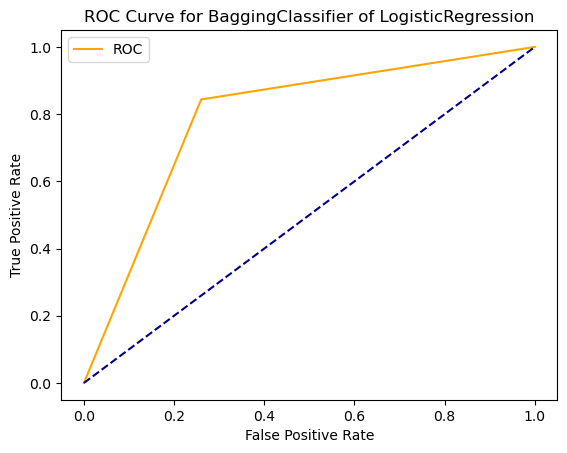

In [292]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of LogisticRegression')
plt.legend()
plt.show()

### Cross-validation

In [293]:
from sklearn.model_selection import KFold, cross_val_score

In [294]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.79018722, 0.78954164, 0.78114913, 0.76823757, 0.7629199 ])

In [295]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.7804733569878375

In [296]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.8065764 , 0.77369439, 0.81782946, 0.77713178, 0.7751938 ])

In [297]:
cross_val_score (bag0, x_test, y_test, cv=5).mean()

0.7889261241809485

In [298]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [299]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84367816 1.        ]
False Positive rate =  [0.         0.25998434 1.        ]


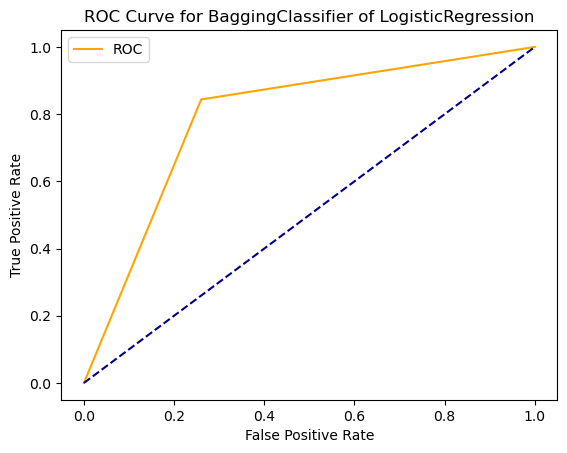

In [300]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of LogisticRegression')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [301]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [316]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10)

In [317]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [318]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8495609504132231


In [319]:
y_pred = cls_dt.predict(x_test)

In [320]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.786599535243997


In [321]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 956,  321],
       [ 230, 1075]], dtype=int64)

In [322]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1277
           1       0.77      0.82      0.80      1305

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582



In [323]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [324]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.82375479 1.        ]
False Positive rate =  [0.        0.2513704 1.       ]


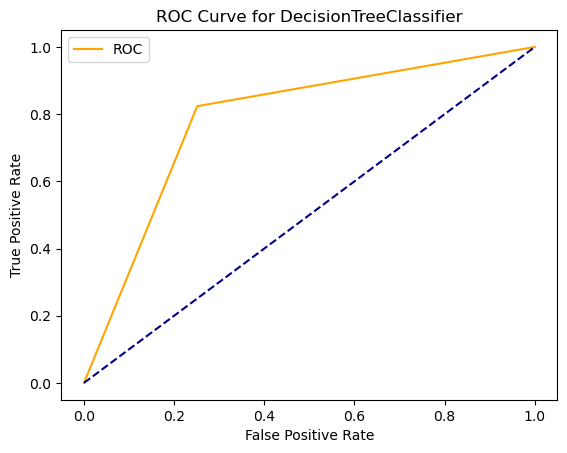

In [325]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

### Cross-validation

In [326]:
from sklearn.model_selection import KFold, cross_val_score

In [327]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.78050355, 0.75919948, 0.76630084, 0.77727566, 0.78229974])

In [328]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.7724701107491205

In [329]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.76208897, 0.75241779, 0.78100775, 0.75581395, 0.74612403])

In [330]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.7598773484473633

In [331]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [332]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.82375479 1.        ]
False Positive rate =  [0.        0.2513704 1.       ]


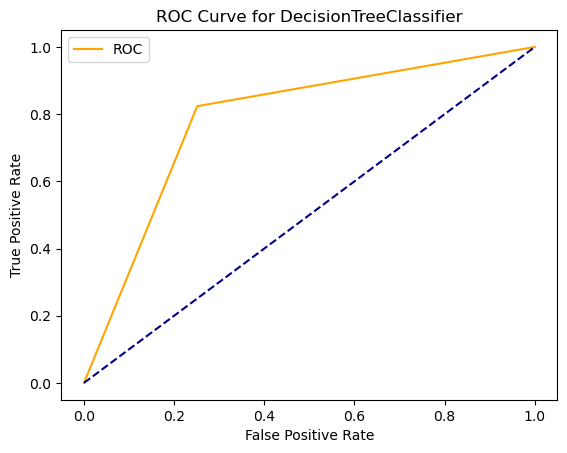

In [333]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [334]:
from sklearn.ensemble import BaggingClassifier

In [335]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10))

In [336]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        min_samples_split=10))

In [337]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.8706095041322314


In [338]:
y_pred = bag1.predict(x_test)

In [339]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8117738187451587


In [340]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 984,  293],
       [ 193, 1112]], dtype=int64)

In [341]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1277
           1       0.79      0.85      0.82      1305

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582



In [342]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [343]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85210728 1.        ]
False Positive rate =  [0.         0.22944401 1.        ]


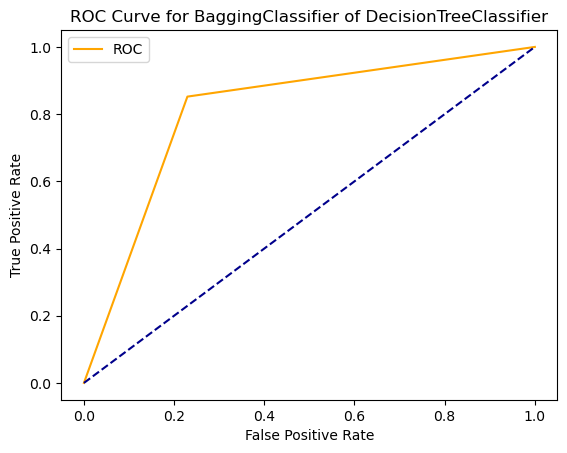

In [344]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of DecisionTreeClassifier')
plt.legend()
plt.show()

### Cross-validation

In [136]:
from sklearn.model_selection import KFold, cross_val_score

In [137]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.81149128, 0.80374435, 0.78889606, 0.80632666, 0.7751938 ])

In [138]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.797260631598614

In [139]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.80077369, 0.78143133, 0.79651163, 0.79069767, 0.76162791])

In [140]:
cross_val_score (bag1, x_test, y_test, cv=5).mean()

0.7873727377685814

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [142]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85670498 1.        ]
False Positive rate =  [0.         0.23179327 1.        ]


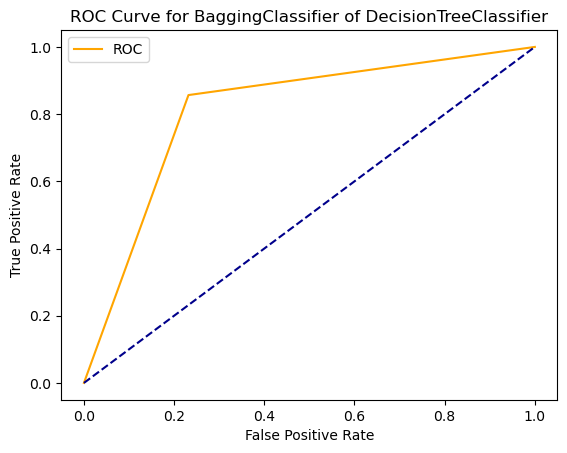

In [143]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of DecisionTreeClassifier')
plt.legend()
plt.show()

# 

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [74]:
cls_rf = RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16)

In [75]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=240)

In [76]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.9682334710743802


In [77]:
y_pred = cls_rf.predict(x_test)

In [78]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8237800154918667


In [150]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1010,  267],
       [ 183, 1122]], dtype=int64)

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1277
           1       0.81      0.86      0.83      1305

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582



In [152]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [153]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85977011 1.        ]
False Positive rate =  [0.         0.20908379 1.        ]


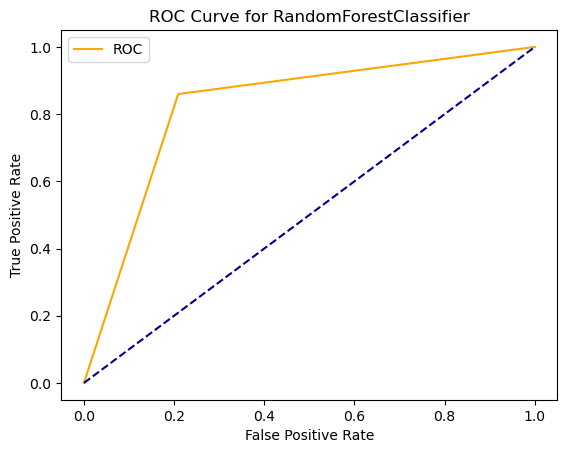

In [154]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

### Cross-validation

In [155]:
from sklearn.model_selection import KFold, cross_val_score

In [156]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.82827631, 0.81794706, 0.81278244, 0.8140736 , 0.79844961])

In [157]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.812368820093984

In [158]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.82205029, 0.77369439, 0.80620155, 0.82751938, 0.76162791])

In [159]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.7993762463826789

In [160]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [161]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85977011 1.        ]
False Positive rate =  [0.         0.20908379 1.        ]


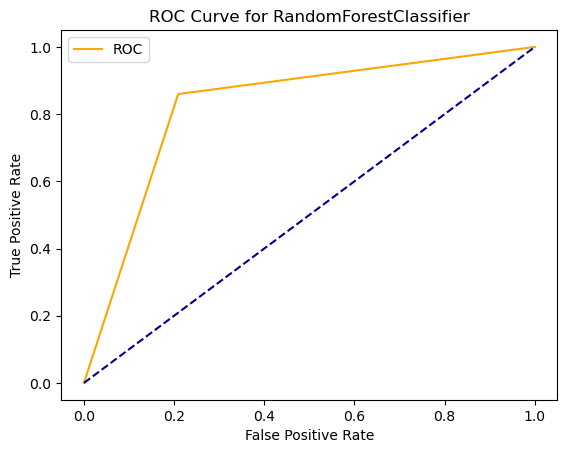

In [162]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to RandomForestClassifier

In [163]:
from sklearn.ensemble import BaggingClassifier

In [164]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16))

In [165]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=240))

In [166]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.9285898760330579


In [167]:
y_pred = bag2.predict(x_test)

In [168]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8222308288148722


In [169]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1005,  272],
       [ 187, 1118]], dtype=int64)

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1277
           1       0.80      0.86      0.83      1305

    accuracy                           0.82      2582
   macro avg       0.82      0.82      0.82      2582
weighted avg       0.82      0.82      0.82      2582



In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [172]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85670498 1.        ]
False Positive rate =  [0.         0.21299922 1.        ]


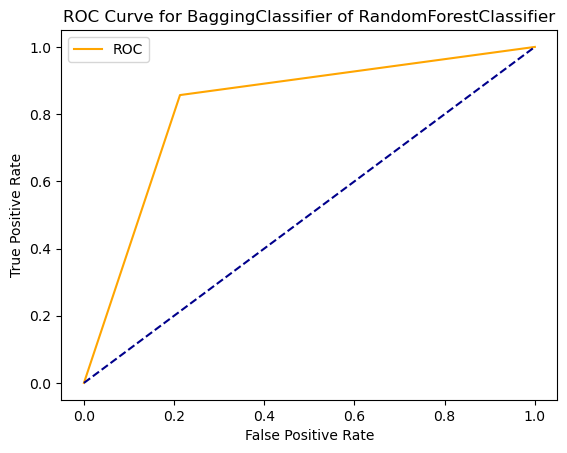

In [173]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of RandomForestClassifier')
plt.legend()
plt.show()

### Cross-validation

In [174]:
from sklearn.model_selection import KFold, cross_val_score

In [175]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.82827631, 0.81471917, 0.8082634 , 0.80955455, 0.79328165])

In [176]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.8122391206796751

In [177]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.81818182, 0.79497099, 0.81007752, 0.81395349, 0.76550388])

In [178]:
cross_val_score (bag2, x_test, y_test, cv=5).mean()

0.7970536638027979

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [180]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85670498 1.        ]
False Positive rate =  [0.         0.21299922 1.        ]


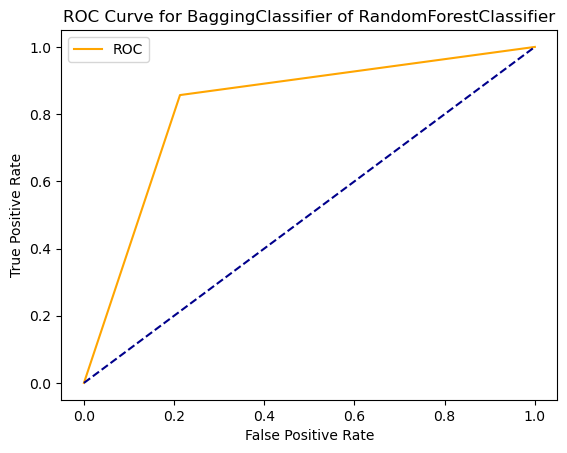

In [181]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of RandomForestClassifier')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [125]:
cls_KN = KNeighborsClassifier(n_neighbors=8, leaf_size=5, p = 1, algorithm='auto', weights = 'distance')

In [126]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=8, p=1, weights='distance')

In [127]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.996900826446281


In [128]:
y_pred = cls_KN.predict(x_test)

In [129]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.801704105344694


In [130]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 970,  307],
       [ 205, 1100]], dtype=int64)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1277
           1       0.78      0.84      0.81      1305

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582



In [132]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [133]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84291188 1.        ]
False Positive rate =  [0.        0.2404072 1.       ]


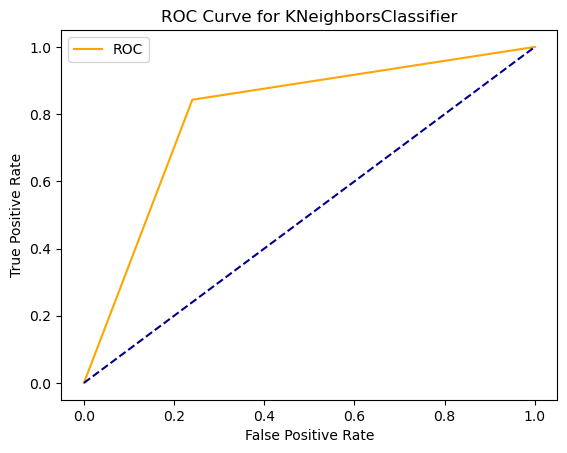

In [134]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

### Cross-validation

In [135]:
from sklearn.model_selection import KFold, cross_val_score

In [136]:
cross_val_score (cls_KN, x_train, y_train, cv=5)

array([0.79728857, 0.79922531, 0.78825048, 0.78954164, 0.79198966])

In [137]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.7932591335912308

In [138]:
cross_val_score (cls_KN, x_test, y_test, cv=5)

array([0.76982592, 0.75435203, 0.76162791, 0.7751938 , 0.76356589])

In [139]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.7649131093218179

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [199]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85210728 1.        ]
False Positive rate =  [0.         0.23884103 1.        ]


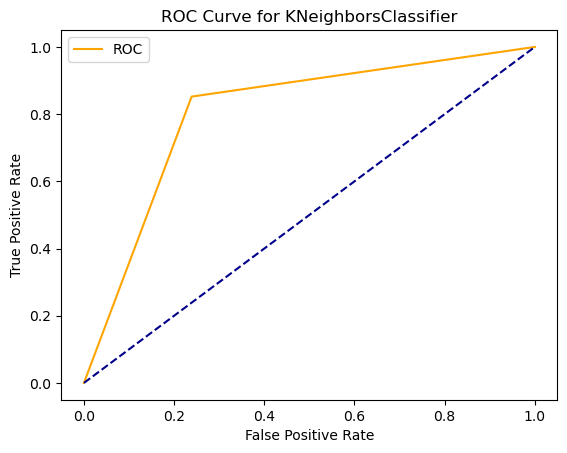

In [200]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [201]:
from sklearn.ensemble import BaggingClassifier

In [202]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=9, leaf_size=2, p = 1, algorithm='auto', weights = 'distance'))

In [203]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=2,
                                                      n_neighbors=9, p=1,
                                                      weights='distance'))

In [204]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.987603305785124


In [205]:
y_pred = bag3.predict(x_test)

In [206]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8051897753679318


In [207]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 959,  318],
       [ 185, 1120]], dtype=int64)

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1277
           1       0.78      0.86      0.82      1305

    accuracy                           0.81      2582
   macro avg       0.81      0.80      0.80      2582
weighted avg       0.81      0.81      0.80      2582



In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [210]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85823755 1.        ]
False Positive rate =  [0.         0.24902114 1.        ]


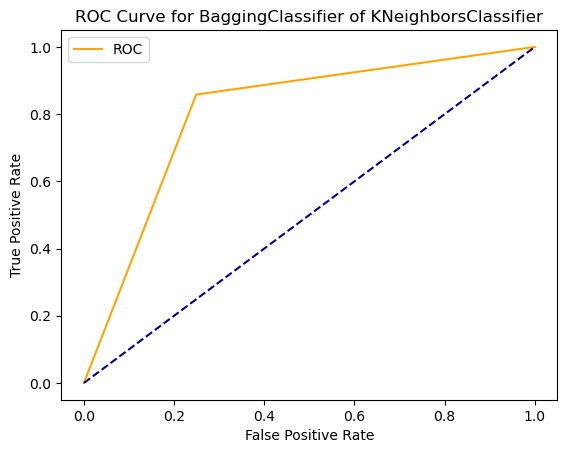

In [211]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of KNeighborsClassifier')
plt.legend()
plt.show()

### Cross-validation

In [212]:
from sklearn.model_selection import KFold, cross_val_score

In [213]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.79535184, 0.78631375, 0.77404777, 0.78437702, 0.77002584])

In [214]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.7815066150871697

In [215]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.79303675, 0.76208897, 0.78488372, 0.80813953, 0.72674419])

In [216]:
cross_val_score (bag3, x_test, y_test, cv=5).mean()

0.7722707030722865

In [217]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [218]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85823755 1.        ]
False Positive rate =  [0.         0.24902114 1.        ]


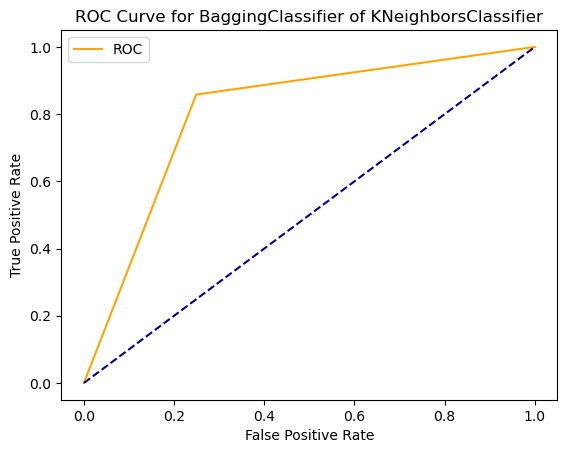

In [219]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of KNeighborsClassifier')
plt.legend()
plt.show()

# 

### GradientBoostingClassifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3)

In [222]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=17)

In [223]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8108212809917356


In [224]:
y_pred = cls_gb.predict(x_test)

In [225]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7935708752904725


In [226]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 963,  314],
       [ 219, 1086]], dtype=int64)

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1277
           1       0.78      0.83      0.80      1305

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582



In [228]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [229]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.83218391 1.        ]
False Positive rate =  [0.        0.2458888 1.       ]


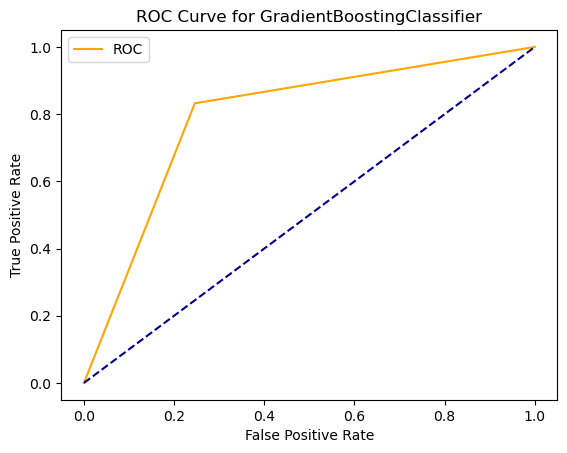

In [230]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

### Cross-validation

In [231]:
from sklearn.model_selection import KFold, cross_val_score

In [232]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.77856682, 0.7850226 , 0.76113622, 0.77792124, 0.77906977])

In [233]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.7762142117194889

In [234]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.77176015, 0.73307544, 0.78682171, 0.78100775, 0.73837209])

In [235]:
cross_val_score (cls_gb, x_test, y_test, cv=5).mean()

0.7629818721604966

In [236]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [237]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.83218391 1.        ]
False Positive rate =  [0.        0.2458888 1.       ]


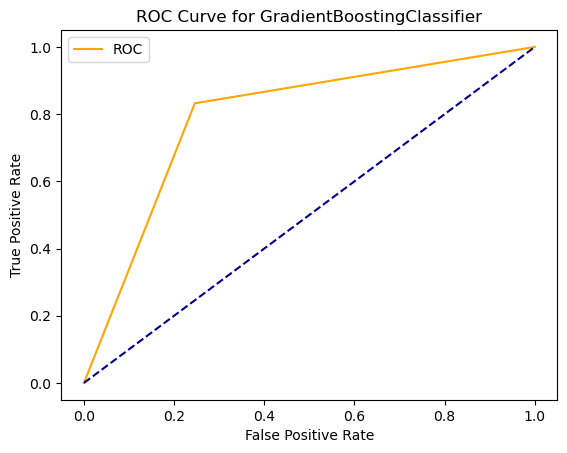

In [238]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [144]:
from sklearn.ensemble import BaggingClassifier

In [247]:
bag4 = BaggingClassifier(GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=10))

In [248]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            max_depth=10,
                                                            n_estimators=17))

In [249]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.9817923553719008


In [250]:
y_pred = bag4.predict(x_test)

In [251]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8222308288148722


In [252]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1018,  259],
       [ 200, 1105]], dtype=int64)

In [253]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1277
           1       0.81      0.85      0.83      1305

    accuracy                           0.82      2582
   macro avg       0.82      0.82      0.82      2582
weighted avg       0.82      0.82      0.82      2582



In [254]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [255]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.8467433 1.       ]
False Positive rate =  [0.         0.20281911 1.        ]


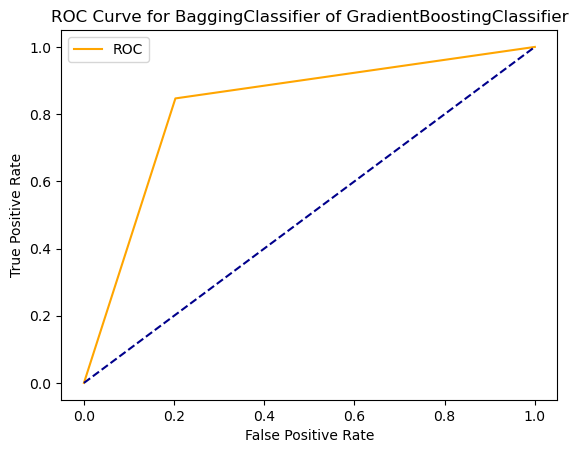

In [256]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GradientBoostingClassifier')
plt.legend()
plt.show()

### Cross-validation

In [257]:
from sklearn.model_selection import KFold, cross_val_score

In [258]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.80568108, 0.81536475, 0.79341511, 0.79599742, 0.81136951])

In [259]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.8056556451357297

In [260]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.79497099, 0.79303675, 0.80232558, 0.79844961, 0.77906977])

In [261]:
cross_val_score (bag4, x_test, y_test, cv=5).mean()

0.7866020421933337

In [212]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [213]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84214559 1.        ]
False Positive rate =  [0.         0.20673453 1.        ]


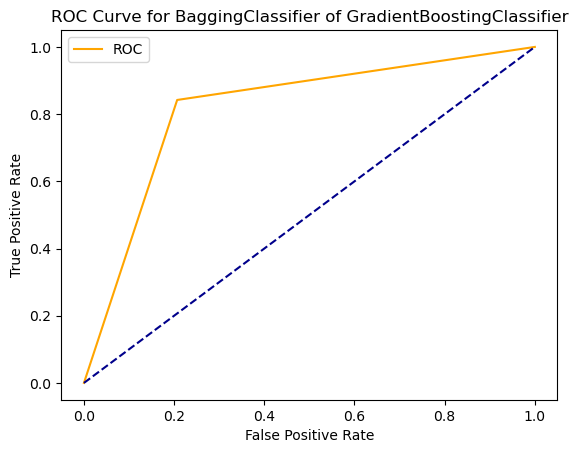

In [214]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GradientBoostingClassifier')
plt.legend()
plt.show()

# 

### GaussianNB

In [258]:
from sklearn.naive_bayes import GaussianNB

In [259]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [260]:
gnb = GaussianNB(var_smoothing=1e-09)

In [261]:
gnb.fit(x_train, y_train)

GaussianNB()

In [262]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.7636880165289256


In [263]:
y_pred = gnb.predict(x_test)

In [264]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7691711851278079


In [265]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 914,  363],
       [ 233, 1072]], dtype=int64)

In [266]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.75      1277
           1       0.75      0.82      0.78      1305

    accuracy                           0.77      2582
   macro avg       0.77      0.77      0.77      2582
weighted avg       0.77      0.77      0.77      2582



In [267]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [268]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.82145594 1.        ]
False Positive rate =  [0.         0.28425998 1.        ]


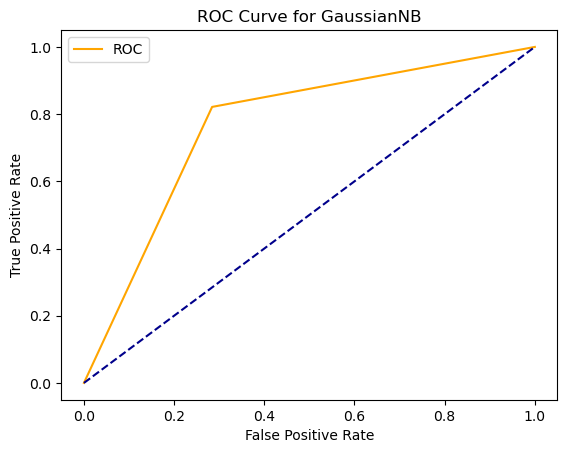

In [269]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

### Cross-validation

In [270]:
from sklearn.model_selection import KFold, cross_val_score

In [271]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.77533893, 0.76694642, 0.76113622, 0.76823757, 0.74741602])

In [272]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.7638150311195187

In [273]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.77562863, 0.75048356, 0.78100775, 0.78294574, 0.73837209])

In [274]:
cross_val_score (gnb, x_test, y_test, cv=5).mean()

0.7656875534164006

In [275]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [276]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.82145594 1.        ]
False Positive rate =  [0.         0.28425998 1.        ]


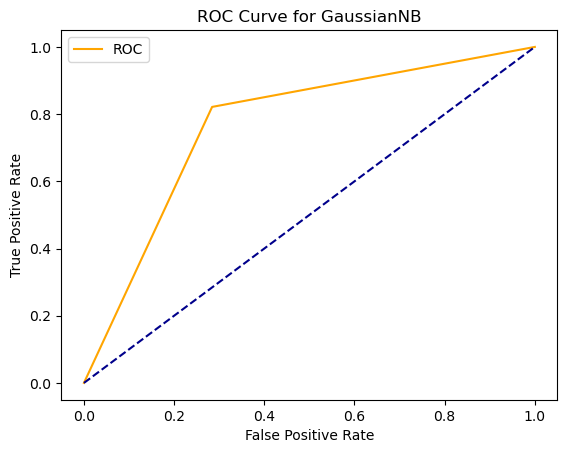

In [277]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [278]:
from sklearn.ensemble import BaggingClassifier

In [279]:
bag5 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [280]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [281]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.7634297520661157


In [282]:
y_pred = bag5.predict(x_test)

In [283]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7683965917893106


In [284]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 915,  362],
       [ 236, 1069]], dtype=int64)

In [285]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1277
           1       0.75      0.82      0.78      1305

    accuracy                           0.77      2582
   macro avg       0.77      0.77      0.77      2582
weighted avg       0.77      0.77      0.77      2582



In [286]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [287]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81915709 1.        ]
False Positive rate =  [0.        0.2834769 1.       ]


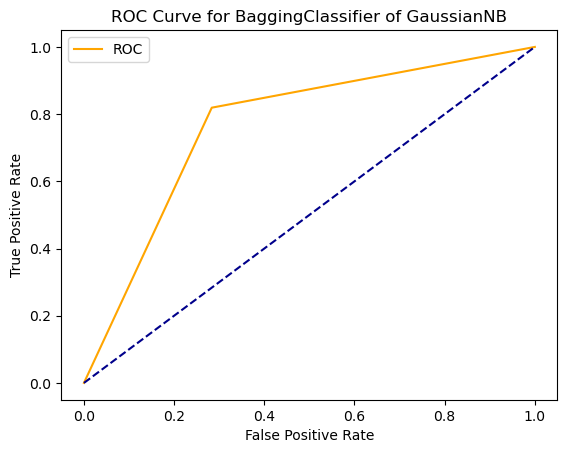

In [288]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GaussianNB')
plt.legend()
plt.show()

### Cross-validation

In [289]:
from sklearn.model_selection import KFold, cross_val_score

In [290]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.77856682, 0.76565526, 0.76242737, 0.76952873, 0.74547804])

In [291]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7638148643035516

In [292]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.78336557, 0.75048356, 0.77906977, 0.78100775, 0.73062016])

In [293]:
cross_val_score (bag5, x_test, y_test, cv=5).mean()

0.7683984825993733

In [294]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [295]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81915709 1.        ]
False Positive rate =  [0.        0.2834769 1.       ]


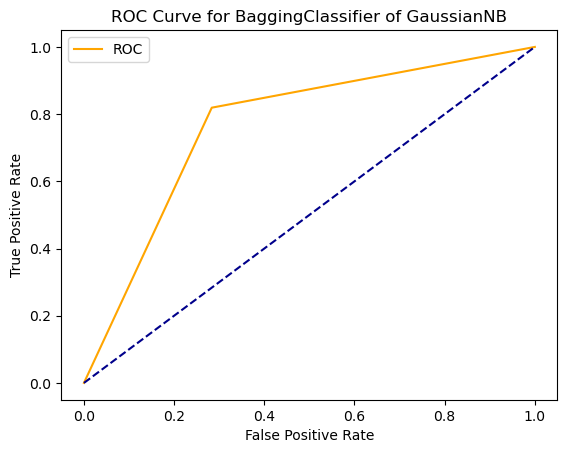

In [296]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GaussianNB')
plt.legend()
plt.show()

# 

# 

### Best Model

### GradientBoostingClassifier

In [348]:
from sklearn.ensemble import GradientBoostingClassifier

In [349]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3)

In [350]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=17)

In [351]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.815599173553719


In [352]:
y_pred = cls_gb.predict(x_test)

In [353]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7916343919442292


In [354]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 975,  302],
       [ 236, 1069]], dtype=int64)

In [355]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1277
           1       0.78      0.82      0.80      1305

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582



In [356]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [357]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81915709 1.        ]
False Positive rate =  [0.         0.23649178 1.        ]


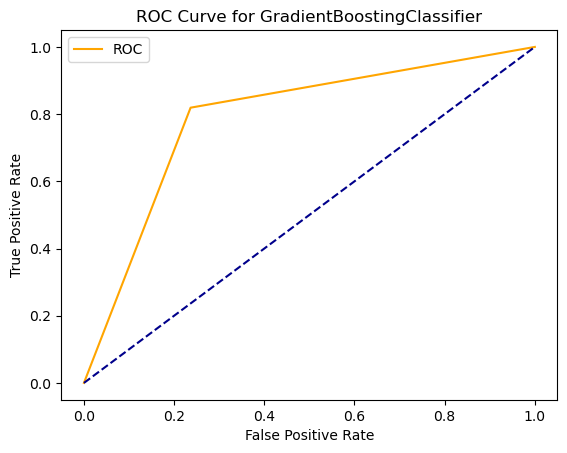

In [358]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

### Cross-validation

In [359]:
from sklearn.model_selection import KFold, cross_val_score

In [360]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.7908328 , 0.79276953, 0.77469335, 0.78437702, 0.78229974])

In [361]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.784994486732292

In [362]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.79110251, 0.77562863, 0.78682171, 0.77906977, 0.76744186])

In [363]:
cross_val_score (cls_gb, x_test, y_test, cv=5).mean()

0.7796252980072872

In [364]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [365]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81915709 1.        ]
False Positive rate =  [0.         0.23649178 1.        ]


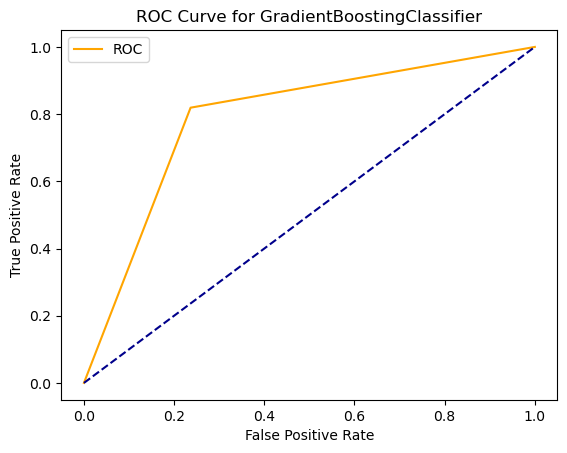

In [366]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

### Reasons for selecting this Model

#### 1) Has one of the highest Training & Testing Score.
#### 2) Very little difference between Training & Testing Score.
#### 3) Training Score is less than Testing score
#### 4) Has one of the highest Training & Testing Score for Cross-Validation result.
#### 5) Very little difference between Training & Testing Score for Cross-Validation result.
#### 6) Training Score is less than Testing score for Cross-Validation result.
#### 7) Very less difference between Training Score & Training Score for Cross-Validation result
#### 8) Very less difference between Testing Score & Testing Score for Cross-Validation result

# 

### Saving the Best Mode

In [367]:
import pickle

In [368]:
with open('model_ga', 'wb') as f: 
    pickle.dump(cls_gb , f)

# 

# 

# 

# 

# Rainfall Weather Forecasting

In [377]:
import warnings
warnings.filterwarnings('ignore')

In [378]:
import pandas as pd
import numpy as np

In [379]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# 

### EDA

In [380]:
df.shape

(8425, 23)

#### Removing duplicates

In [381]:
df.drop_duplicates(inplace=True)
df.shape

(6762, 23)

In [382]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [383]:
for columns in df.columns:
    unique = df[columns].unique()
    print(f'Columns:{columns}')
    print(f'Unique values:{unique}')
    print('\n')

Columns:Date
Unique values:['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']


Columns:Location
Unique values:['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']


Columns:MinTemp
Unique values:[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.

#### Removing unnecessary columns

In [384]:
df.drop(['Date','Location'],axis=1,inplace=True)

In [385]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [386]:
df.isnull().sum()

MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [387]:
df.nunique()

MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
dtype: int64

In [388]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# 

### Analysing Null Values in Continuation data

In [389]:
df.shape

(6762, 21)

In [390]:
for columns in df.columns:
    counts = df[columns].isnull().mean()
    df0=df[columns].dtypes
    print(f'Columns:{columns}')
    print(f'Unique values:{counts}')
    print(f'Datatype:{df0}')
    print('\n')

Columns:MinTemp
Unique values:0.010351966873706004
Datatype:float64


Columns:MaxTemp
Unique values:0.008429458740017746
Datatype:float64


Columns:Rainfall
Unique values:0.02040816326530612
Datatype:float64


Columns:Evaporation
Unique values:0.43197278911564624
Datatype:float64


Columns:Sunshine
Unique values:0.4785566400473233
Datatype:float64


Columns:WindGustDir
Unique values:0.13930789707187222
Datatype:object


Columns:WindGustSpeed
Unique values:0.13930789707187222
Datatype:float64


Columns:WindDir9am
Unique values:0.11742088139603668
Datatype:object


Columns:WindDir3pm
Unique values:0.043478260869565216
Datatype:object


Columns:WindSpeed9am
Unique values:0.009316770186335404
Datatype:float64


Columns:WindSpeed3pm
Unique values:0.014788524105294291
Datatype:float64


Columns:Humidity9am
Unique values:0.007985803016858917
Datatype:float64


Columns:Humidity3pm
Unique values:0.01419698314108252
Datatype:float64


Columns:Pressure9am
Unique values:0.19343389529724933
Datatyp

In [391]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [392]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Making a copy of dataframe with only data and no null values, to check relation between the columns

In [393]:
df1 = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']].copy()
df1=df1.dropna()
df1

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
907      19.8     27.1      24.4          8.6       9.0           35.0   
908      18.7     25.6       6.8          3.8       3.4           33.0   
909      16.5     25.5      16.8          2.8       6.1           19.0   
910      18.5     26.9       0.0          3.2      11.0           30.0   
911      18.2     28.2       0.0          6.8       9.0           50.0   
...       ...      ...       ...          ...       ...            ...   
8381     25.2     34.5       3.0          4.0       9.2           39.0   
8382     26.2     33.3       0.0          6.0       5.9           54.0   
8383     24.9     32.8      20.4          6.2       8.7           37.0   
8384     25.5     33.1       0.0          4.8       7.1           37.0   
8385     24.9     34.3       0.0          5.6       8.6           39.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
907           17.0          22.0         83.0         60.0       1018.9   
908           17.0          13.0         85.0         90.0       1020.7   
909            6.0           9.0         84.0         65.0       1021.5   
910            7.0          20.0         68.0         60.0       1018.9   
911           13.0          35.0         67.0         68.0       1016.3   
...            ...           ...          ...          ...          ...   
8381          11.0          22.0         66.0         46.0       1011.3   
8382          13.0          13.0         66.0         93.0       1010.4   
8383          13.0          20.0         72.0         55.0       1009.9   
8384          20.0          13.0         62.0         58.0       1011.1   
8385          17.0          22.0         63.0         46.0       1012.1   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
907        1017.9       6.0       6.0     22.0     26.0  
908        1020.1       4.0       7.0     21.0     20.9  
909        1020.1       5.0       7.0     21.0     24.5  
910        1016.6       2.0       5.0     23.3     26.4  
911        1012.8       1.0       1.0     24.0     25.9  
...           ...       ...       ...      ...      ...  
8381       1007.9       7.0       7.0     29.6     33.4  
8382       1006.8       4.0       8.0     30.2     25.2  
8383       1006.2       4.0       6.0     29.5     32.0  
8384       1006.9       7.0       7.0     28.6     31.5  
8385       1007.9       7.0       3.0     29.8     33.2  

[3225 rows x 16 columns]

In [394]:
df1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

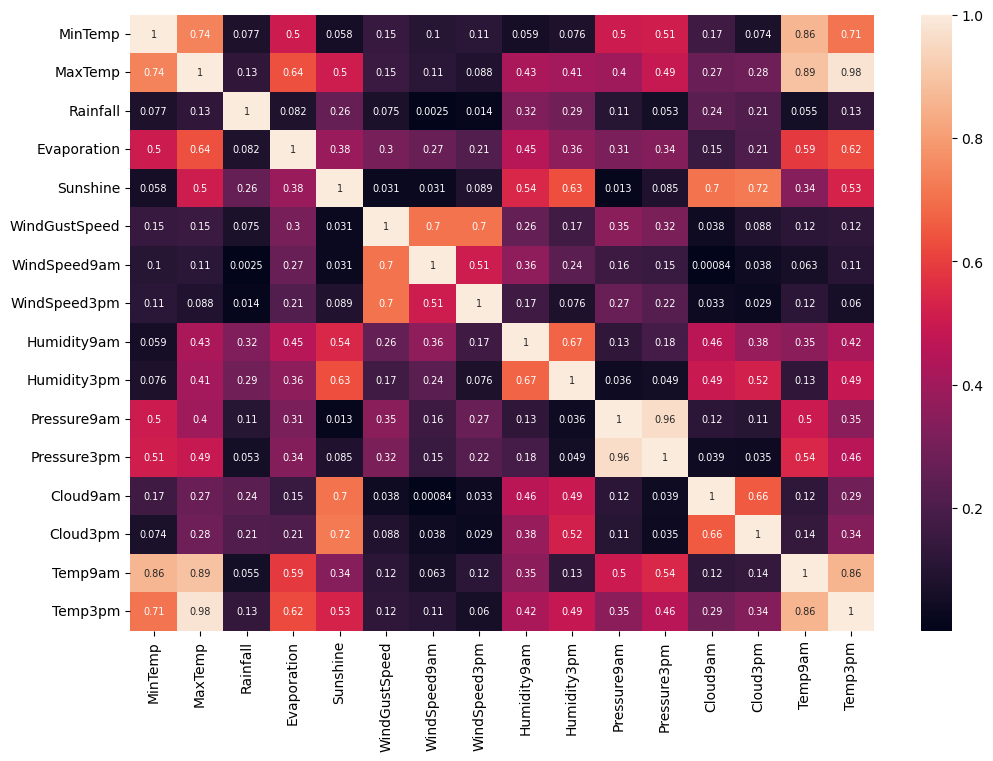

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df1.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :7})
plt.show()

# 

### Imputing Continious value

In [396]:
df1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

#### Filling the Null values of each column, by prediction through it's most related column

In [397]:
from sklearn.impute import KNNImputer

knnimp = KNNImputer(n_neighbors=2)

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['MinTemp','Temp9am']]))
df[['MinTemp','Temp9am']] = knnimp.transform(df[['MinTemp','Temp9am']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['MaxTemp','Temp3pm']]))
df[['MaxTemp','Temp3pm']] = knnimp.transform(df[['MaxTemp','Temp3pm']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['Evaporation','MaxTemp']]))
df[['Evaporation','MaxTemp']] = knnimp.transform(df[['Evaporation','MaxTemp']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['Sunshine','Cloud3pm']]))
df[['Sunshine','Cloud3pm']] = knnimp.transform(df[['Sunshine','Cloud3pm']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['WindGustSpeed', 'WindSpeed9am']]))
df[['WindGustSpeed', 'WindSpeed9am']] = knnimp.transform(df[['WindGustSpeed', 'WindSpeed9am']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['WindSpeed3pm','WindGustSpeed']]))
df[['WindSpeed3pm','WindGustSpeed']] = knnimp.transform(df[['WindSpeed3pm','WindGustSpeed']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['Humidity9am','Humidity3pm']]))
df[['Humidity9am','Humidity3pm']] = knnimp.transform(df[['Humidity9am','Humidity3pm']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['Pressure9am', 'Pressure3pm']]))
df[['Pressure9am', 'Pressure3pm']] = knnimp.transform(df[['Pressure9am', 'Pressure3pm']])

knn_imp = pd.DataFrame (knnimp.fit_transform(df[['Cloud9am','Sunshine']]))
df[['Cloud9am','Sunshine']] = knnimp.transform(df[['Cloud9am','Sunshine']])

#### Checking Null values again

In [398]:
df1 = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']].copy()
df1=df1.dropna()
df1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# 

### Analysing Null Values in Categorical data

In [399]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [400]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Making a copy of dataframe with only Categorical data columns, to analyse Null values

In [401]:
df2 = df[['WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']].copy()
df2

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0              W          W        WNW        No           No
1            WNW        NNW        WSW        No           No
2            WSW          W        WSW        No           No
3             NE         SE          E        No           No
4              W        ENE         NW        No           No
...          ...        ...        ...       ...          ...
8420           E         SE        ENE        No           No
8421         NNW         SE          N        No           No
8422           N         SE        WNW        No           No
8423          SE        SSE          N        No           No
8424         NaN        ESE        ESE        No          NaN

[6762 rows x 5 columns]

In [402]:
for columns in df2.columns:
    
    value_counts=df2[columns].value_counts()
    counts = df2[columns].isnull().mean()
    
    print(value_counts)
    print(f'Columns:{columns}')
    print(f'Unique values:{counts}')

    print('\n')

E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64
Columns:WindGustDir
Unique values:0.13930789707187222


N      609
SW     590
NW     463
SE     439
ENE    397
WSW    394
SSW    368
NE     364
E      338
NNE    337
S      324
WNW    301
SSE    300
W      299
ESE    229
NNW    216
Name: WindDir9am, dtype: int64
Columns:WindDir9am
Unique values:0.11742088139603668


SE     677
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64
Columns:WindDir3pm
Unique values:0.043478260869565216


No     5052
Yes    1572
Name: RainToday, dtype: int64
Columns:RainToday
Unique values:0.02040816326530612


No     5052
Yes    1572
Name: RainTomorrow, dtype: int64
Columns:RainTomorrow
Unique values:0.020408163

# 

### Imputation of Categorical Values

In [403]:
df2.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

##### Dropping Null values, where Columns don't have any significant high appearing value and have negligible % of Null values

In [404]:
df=df.dropna()

In [405]:
df2 = df[['WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']].copy()
df2.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

##### Imputing the Null values with highest appearing value

In [406]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [407]:
df[['RainToday']]=mode_imp.fit_transform(df[['RainToday']])
df[['RainTomorrow']]=mode_imp.fit_transform(df[['RainTomorrow']])

In [408]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# 

### Encoding

In [409]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [410]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [411]:
df.WindDir9am = le.fit_transform(df.WindDir9am)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.RainToday = le.fit_transform(df.RainToday)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9       0.6          4.9  7.890896           13   
1      7.4     25.1       0.0          3.3  7.890896           14   
2     12.9     25.7       0.0         11.0  8.750000           15   
3      9.2     28.0       0.0         14.7  7.890896            4   
4     17.5     32.3       1.0         10.9  3.200000           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          13          14          20.0  ...         71.0   
1           44.0           6          15           4.0  ...         44.0   
2           46.0          13          15          19.0  ...         38.0   
3           24.0           9           0          11.0  ...         45.0   
4           41.0           1           7           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0  4.320988     16.9   
1         25.0       1010.6       1007.8       4.5  4.320988     17.2   
2         30.0       1007.6       1008.7       1.5  2.000000     21.0   
3         16.0       1017.6       1012.8       4.5  4.320988     18.1   
4         33.0       1010.8       1006.0       7.0  8.000000     17.8   

   Temp3pm  RainToday  RainTomorrow  
0     21.8          0            No  
1     24.3          0            No  
2     23.2          0            No  
3     26.5          0            No  
4     29.7          0            No  

[5 rows x 21 columns]

In [412]:
df['RainTomorrow']=df['RainTomorrow'].replace('Yes', 1)
df['RainTomorrow']=df['RainTomorrow'].replace('No', 0)

In [413]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9       0.6          4.9  7.890896           13   
1      7.4     25.1       0.0          3.3  7.890896           14   
2     12.9     25.7       0.0         11.0  8.750000           15   
3      9.2     28.0       0.0         14.7  7.890896            4   
4     17.5     32.3       1.0         10.9  3.200000           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          13          14          20.0  ...         71.0   
1           44.0           6          15           4.0  ...         44.0   
2           46.0          13          15          19.0  ...         38.0   
3           24.0           9           0          11.0  ...         45.0   
4           41.0           1           7           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0  4.320988     16.9   
1         25.0       1010.6       1007.8       4.5  4.320988     17.2   
2         30.0       1007.6       1008.7       1.5  2.000000     21.0   
3         16.0       1017.6       1012.8       4.5  4.320988     18.1   
4         33.0       1010.8       1006.0       7.0  8.000000     17.8   

   Temp3pm  RainToday  RainTomorrow  
0     21.8          0             0  
1     24.3          0             0  
2     23.2          0             0  
3     26.5          0             0  
4     29.7          0             0  

[5 rows x 21 columns]

In [414]:
df['RainTomorrow'].value_counts()

0    4002
1    1264
Name: RainTomorrow, dtype: int64

# 

### Removing Skewness

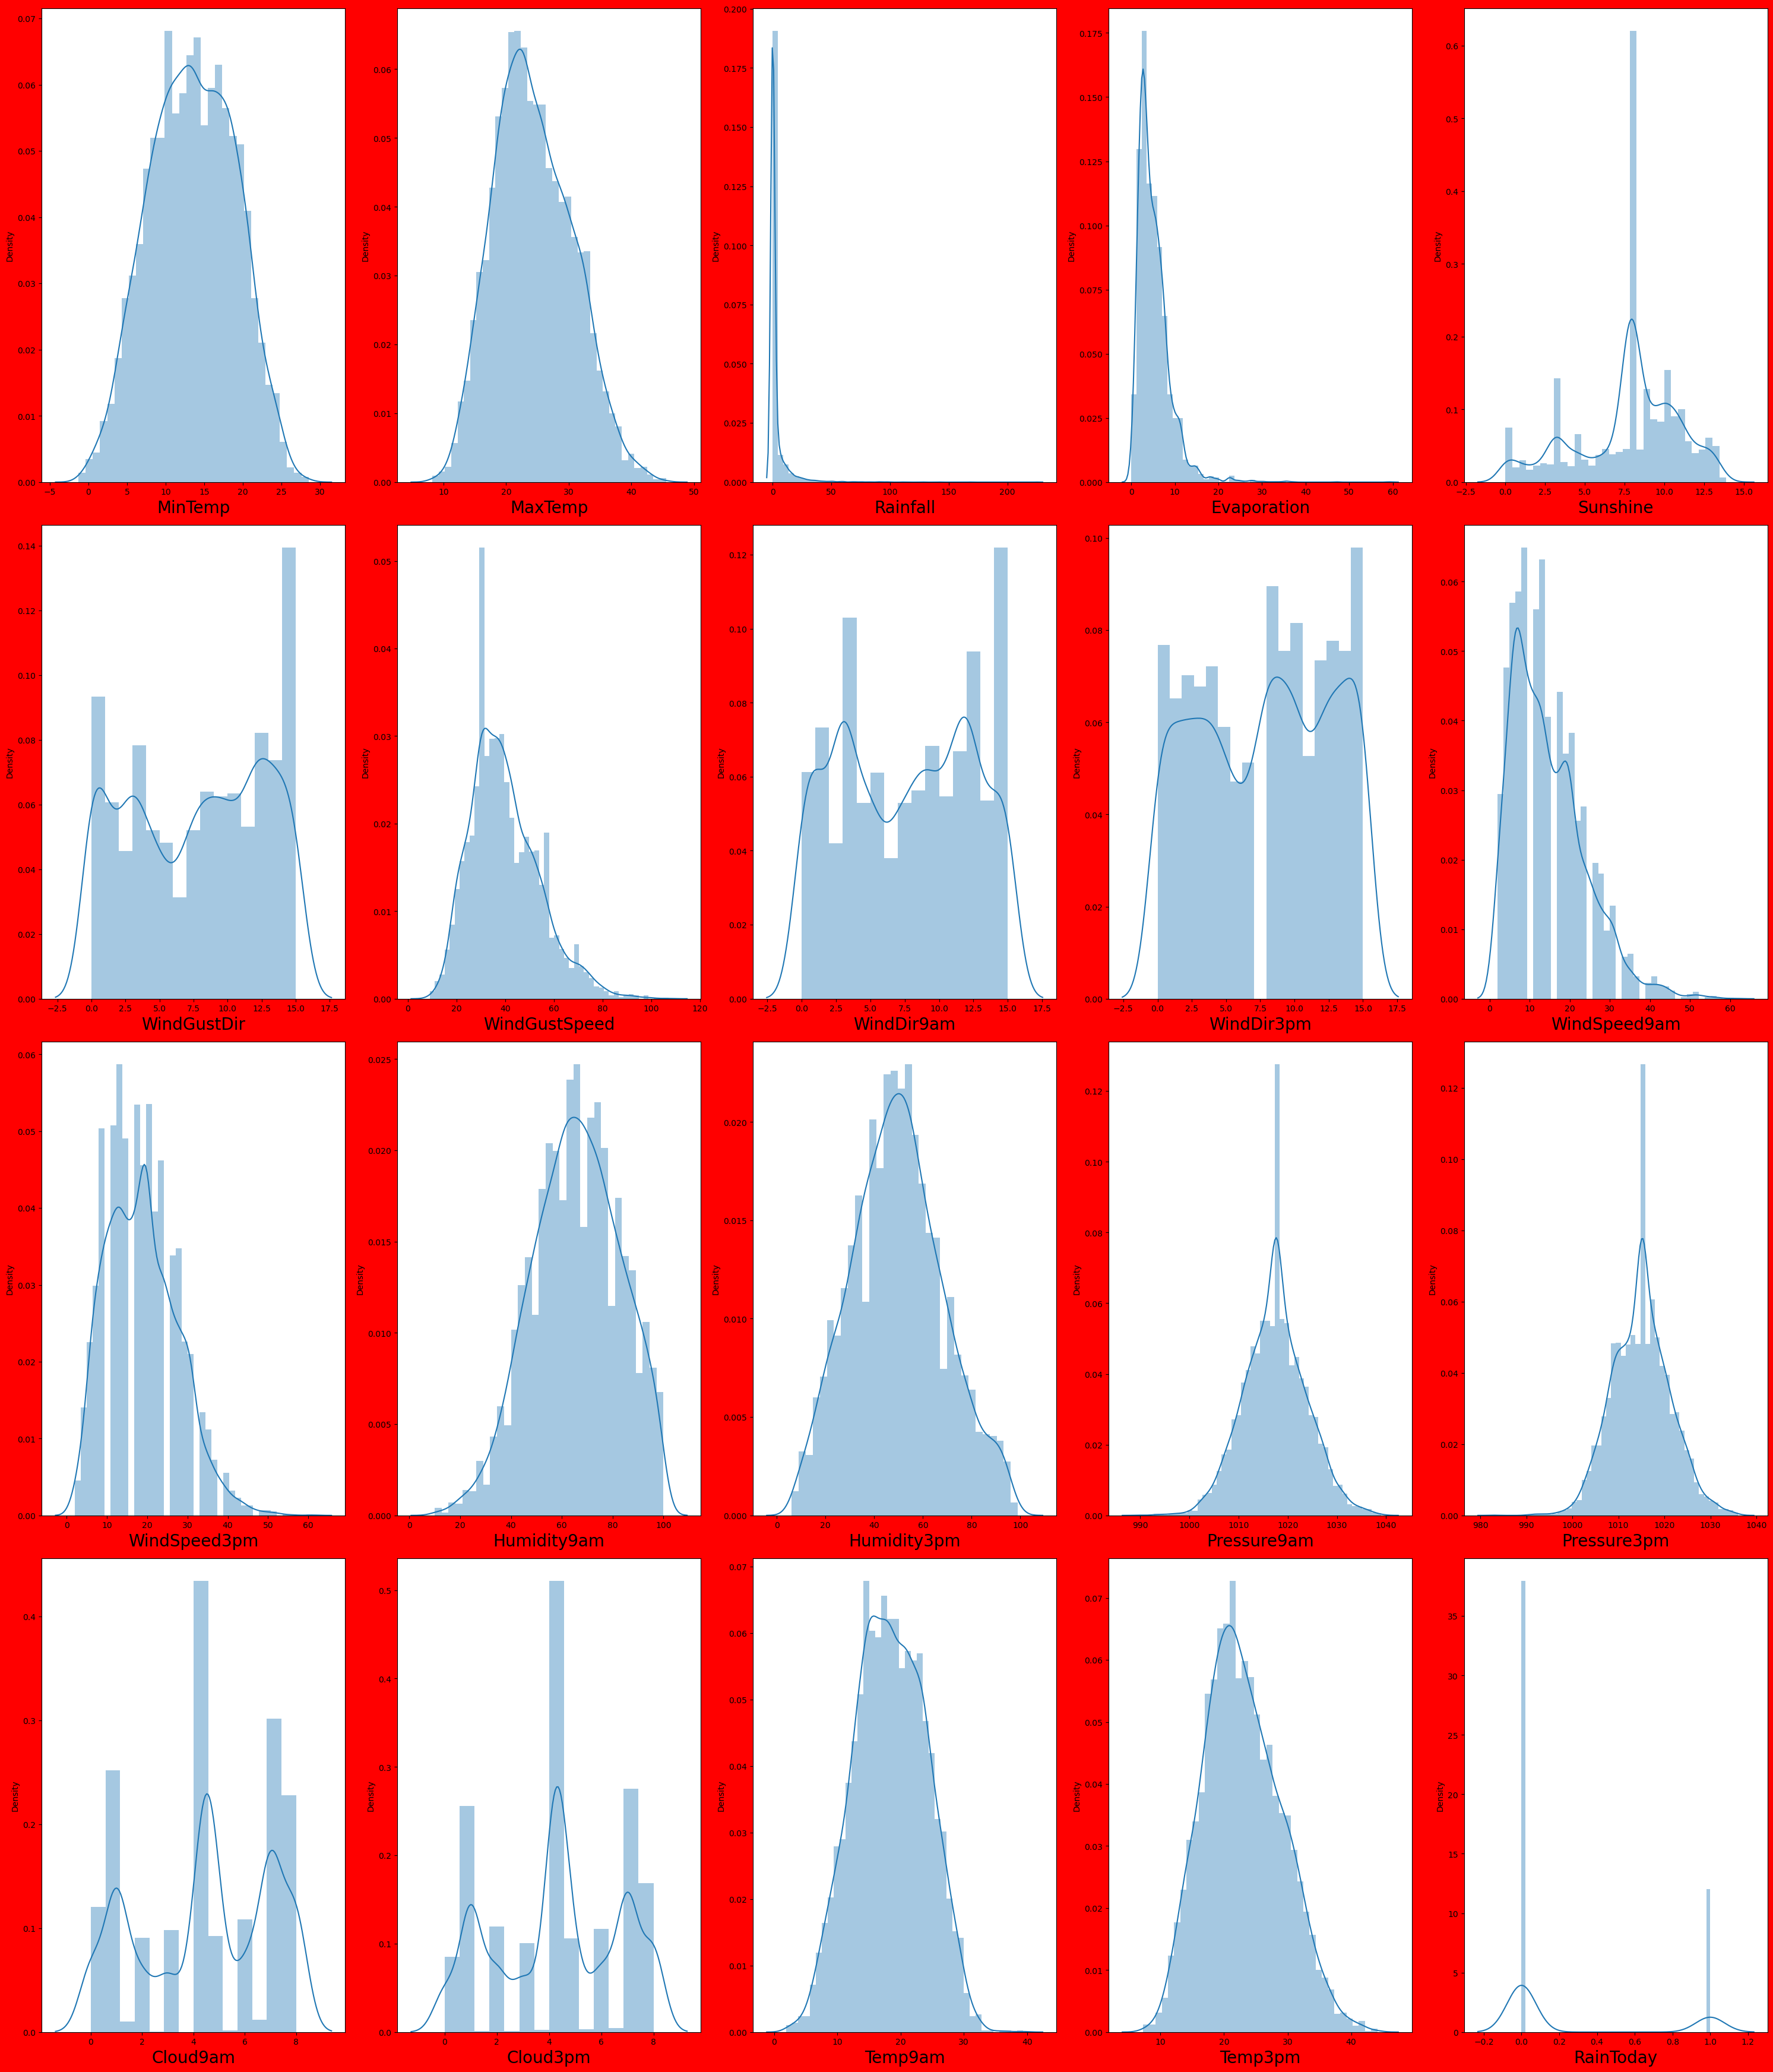

In [415]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=20:                    
        ax = plt.subplot(4,5,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [416]:
df.skew()

MinTemp         -0.044125
MaxTemp          0.296200
Rainfall         8.601063
Evaporation      2.846582
Sunshine        -0.607408
WindGustDir     -0.108008
WindGustSpeed    0.763216
WindDir9am      -0.023692
WindDir3pm      -0.083461
WindSpeed9am     1.015864
WindSpeed3pm     0.526224
Humidity9am     -0.187476
Humidity3pm      0.169042
Pressure9am      0.023297
Pressure3pm      0.045554
Cloud9am        -0.262059
Cloud3pm        -0.140300
Temp9am         -0.011509
Temp3pm          0.318427
RainToday        1.211631
RainTomorrow     1.217713
dtype: float64

In [417]:
df['Rainfall'] = np.log1p(df['Rainfall'])
df['Evaporation'] = np.log1p(df['Evaporation'])
df['Sunshine'] = np.log1p(df['Sunshine'])
df['WindGustSpeed'] = np.log1p(df['WindGustSpeed'])
df['WindSpeed9am'] = np.log1p(df['WindSpeed9am'])
df['WindSpeed3pm'] = np.log1p(df['WindSpeed3pm'])

In [418]:
df.skew()

MinTemp         -0.044125
MaxTemp          0.296200
Rainfall         1.890607
Evaporation      0.096548
Sunshine        -1.942756
WindGustDir     -0.108008
WindGustSpeed   -0.199104
WindDir9am      -0.023692
WindDir3pm      -0.083461
WindSpeed9am    -0.364634
WindSpeed3pm    -0.664737
Humidity9am     -0.187476
Humidity3pm      0.169042
Pressure9am      0.023297
Pressure3pm      0.045554
Cloud9am        -0.262059
Cloud3pm        -0.140300
Temp9am         -0.011509
Temp3pm          0.318427
RainToday        1.211631
RainTomorrow     1.217713
dtype: float64

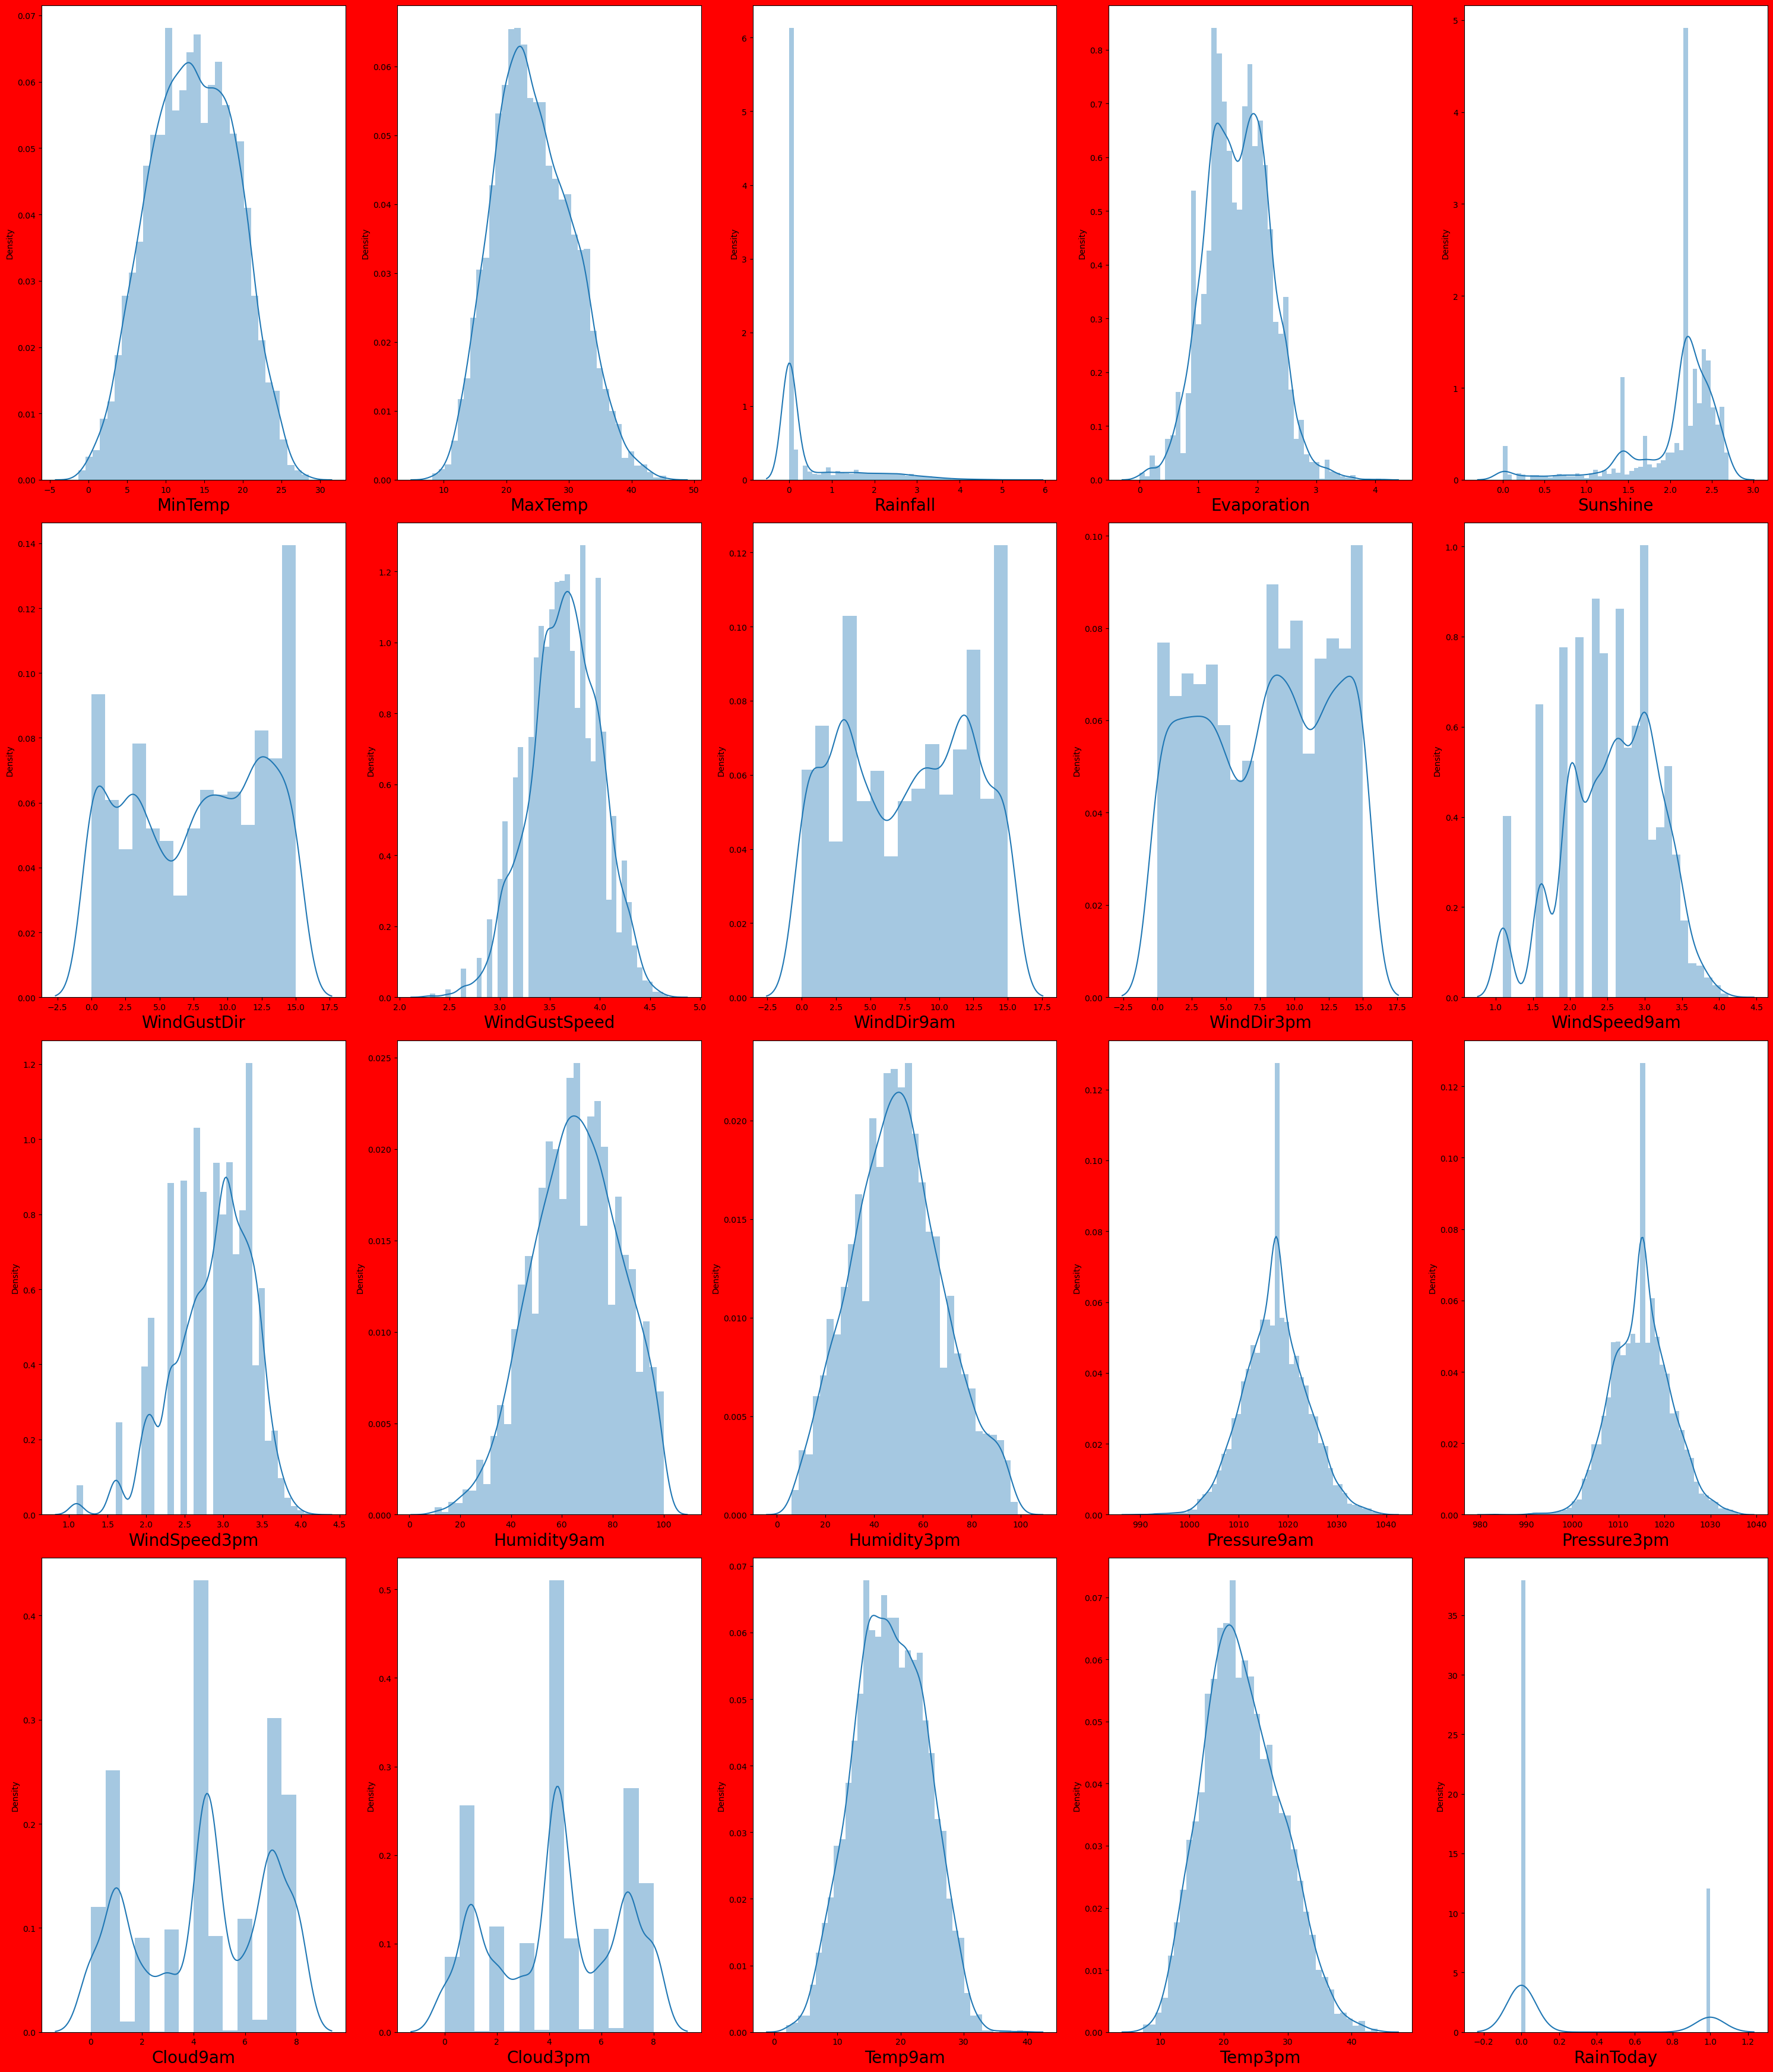

In [419]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=20:                    
        ax = plt.subplot(4,5,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Removing Outliners

In [420]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  5266.000000  5266.000000  5266.000000  5266.000000  5266.000000   
mean     13.460710    24.379966     0.525817     1.672169     2.053163   
std       5.482651     6.243559     0.969475     0.543067     0.556353   
min      -1.300000     8.200000     0.000000     0.000000     0.000000   
25%       9.400000    19.800000     0.000000     1.280934     1.974081   
50%      13.500000    23.800000     0.000000     1.686399     2.185028   
75%      17.700000    28.800000     0.587787     2.054124     2.402430   
max      28.500000    45.500000     5.420535     4.097672     2.701361   

       WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  WindSpeed9am  \
count  5266.000000    5266.000000  5266.000000  5266.000000   5266.000000   
mean      7.648690       3.649462     7.527535     7.802127      2.567055   
std       4.875936       0.348626     4.690790     4.764617      0.627006   
min       0.000000       2.302585     0.000000     0.000000      1.098612   
25%       3.000000       3.433987     3.000000     4.000000      2.079442   
50%       8.000000       3.637586     8.000000     8.000000      2.639057   
75%      12.000000       3.891820    12.000000    12.000000      3.044522   
max      15.000000       4.682131    15.000000    15.000000      4.127134   

       ...  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  ...  5266.000000  5266.000000  5266.000000  5266.000000  5266.000000   
mean   ...    65.633878    49.632548  1017.446735  1014.948035     4.455184   
std    ...    17.151114    18.789714     6.400514     6.330732     2.543111   
min    ...    10.000000     6.000000   989.800000   982.900000     0.000000   
25%    ...    54.000000    36.000000  1013.300000  1010.600000     2.000000   
50%    ...    66.000000    49.000000  1017.626311  1015.119923     4.500000   
75%    ...    78.000000    62.000000  1021.400000  1018.975000     7.000000   
max    ...   100.000000    99.000000  1039.000000  1036.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  5266.000000  5266.000000  5266.000000  5266.000000   5266.000000  
mean      4.309330    18.337609    22.956172     0.240980      0.240030  
std       2.377705     5.667551     6.087404     0.427719      0.427142  
min       0.000000     1.900000     7.300000     0.000000      0.000000  
25%       2.000000    14.300000    18.600000     0.000000      0.000000  
50%       4.320988    18.200000    22.400000     0.000000      0.000000  
75%       7.000000    22.600000    27.100000     0.000000      0.000000  
max       8.000000    39.400000    44.100000     1.000000      1.000000  

[8 rows x 21 columns]

In [421]:
df.shape

(5266, 21)

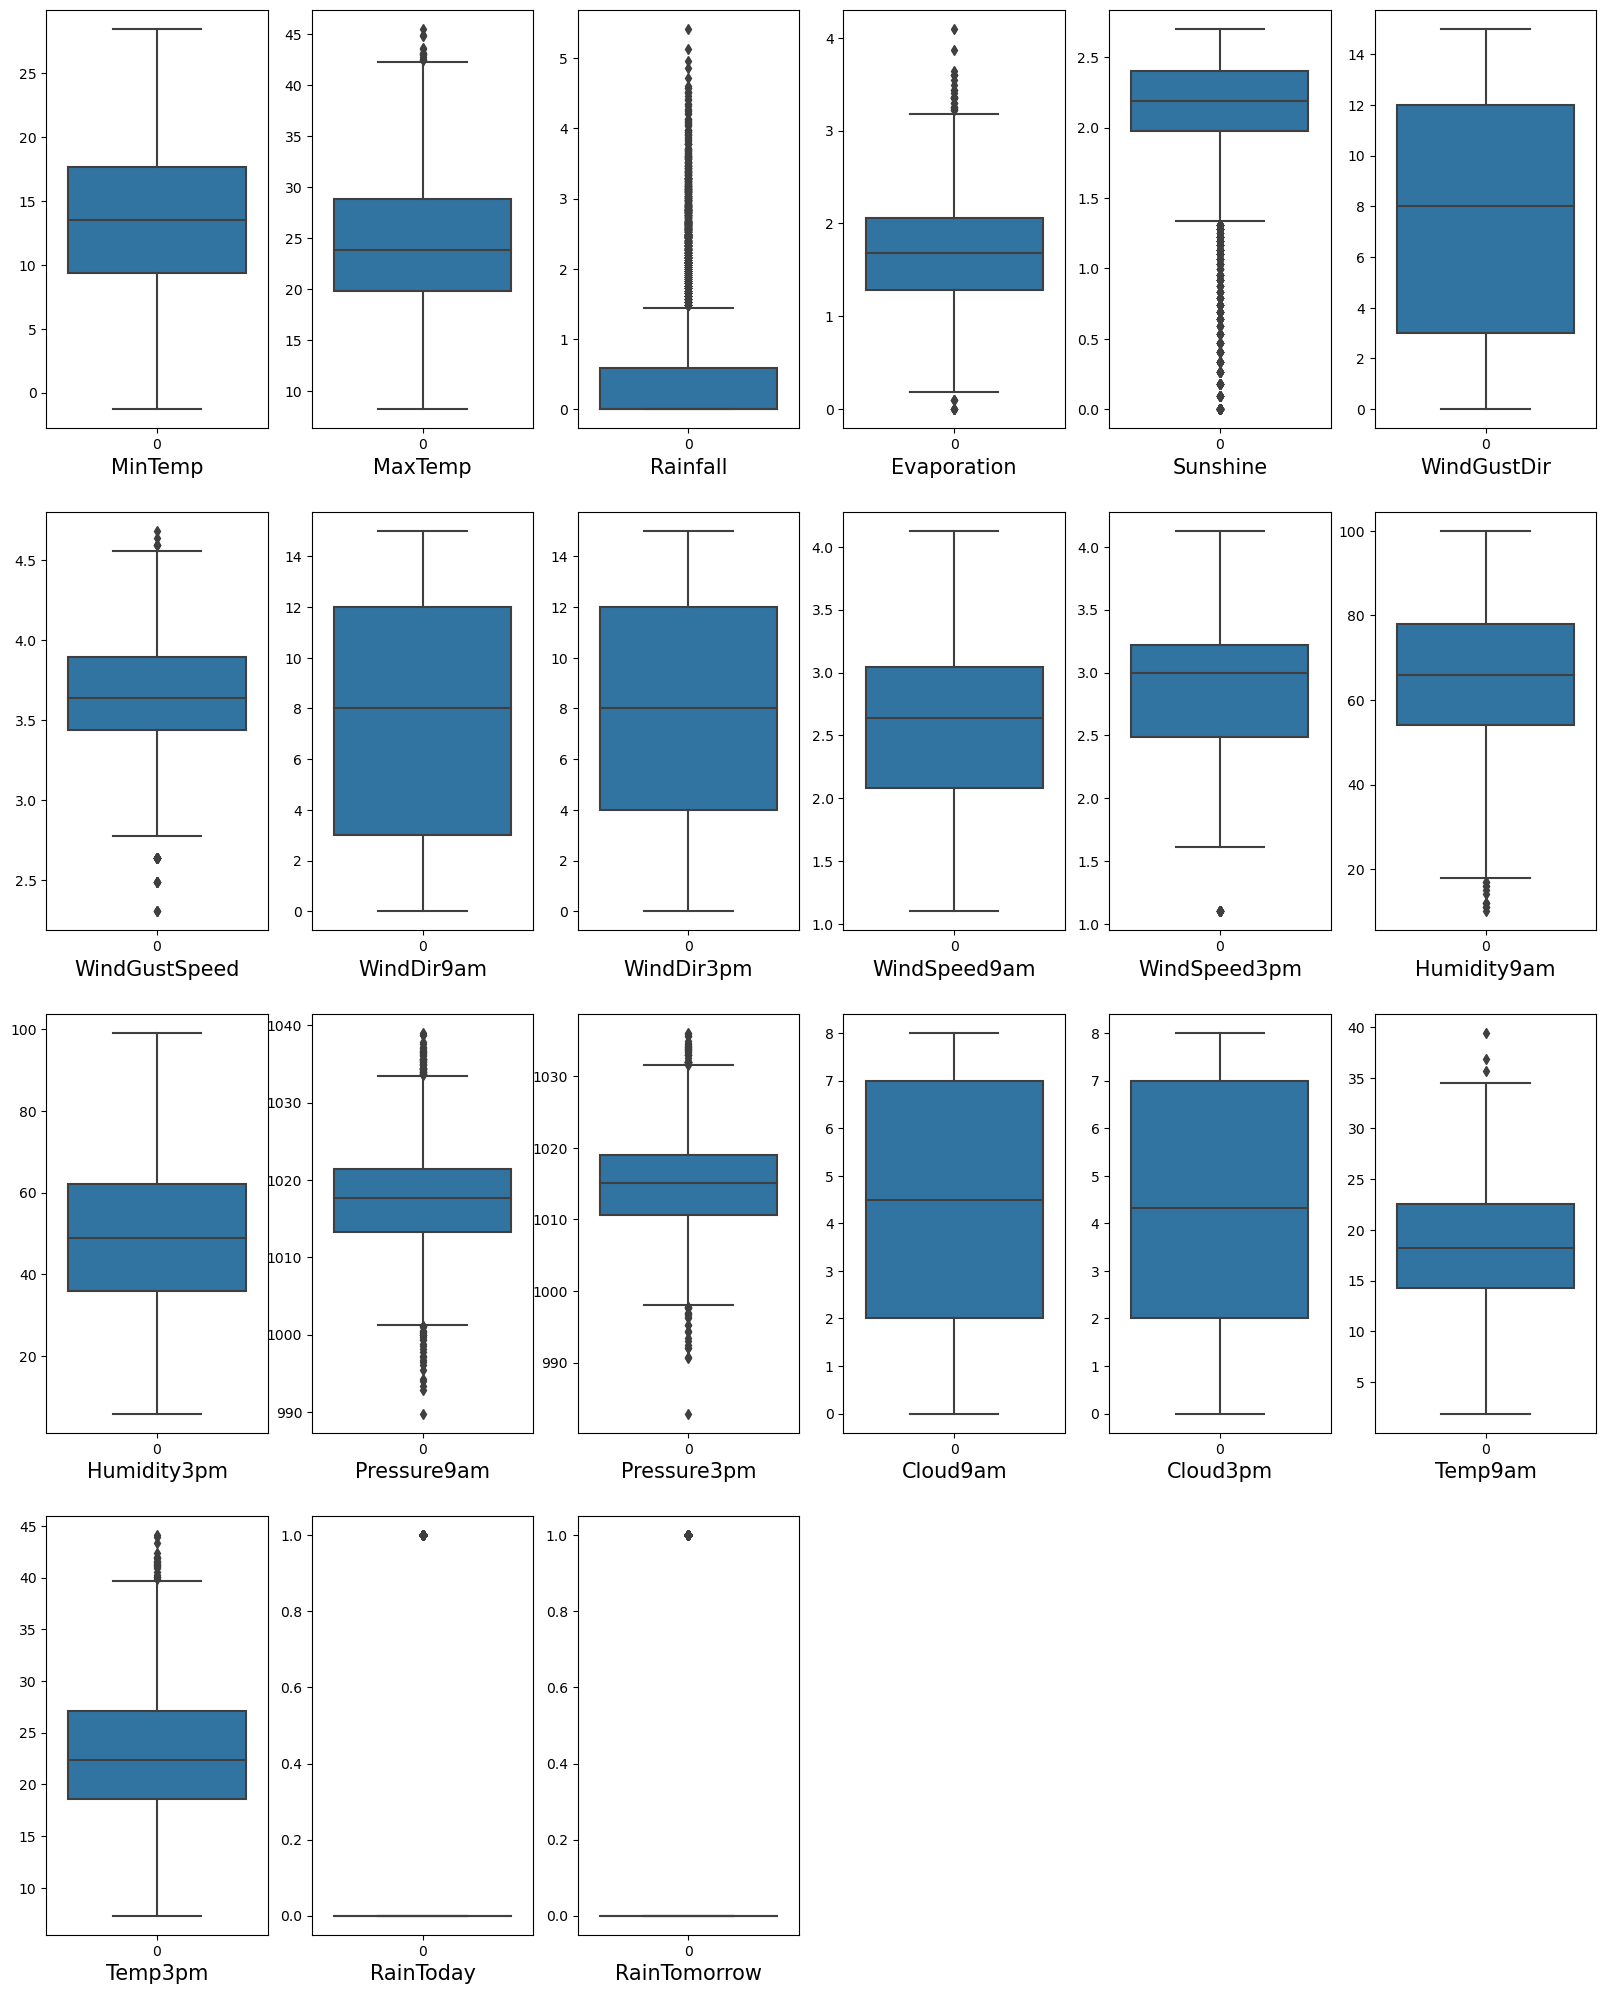

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df: 
    if graph<=21:
        plt.subplot(4,6, graph)
        ax=sns.boxplot(data= df[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [423]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [424]:
from scipy.stats import zscore 

z_score = zscore (df[['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am','Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
df = df[filtering_entry]

df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  4856.000000  4856.000000  4856.000000  4856.000000  4856.000000   
mean     13.405910    24.375041     0.430682     1.668138     2.072017   
std       5.426714     6.033309     0.808108     0.509257     0.534418   
min      -0.800000     8.400000     0.000000     0.336472     0.000000   
25%       9.400000    20.000000     0.000000     1.280934     2.001480   
50%      13.400000    23.900000     0.000000     1.686399     2.185028   
75%      17.600000    28.800000     0.336472     2.041220     2.402430   
max      27.800000    40.700000     3.135494     3.072693     2.701361   

       WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  WindSpeed9am  \
count  4856.000000    4856.000000  4856.000000  4856.000000   4856.000000   
mean      7.623558       3.650299     7.506590     7.774918      2.569808   
std       4.880147       0.332199     4.691202     4.772583      0.619714   
min       0.000000       2.772589     0.000000     0.000000      1.098612   
25%       3.000000       3.433987     3.000000     4.000000      2.079442   
50%       8.000000       3.637586     8.000000     8.000000      2.639057   
75%      12.000000       3.891820    12.000000    12.000000      3.044522   
max      15.000000       4.553877    15.000000    15.000000      4.127134   

       ...  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  ...  4856.000000  4856.000000  4856.000000  4856.000000  4856.000000   
mean   ...    65.058072    49.158773  1017.517624  1014.996782     4.389930   
std    ...    16.558305    18.262817     6.032274     5.978323     2.538982   
min    ...    20.000000     6.000000  1000.500000   998.400000     0.000000   
25%    ...    53.000000    36.000000  1013.500000  1010.775000     2.000000   
50%    ...    65.000000    49.000000  1017.626311  1015.119923     4.500000   
75%    ...    77.000000    61.000000  1021.400000  1018.900000     7.000000   
max    ...   100.000000    99.000000  1034.500000  1032.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  4856.000000  4856.000000  4856.000000  4856.000000   4856.000000  
mean      4.261977    18.351369    22.961779     0.218287      0.224876  
std       2.369663     5.529439     5.889367     0.413126      0.417544  
min       0.000000     3.100000     7.300000     0.000000      0.000000  
25%       2.000000    14.400000    18.700000     0.000000      0.000000  
50%       4.320988    18.300000    22.500000     0.000000      0.000000  
75%       6.000000    22.600000    27.100000     0.000000      0.000000  
max       8.000000    32.800000    39.200000     1.000000      1.000000  

[8 rows x 21 columns]

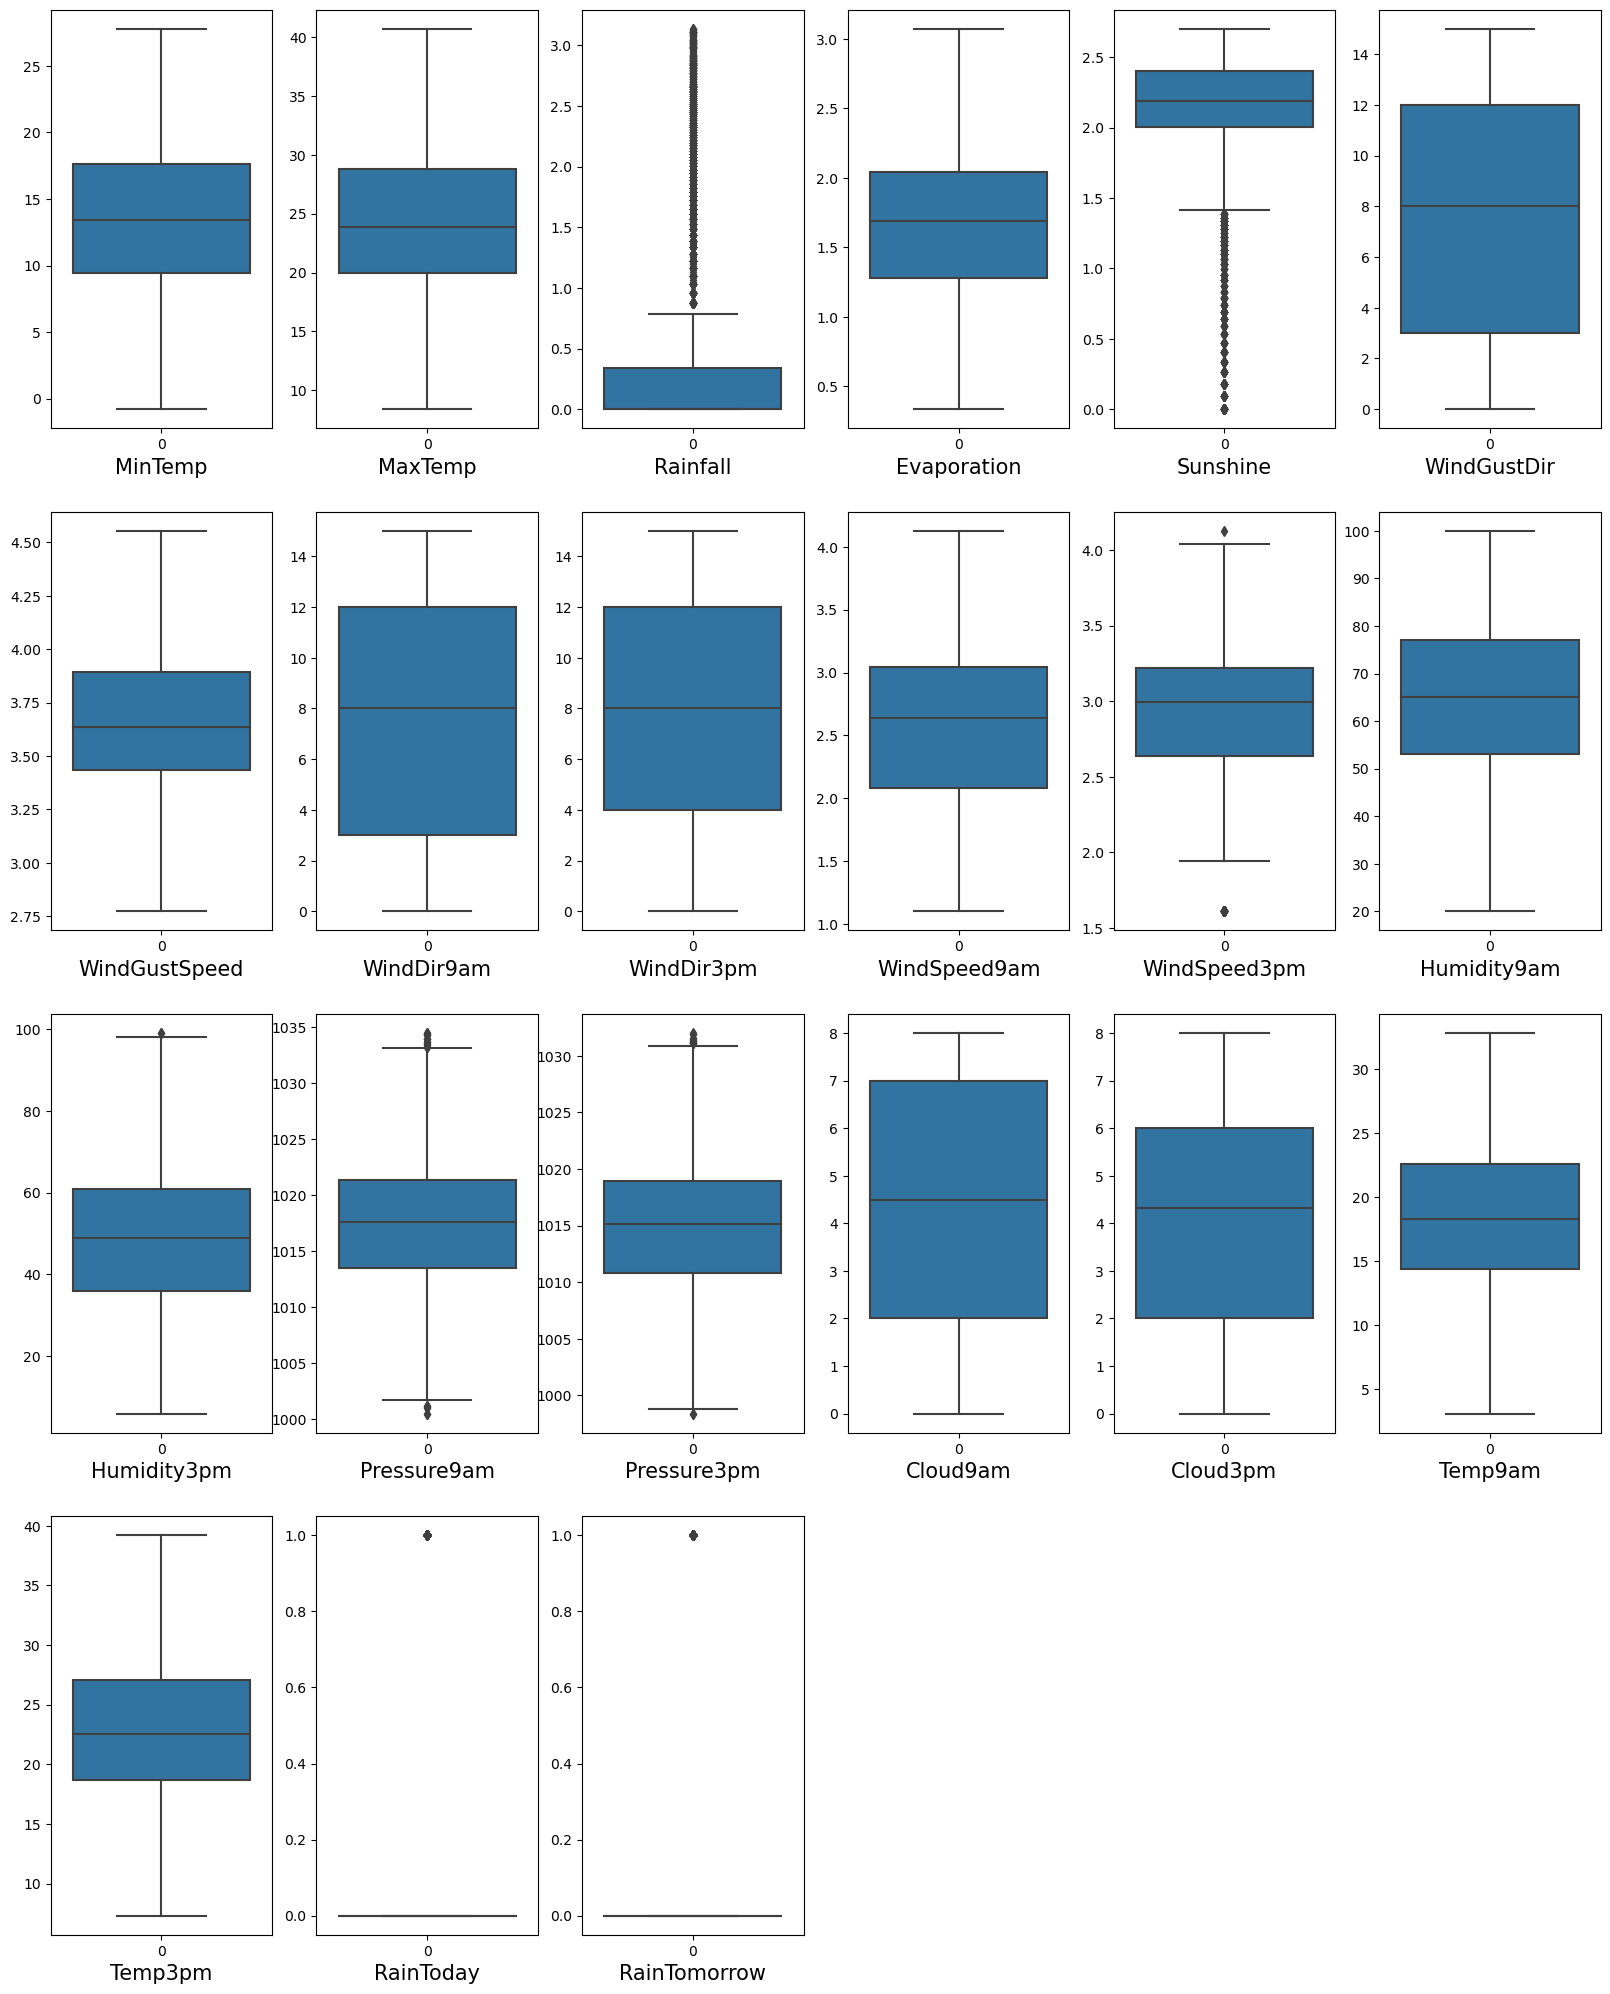

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df: 
    if graph<=21:
        plt.subplot(4,6, graph)
        ax=sns.boxplot(data= df[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [426]:
df.shape

(4856, 21)

# 

# 

### Problem 1: Target = 'RainTomorrow'  & Label = Rest

### Checking Contribution Score

In [1464]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [1465]:
from sklearn.feature_selection import SelectKBest, f_classif

In [1466]:
x = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [1467]:
best_features = SelectKBest(score_func=f_classif, k=19)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(19, 'Score'))

     Feature_Name        Score
12    Humidity3pm  1463.636178
4        Sunshine   891.225168
16       Cloud3pm   734.508660
2        Rainfall   651.677696
11    Humidity9am   540.677558
19      RainToday   538.415737
15       Cloud9am   464.919072
18        Temp3pm   287.999095
1         MaxTemp   186.588401
6   WindGustSpeed   143.725469
13    Pressure9am   115.966406
3     Evaporation    94.034588
14    Pressure3pm    75.150742
17        Temp9am    22.310467
0         MinTemp    16.887327
9    WindSpeed9am    16.237592
5     WindGustDir    14.780283
10   WindSpeed3pm     8.579509
7      WindDir9am     4.543136


# 

### Checking Multi-colinearity

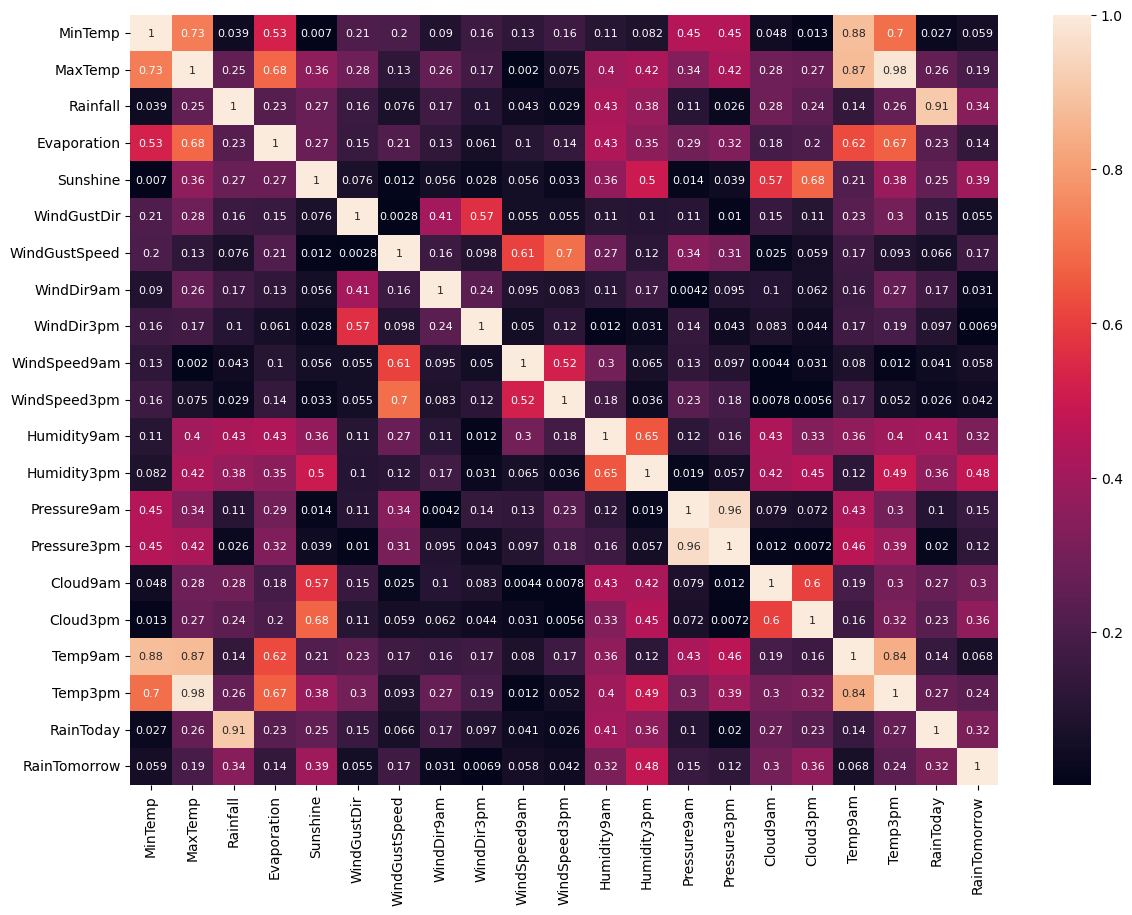

In [1468]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr().abs ()

plt.figure(figsize=(14, 10))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :8})
plt.show()

In [1469]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [1470]:
df11 = df.drop(columns=['Temp9am','Temp3pm','RainToday','Pressure3pm']).copy()
df11.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9  0.470004     1.774952  2.185028           13   
1      7.4     25.1  0.000000     1.458615  2.185028           14   
2     12.9     25.7  0.000000     2.484907  2.277267           15   
3      9.2     28.0  0.000000     2.753661  2.185028            4   
4     17.5     32.3  0.693147     2.476538  1.435085           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       3.806662          13          14      3.044522      3.218876   
1       3.806662           6          15      1.609438      3.135494   
2       3.850148          13          15      2.995732      3.295837   
3       3.218876           9           0      2.484907      2.302585   
4       3.737670           1           7      2.079442      3.044522   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  RainTomorrow  
0         71.0         22.0       1007.7       8.0  4.320988             0  
1         44.0         25.0       1010.6       4.5  4.320988             0  
2         38.0         30.0       1007.6       1.5  2.000000             0  
3         45.0         16.0       1017.6       4.5  4.320988             0  
4         82.0         33.0       1010.8       7.0  8.000000             0

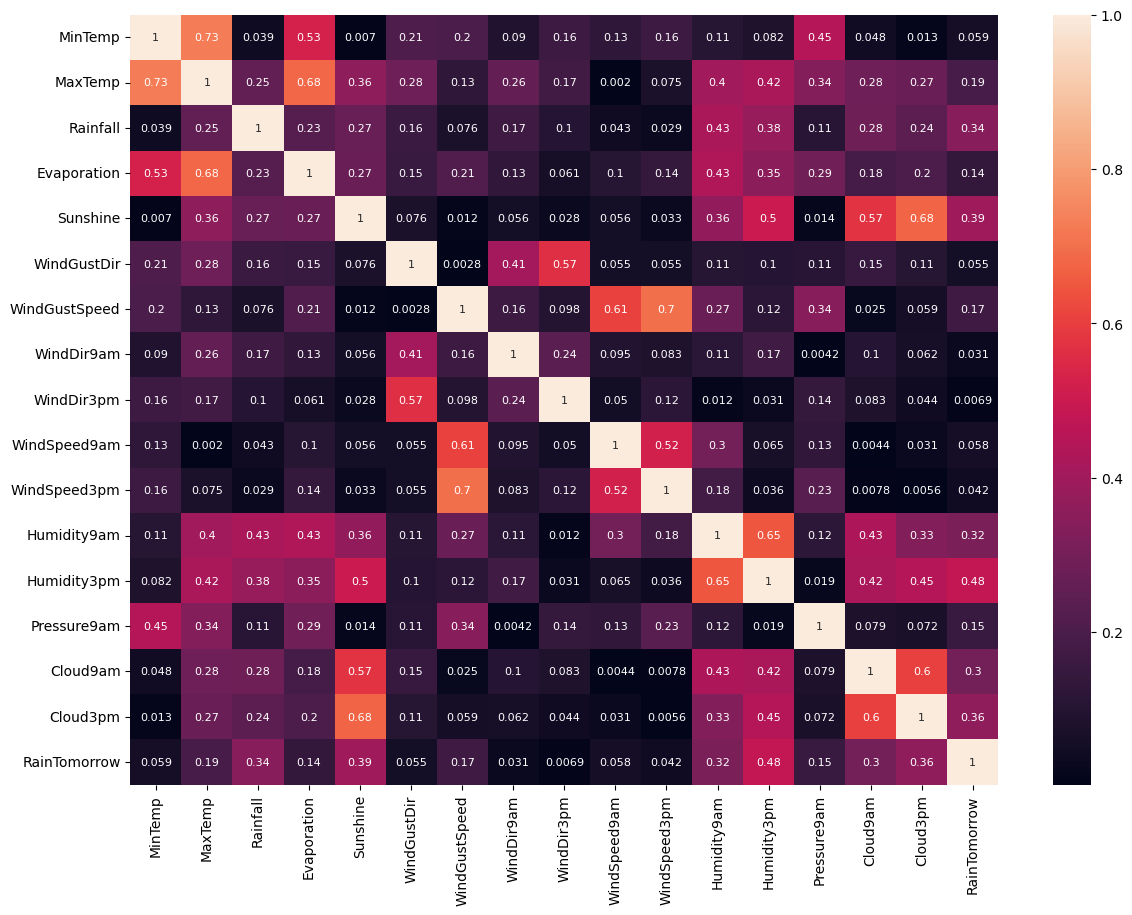

In [1471]:
df_corr = df11.corr().abs ()

plt.figure(figsize=(14, 10))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :8})
plt.show()

# 

### Oversampling

In [1472]:
df11.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9  0.470004     1.774952  2.185028           13   
1      7.4     25.1  0.000000     1.458615  2.185028           14   
2     12.9     25.7  0.000000     2.484907  2.277267           15   
3      9.2     28.0  0.000000     2.753661  2.185028            4   
4     17.5     32.3  0.693147     2.476538  1.435085           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       3.806662          13          14      3.044522      3.218876   
1       3.806662           6          15      1.609438      3.135494   
2       3.850148          13          15      2.995732      3.295837   
3       3.218876           9           0      2.484907      2.302585   
4       3.737670           1           7      2.079442      3.044522   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  RainTomorrow  
0         71.0         22.0       1007.7       8.0  4.320988             0  
1         44.0         25.0       1010.6       4.5  4.320988             0  
2         38.0         30.0       1007.6       1.5  2.000000             0  
3         45.0         16.0       1017.6       4.5  4.320988             0  
4         82.0         33.0       1010.8       7.0  8.000000             0

In [1473]:
df11.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainTomorrow'],
      dtype='object')

In [1474]:
df11["RainTomorrow"].unique()

array([0, 1], dtype=int64)

In [1475]:
df11['RainTomorrow'].value_counts()

0    3764
1    1092
Name: RainTomorrow, dtype: int64

In [1476]:
x = df11.drop(['RainTomorrow'],axis=1)
y = df11['RainTomorrow']

In [1477]:
from imblearn.over_sampling import SMOTE

In [1478]:
upsample = SMOTE()

In [1479]:
x, y = upsample.fit_resample(x,y)

In [1480]:
from collections import Counter
count = Counter(y)
print(count)

Counter({0: 3764, 1: 3764})


In [1486]:
df11.shape

(4856, 17)

# 

### Standardization

In [1487]:
from sklearn.preprocessing import StandardScaler

In [1488]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Train-Test split

In [1489]:
from sklearn.model_selection import train_test_split

In [1490]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [1491]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [1492]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [1493]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [1494]:
cls_reg.coef_

array([[-0.3303412 ,  0.16121304,  0.43011144,  0.06803857, -0.25594403,
        -0.00917391,  0.92834678, -0.04593727, -0.2739882 , -0.09734958,
        -0.31439522,  0.16357783,  1.26912081, -0.27497708,  0.03585841,
         0.41884433]])

In [1495]:
cls_reg.intercept_

array([0.10340441])

In [1496]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.797910024796316


In [1497]:
y_pred = cls_reg.predict(x_test)

In [1498]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7933049946865037


In [1499]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[796, 159],
       [230, 697]], dtype=int64)

In [1500]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       955
           1       0.81      0.75      0.78       927

    accuracy                           0.79      1882
   macro avg       0.80      0.79      0.79      1882
weighted avg       0.79      0.79      0.79      1882



In [1501]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1502]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.75188781 1.        ]
False Positive rate =  [0.         0.16649215 1.        ]


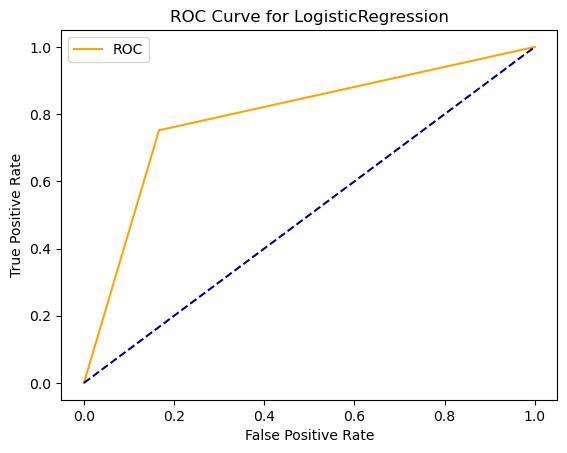

In [1503]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

### Cross-validation

In [1504]:
from sklearn.model_selection import KFold, cross_val_score

In [1505]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.7920354 , 0.78565102, 0.78387954, 0.81753764, 0.79450841])

In [1506]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.794722402940969

In [1507]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.82758621, 0.79045093, 0.79255319, 0.76595745, 0.77393617])

In [1508]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.7900967887578306

In [1509]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1510]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.75188781 1.        ]
False Positive rate =  [0.         0.16649215 1.        ]


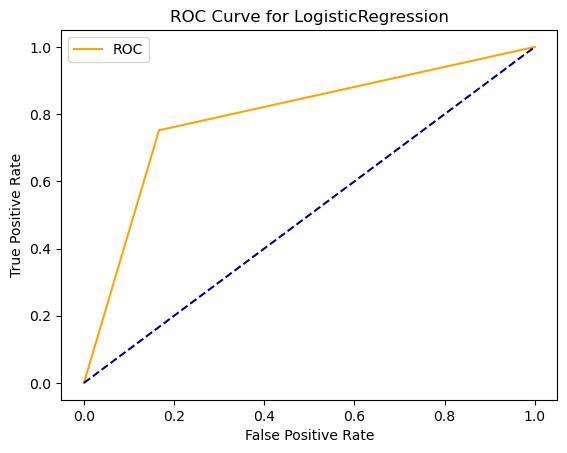

In [1511]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to LogisticRegression

In [1512]:
from sklearn.ensemble import BaggingClassifier

In [1513]:
bag0 = BaggingClassifier(LogisticRegression())

In [1514]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [1515]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.7973786751682607


In [1516]:
y_pred = bag0.predict(x_test)

In [1517]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7927736450584485


In [1518]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[800, 155],
       [235, 692]], dtype=int64)

In [1519]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       955
           1       0.82      0.75      0.78       927

    accuracy                           0.79      1882
   macro avg       0.79      0.79      0.79      1882
weighted avg       0.79      0.79      0.79      1882



In [1520]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1521]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.74649407 1.        ]
False Positive rate =  [0.         0.16230366 1.        ]


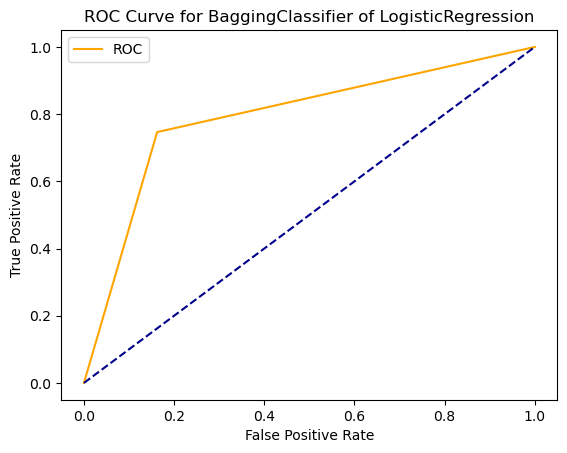

In [1522]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of LogisticRegression')
plt.legend()
plt.show()

### Cross-validation

In [1523]:
from sklearn.model_selection import KFold, cross_val_score

In [1524]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.79292035, 0.78653676, 0.78122232, 0.8166519 , 0.79539415])

In [1525]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.7961392727529256

In [1526]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.82493369, 0.79310345, 0.80585106, 0.7712766 , 0.7712766 ])

In [1527]:
cross_val_score (bag0, x_test, y_test, cv=5).mean()

0.7879691291833625

In [1528]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1529]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.74649407 1.        ]
False Positive rate =  [0.         0.16230366 1.        ]


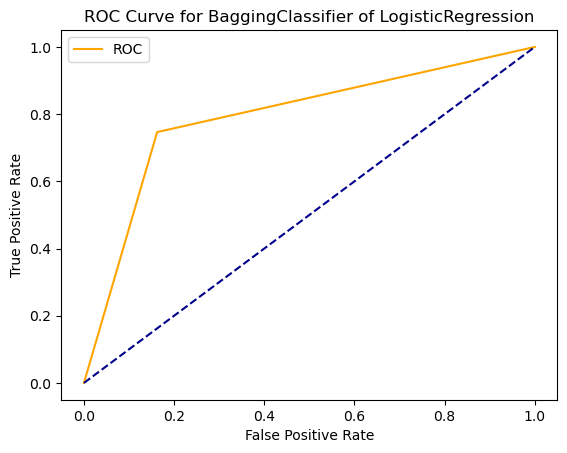

In [1530]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of LogisticRegression')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [1531]:
from sklearn.tree import DecisionTreeClassifier

In [1532]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [1533]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10)

In [1534]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [1535]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.9277364505844846


In [1536]:
y_pred = cls_dt.predict(x_test)

In [1537]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8241232731137088


In [1538]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[806, 149],
       [182, 745]], dtype=int64)

In [1539]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       955
           1       0.83      0.80      0.82       927

    accuracy                           0.82      1882
   macro avg       0.82      0.82      0.82      1882
weighted avg       0.82      0.82      0.82      1882



In [1540]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1541]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.80366775 1.        ]
False Positive rate =  [0.         0.15602094 1.        ]


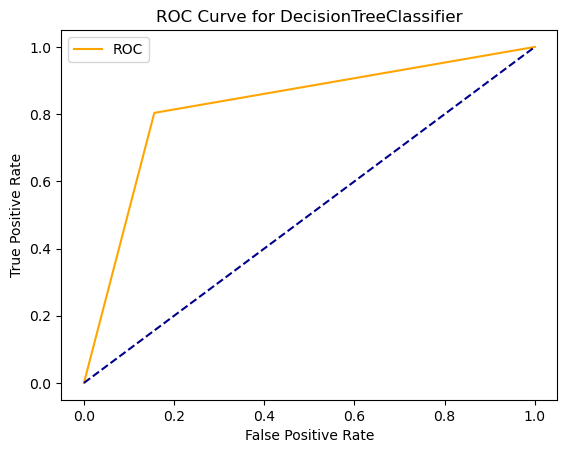

In [1542]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1543]:
from sklearn.model_selection import KFold, cross_val_score

In [1544]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.82123894, 0.8255093 , 0.80336581, 0.8166519 , 0.80779451])

In [1545]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.8140258824082711

In [1546]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.77453581, 0.77984085, 0.77659574, 0.7606383 , 0.78457447])

In [1547]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.7768229019696371

In [1548]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1549]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.80366775 1.        ]
False Positive rate =  [0.         0.15602094 1.        ]


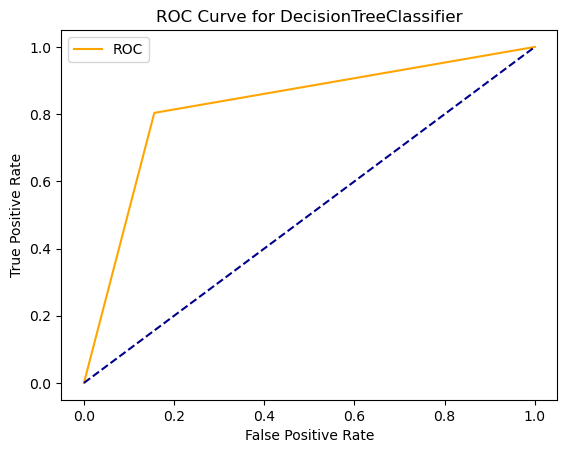

In [1550]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [1551]:
from sklearn.ensemble import BaggingClassifier

In [1552]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10))

In [1553]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        min_samples_split=10))

In [1554]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.9431455897980872


In [1555]:
y_pred = bag1.predict(x_test)

In [1556]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8618490967056323


In [1557]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[828, 127],
       [133, 794]], dtype=int64)

In [1558]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       955
           1       0.86      0.86      0.86       927

    accuracy                           0.86      1882
   macro avg       0.86      0.86      0.86      1882
weighted avg       0.86      0.86      0.86      1882



In [1559]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1560]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85652643 1.        ]
False Positive rate =  [0.         0.13298429 1.        ]


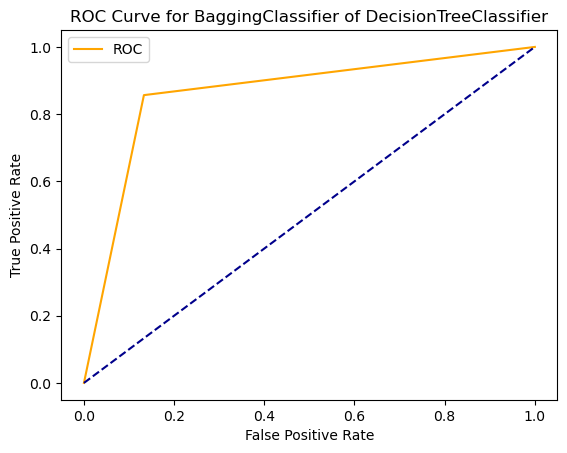

In [1561]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of DecisionTreeClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1562]:
from sklearn.model_selection import KFold, cross_val_score

In [1563]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.86283186, 0.83879539, 0.85562445, 0.86182462, 0.85473871])

In [1564]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8498042750652546

In [1565]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.85411141, 0.84615385, 0.79521277, 0.80053191, 0.76861702])

In [1566]:
cross_val_score (bag1, x_test, y_test, cv=5).mean()

0.8049805293752469

In [1567]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1568]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85652643 1.        ]
False Positive rate =  [0.         0.13298429 1.        ]


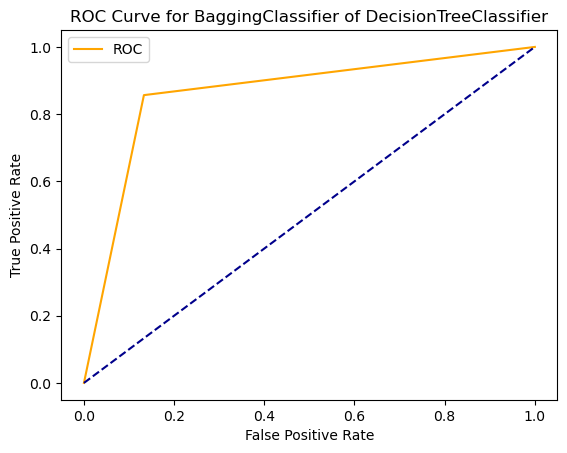

In [1569]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of DecisionTreeClassifier')
plt.legend()
plt.show()

# 

### Random Forest Classifier

In [1570]:
from sklearn.ensemble import RandomForestClassifier

In [1571]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [1583]:
cls_rf = RandomForestClassifier(n_estimators=160,criterion='gini',min_samples_split=3,max_depth=16)

In [1584]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=160)

In [1585]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8947927736450585


In [1586]:
y_pred = cls_rf.predict(x_test)

In [1587]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8905419766206164


In [1588]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[849, 106],
       [100, 827]], dtype=int64)

In [1589]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       955
           1       0.89      0.89      0.89       927

    accuracy                           0.89      1882
   macro avg       0.89      0.89      0.89      1882
weighted avg       0.89      0.89      0.89      1882



In [1590]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1591]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89212513 1.        ]
False Positive rate =  [0.         0.11099476 1.        ]


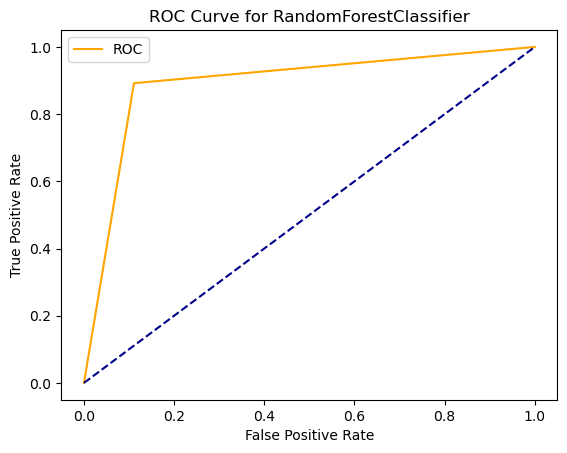

In [1592]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1593]:
from sklearn.model_selection import KFold, cross_val_score

In [1594]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.88672566, 0.87511072, 0.86891054, 0.89282551, 0.89193977])

In [1595]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.8850499698221466

In [1596]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.87533156, 0.86206897, 0.83510638, 0.81382979, 0.81117021])

In [1597]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8410943055477171

In [1598]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1599]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89212513 1.        ]
False Positive rate =  [0.         0.11099476 1.        ]


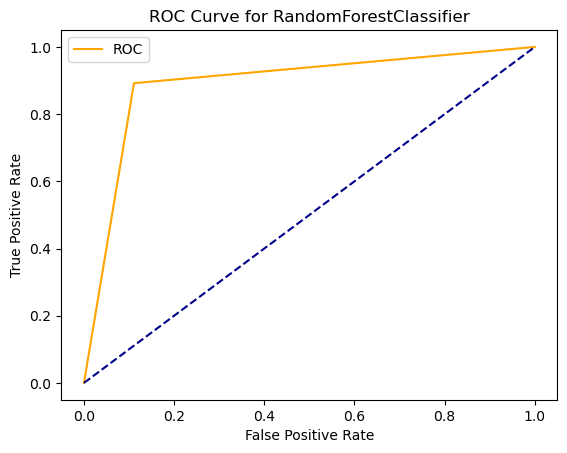

In [1600]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to RandomForestClassifier

In [1605]:
from sklearn.ensemble import BaggingClassifier

In [1606]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=160,criterion='gini',min_samples_split=3,max_depth=16))

In [1607]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=160))

In [1608]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.9803400637619554


In [1609]:
y_pred = bag2.predict(x_test)

In [1610]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8825717321997875


In [1611]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[833, 122],
       [ 99, 828]], dtype=int64)

In [1612]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       955
           1       0.87      0.89      0.88       927

    accuracy                           0.88      1882
   macro avg       0.88      0.88      0.88      1882
weighted avg       0.88      0.88      0.88      1882



In [1613]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1614]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89320388 1.        ]
False Positive rate =  [0.         0.12774869 1.        ]


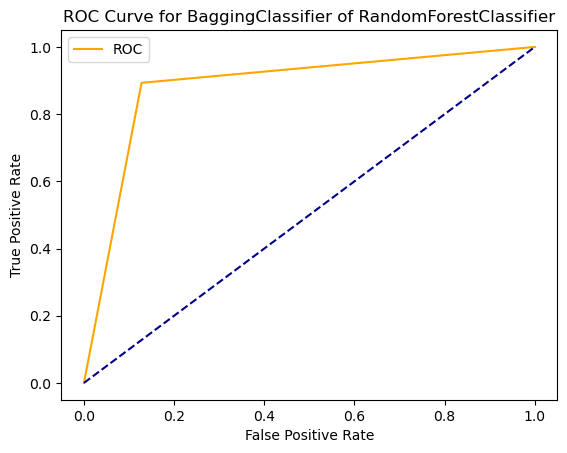

In [1615]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of RandomForestClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1616]:
from sklearn.model_selection import KFold, cross_val_score

In [1617]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.88230088, 0.8591674 , 0.86182462, 0.88485385, 0.88308237])

In [1618]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.8738920024769354

In [1619]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.86206897, 0.85676393, 0.81648936, 0.81648936, 0.78723404])

In [1620]:
cross_val_score (bag2, x_test, y_test, cv=5).mean()

0.8294105197810261

In [1621]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1622]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89320388 1.        ]
False Positive rate =  [0.         0.12774869 1.        ]


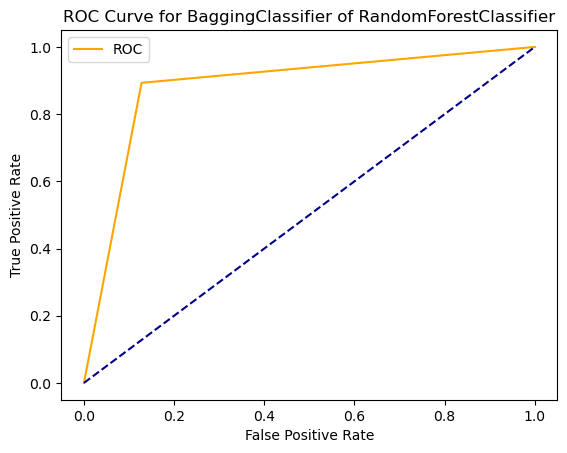

In [1623]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of RandomForestClassifier')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [1624]:
from sklearn.neighbors import KNeighborsClassifier

In [1625]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [1626]:
cls_KN = KNeighborsClassifier(n_neighbors=9, leaf_size=2, p = 1, algorithm='auto', weights = 'distance')

In [1627]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=9, p=1, weights='distance')

In [1628]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


In [1635]:
y_pred = cls_KN.predict(x_test)

In [1636]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8724760892667375


In [1637]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[763, 192],
       [ 48, 879]], dtype=int64)

In [1638]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       955
           1       0.82      0.95      0.88       927

    accuracy                           0.87      1882
   macro avg       0.88      0.87      0.87      1882
weighted avg       0.88      0.87      0.87      1882



In [1639]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1640]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94822006 1.        ]
False Positive rate =  [0.         0.20104712 1.        ]


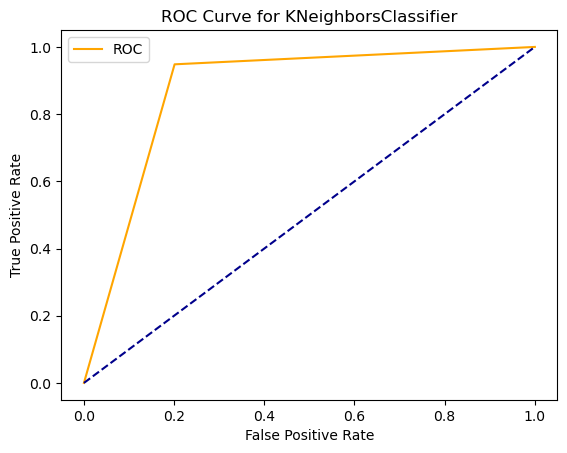

In [1641]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1642]:
from sklearn.model_selection import KFold, cross_val_score

In [1643]:
cross_val_score (cls_KN, x_train, y_train, cv=5)

array([0.86814159, 0.8591674 , 0.8591674 , 0.8680248 , 0.87156776])

In [1644]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.8652137924547528

In [1645]:
cross_val_score (cls_KN, x_test, y_test, cv=5)

array([0.83289125, 0.82228117, 0.81648936, 0.84840426, 0.77393617])

In [1646]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.8188004402054292

In [1647]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1648]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94822006 1.        ]
False Positive rate =  [0.         0.20104712 1.        ]


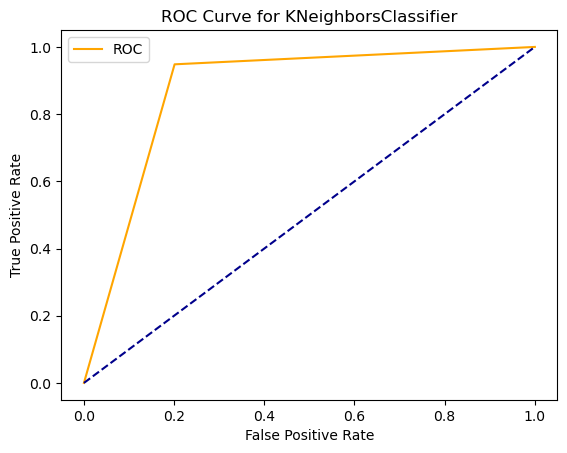

In [1649]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [1650]:
from sklearn.ensemble import BaggingClassifier

In [1651]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=9, leaf_size=2, p = 1, algorithm='auto', weights = 'distance'))

In [1652]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=2,
                                                      n_neighbors=9, p=1,
                                                      weights='distance'))

In [1653]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.9964576691462983


In [1654]:
y_pred = bag3.predict(x_test)

In [1655]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8730074388947928


In [1656]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[770, 185],
       [ 54, 873]], dtype=int64)

In [1657]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       955
           1       0.83      0.94      0.88       927

    accuracy                           0.87      1882
   macro avg       0.88      0.87      0.87      1882
weighted avg       0.88      0.87      0.87      1882



In [1658]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1659]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94174757 1.        ]
False Positive rate =  [0.         0.19371728 1.        ]


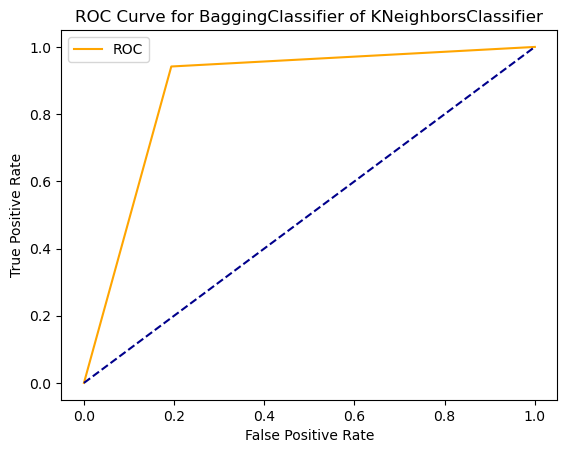

In [1660]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of KNeighborsClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1661]:
from sklearn.model_selection import KFold, cross_val_score

In [1662]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.86725664, 0.85828167, 0.85119575, 0.86005314, 0.86448184])

In [1663]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.8597250288061329

In [1664]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.80636605, 0.82493369, 0.80851064, 0.84840426, 0.76595745])

In [1665]:
cross_val_score (bag3, x_test, y_test, cv=5).mean()

0.8145507647158418

In [1666]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1667]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94174757 1.        ]
False Positive rate =  [0.         0.19371728 1.        ]


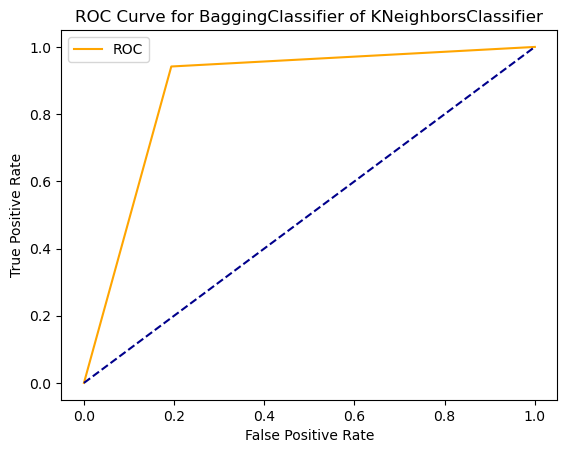

In [1668]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of KNeighborsClassifier')
plt.legend()
plt.show()

# 

### GradientBoostingClassifier

In [1669]:
from sklearn.ensemble import GradientBoostingClassifier

In [1670]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3)

In [1671]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=17)

In [1672]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8990435706695006


In [1673]:
y_pred = cls_gb.predict(x_test)

In [1674]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8501594048884166


In [1675]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[841, 114],
       [168, 759]], dtype=int64)

In [1676]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       955
           1       0.87      0.82      0.84       927

    accuracy                           0.85      1882
   macro avg       0.85      0.85      0.85      1882
weighted avg       0.85      0.85      0.85      1882



In [1677]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1678]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81877023 1.        ]
False Positive rate =  [0.         0.11937173 1.        ]


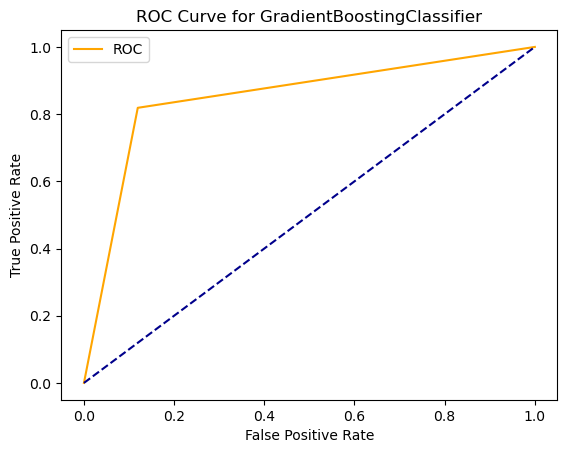

In [1679]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1680]:
from sklearn.model_selection import KFold, cross_val_score

In [1681]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.85486726, 0.81576616, 0.85385297, 0.87776794, 0.85739593])

In [1682]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.8519300500873982

In [1683]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.81167109, 0.81962865, 0.79787234, 0.78723404, 0.80851064])

In [1684]:
cross_val_score (cls_gb, x_test, y_test, cv=5).mean()

0.8055152660985382

In [1685]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1686]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81877023 1.        ]
False Positive rate =  [0.         0.11937173 1.        ]


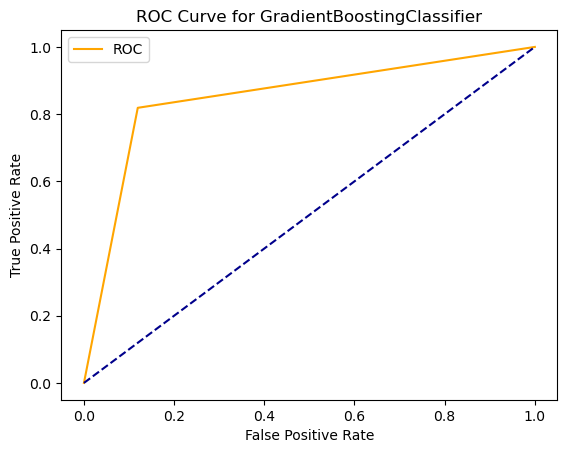

In [1687]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [1688]:
from sklearn.ensemble import BaggingClassifier

In [1689]:
bag4 = BaggingClassifier(GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3))

In [1690]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=17))

In [1691]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.9146298264257882


In [1692]:
y_pred = bag4.predict(x_test)

In [1693]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8671625929861849


In [1694]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[836, 119],
       [131, 796]], dtype=int64)

In [1695]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       955
           1       0.87      0.86      0.86       927

    accuracy                           0.87      1882
   macro avg       0.87      0.87      0.87      1882
weighted avg       0.87      0.87      0.87      1882



In [1696]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1697]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85868393 1.        ]
False Positive rate =  [0.         0.12460733 1.        ]


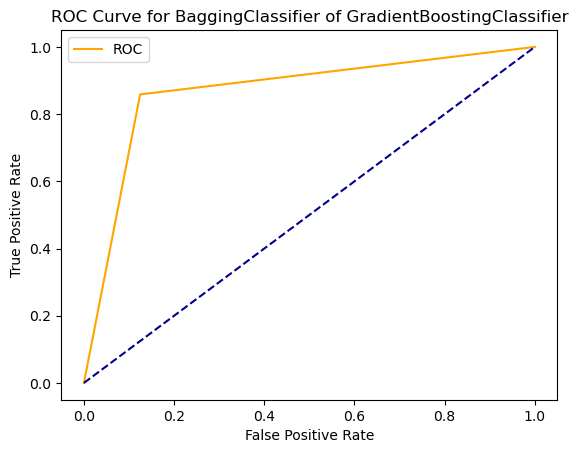

In [1698]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GradientBoostingClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1699]:
from sklearn.model_selection import KFold, cross_val_score

In [1700]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.88938053, 0.85739593, 0.86448184, 0.88485385, 0.87865368])

In [1701]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.8788508900507145

In [1702]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.85676393, 0.86206897, 0.84308511, 0.81382979, 0.81648936])

In [1703]:
cross_val_score (bag4, x_test, y_test, cv=5).mean()

0.83685450646199

In [1704]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1705]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85868393 1.        ]
False Positive rate =  [0.         0.12460733 1.        ]


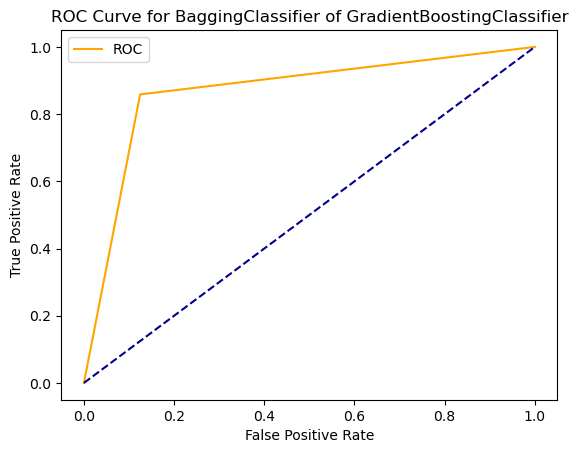

In [1706]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GradientBoostingClassifier')
plt.legend()
plt.show()

# 

### GaussianNB

In [1707]:
from sklearn.naive_bayes import GaussianNB

In [1708]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [1709]:
gnb = GaussianNB(var_smoothing=1e-09)

In [1710]:
gnb.fit(x_train, y_train)

GaussianNB()

In [1711]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.7665603967410556


In [1712]:
y_pred = gnb.predict(x_test)

In [1713]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7683315621679064


In [1714]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[758, 197],
       [239, 688]], dtype=int64)

In [1715]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       955
           1       0.78      0.74      0.76       927

    accuracy                           0.77      1882
   macro avg       0.77      0.77      0.77      1882
weighted avg       0.77      0.77      0.77      1882



In [1716]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1717]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.74217907 1.        ]
False Positive rate =  [0.         0.20628272 1.        ]


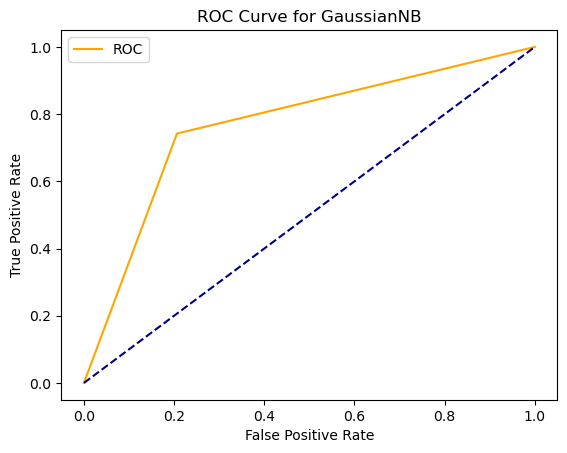

In [1718]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

### Cross-validation

In [1719]:
from sklearn.model_selection import KFold, cross_val_score

In [1720]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.76725664, 0.75996457, 0.74844996, 0.78033658, 0.77945084])

In [1721]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.767091717159049

In [1722]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.78779841, 0.79045093, 0.76595745, 0.76329787, 0.72606383])

In [1723]:
cross_val_score (gnb, x_test, y_test, cv=5).mean()

0.7667136971612393

In [1724]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1725]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.74217907 1.        ]
False Positive rate =  [0.         0.20628272 1.        ]


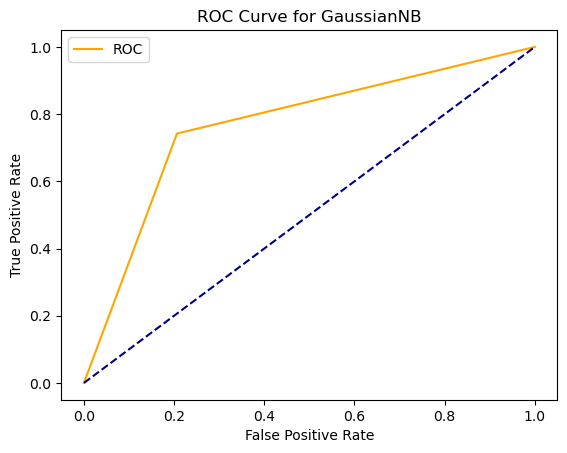

In [1726]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [1727]:
from sklearn.ensemble import BaggingClassifier

In [1728]:
bag5 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [1729]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [1730]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.7656748140276302


In [1731]:
y_pred = bag5.predict(x_test)

In [1732]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7662061636556854


In [1733]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[756, 199],
       [241, 686]], dtype=int64)

In [1734]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       955
           1       0.78      0.74      0.76       927

    accuracy                           0.77      1882
   macro avg       0.77      0.77      0.77      1882
weighted avg       0.77      0.77      0.77      1882



In [1735]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1736]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.74002157 1.        ]
False Positive rate =  [0.         0.20837696 1.        ]


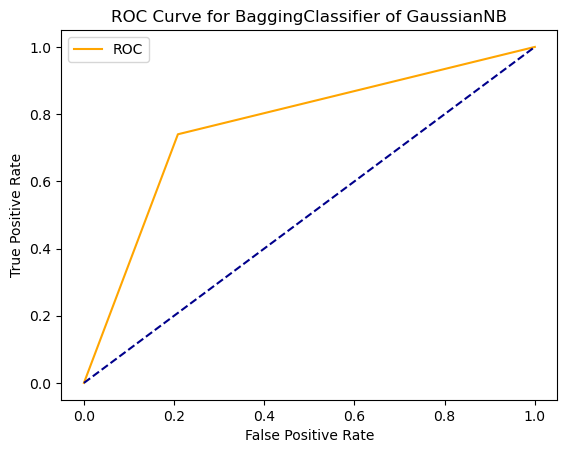

In [1737]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GaussianNB')
plt.legend()
plt.show()

### Cross-validation

In [1738]:
from sklearn.model_selection import KFold, cross_val_score

In [1739]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.76725664, 0.75907883, 0.7493357 , 0.78033658, 0.77945084])

In [1740]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7663831254850013

In [1741]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.79045093, 0.78779841, 0.76861702, 0.76329787, 0.72606383])

In [1742]:
cross_val_score (bag5, x_test, y_test, cv=5).mean()

0.7661831931824594

In [1743]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1744]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.74002157 1.        ]
False Positive rate =  [0.         0.20837696 1.        ]


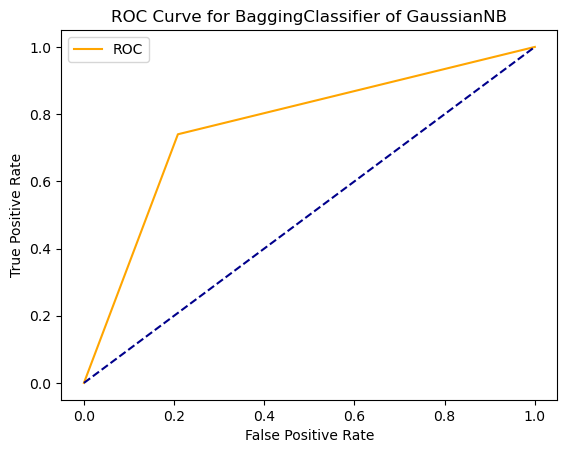

In [1745]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GaussianNB')
plt.legend()
plt.show()

# 

### Plotting ROC Curve for all models

In [1746]:
from sklearn.metrics import plot_roc_curve

#### Training Data

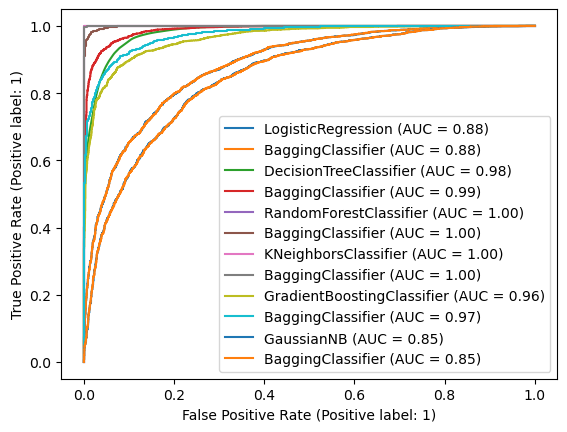

In [1747]:
disp = plot_roc_curve (cls_reg, x_train, y_train)

plot_roc_curve (bag0, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_dt, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag1, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag2, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_KN, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag3, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_gb, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag4, x_train, y_train, ax=disp.ax_)
plot_roc_curve (gnb, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag5, x_train, y_train, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

#### Testing Data

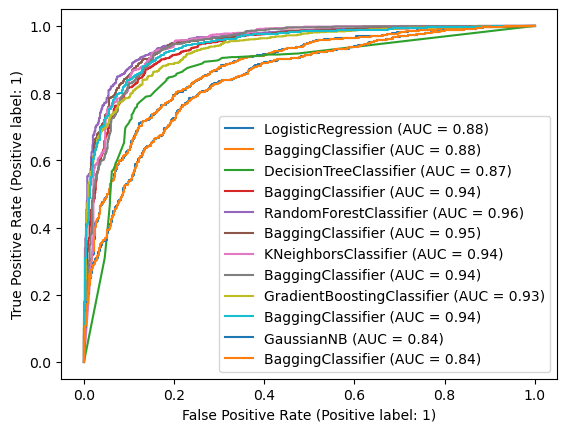

In [1748]:
disp = plot_roc_curve (cls_reg, x_test, y_test)

plot_roc_curve (bag0, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_dt, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag1, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag2, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_KN, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag3, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag4, x_test, y_test, ax=disp.ax_)
plot_roc_curve (gnb, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag5, x_test, y_test, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

# 

### Best Model

### Random Forest Classifier

In [1570]:
from sklearn.ensemble import RandomForestClassifier

In [1571]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [1583]:
cls_rf = RandomForestClassifier(n_estimators=160,criterion='gini',min_samples_split=3,max_depth=16)

In [1584]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=160)

In [1585]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8947927736450585


In [1586]:
y_pred = cls_rf.predict(x_test)

In [1587]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8905419766206164


In [1588]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[849, 106],
       [100, 827]], dtype=int64)

In [1589]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       955
           1       0.89      0.89      0.89       927

    accuracy                           0.89      1882
   macro avg       0.89      0.89      0.89      1882
weighted avg       0.89      0.89      0.89      1882



In [1590]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1591]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89212513 1.        ]
False Positive rate =  [0.         0.11099476 1.        ]


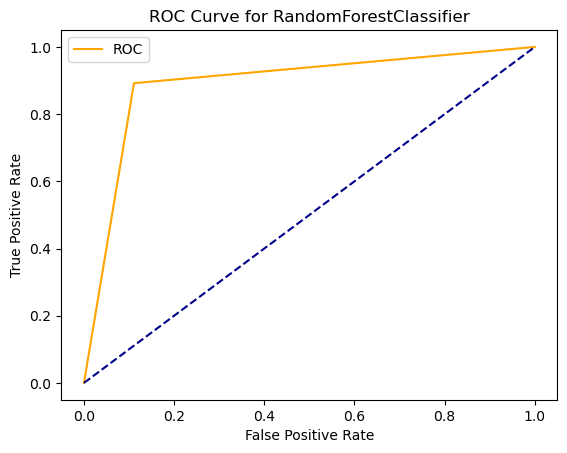

In [1592]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

### Cross-validation

In [1593]:
from sklearn.model_selection import KFold, cross_val_score

In [1594]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.88672566, 0.87511072, 0.86891054, 0.89282551, 0.89193977])

In [1595]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.8850499698221466

In [1596]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.87533156, 0.86206897, 0.83510638, 0.81382979, 0.81117021])

In [1597]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8410943055477171

In [1598]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1599]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89212513 1.        ]
False Positive rate =  [0.         0.11099476 1.        ]


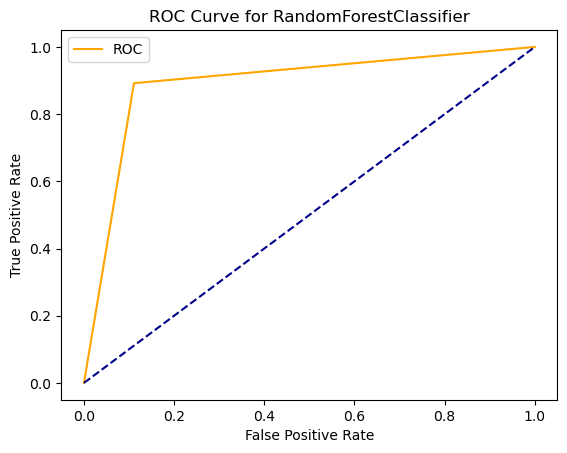

In [1600]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

### Reasons for selecting this Model

#### 1) Has one of the highest Training & Testing Score.
#### 2) Very little difference between Training & Testing Score.
#### 3) Training Score is less than Testing score
#### 4) Has one of the highest Training & Testing Score for Cross-Validation result.
#### 5) Very little difference between Training & Testing Score for Cross-Validation result.
#### 6) Training Score is less than Testing score for Cross-Validation result.
#### 7) Very less difference between Training Score & Training Score for Cross-Validation result
#### 8) Very less difference between Testing Score & Testing Score for Cross-Validation result
#### 9) Has one of the highest Area-Covered, under ROC Curve

# 

### Saving the Best Mode

In [369]:
import pickle

In [370]:
with open('model_rf', 'wb') as f: 
    pickle.dump(cls_rf , f)

# 

# 

### Problem 2: Target = 'Rainfall'  & Label = Rest

### Checking Contribution Score

In [427]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [428]:
from sklearn.feature_selection import SelectKBest, f_classif

In [429]:
x = df.drop(columns = ['Rainfall'])
y = df['Rainfall']

In [430]:
best_features = SelectKBest(score_func=f_classif, k=19)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(19, 'Score'))

     Feature_Name      Score
18      RainToday        inf
10    Humidity9am  11.805349
11    Humidity3pm   9.319301
19   RainTomorrow   7.535762
3        Sunshine   5.630369
14       Cloud9am   5.295232
17        Temp3pm   5.106620
1         MaxTemp   4.875033
15       Cloud3pm   4.410359
2     Evaporation   4.163913
6      WindDir9am   2.376310
4     WindGustDir   2.271900
16        Temp9am   2.238996
12    Pressure9am   1.871449
5   WindGustSpeed   1.638074
7      WindDir3pm   1.396548
13    Pressure3pm   1.394308
9    WindSpeed3pm   1.367480
0         MinTemp   1.076606


In [431]:
df12 = df
df12.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9  0.470004     1.774952  2.185028           13   
1      7.4     25.1  0.000000     1.458615  2.185028           14   
2     12.9     25.7  0.000000     2.484907  2.277267           15   
3      9.2     28.0  0.000000     2.753661  2.185028            4   
4     17.5     32.3  0.693147     2.476538  1.435085           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0       3.806662          13          14      3.044522  ...         71.0   
1       3.806662           6          15      1.609438  ...         44.0   
2       3.850148          13          15      2.995732  ...         38.0   
3       3.218876           9           0      2.484907  ...         45.0   
4       3.737670           1           7      2.079442  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0  4.320988     16.9   
1         25.0       1010.6       1007.8       4.5  4.320988     17.2   
2         30.0       1007.6       1008.7       1.5  2.000000     21.0   
3         16.0       1017.6       1012.8       4.5  4.320988     18.1   
4         33.0       1010.8       1006.0       7.0  8.000000     17.8   

   Temp3pm  RainToday  RainTomorrow  
0     21.8          0             0  
1     24.3          0             0  
2     23.2          0             0  
3     26.5          0             0  
4     29.7          0             0  

[5 rows x 21 columns]

In [432]:
df12.shape

(4856, 21)

# 

### Checking Multi-colinearity

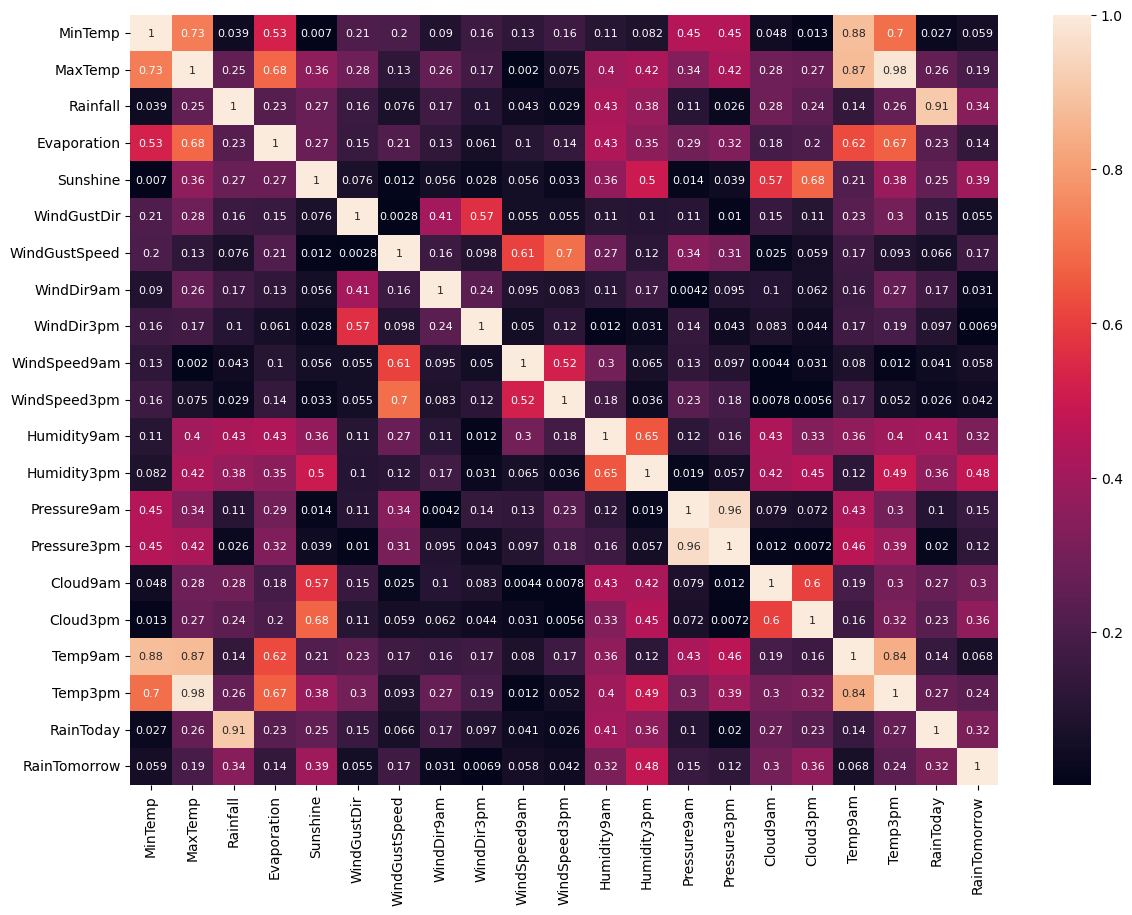

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df12.corr().abs ()

plt.figure(figsize=(14, 10))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :8})
plt.show()

In [434]:
df12.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# 

### Separating Features & Target

In [435]:
x = df12.drop(columns = ['Rainfall'])
y = df12['Rainfall']

# 

### Standardization

In [436]:
from sklearn.preprocessing import StandardScaler

In [437]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Train-Test split

In [438]:
from sklearn.model_selection import train_test_split

In [439]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [440]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 

### Linear Regression

In [441]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [442]:
reg.fit(x_train, y_train)

LinearRegression()

In [443]:
reg.coef_

array([-0.00813741, -0.05989908, -0.01359648, -0.00748735,  0.00315418,
        0.02518768,  0.00711245,  0.00548719,  0.01480606, -0.02118462,
        0.06484185, -0.01511225, -0.09401574,  0.08419028,  0.00769469,
       -0.00795277,  0.04046943,  0.05222233,  0.68776524,  0.0372452 ])

In [444]:
reg.intercept_

0.42833521025534543

In [445]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.8380004348148014


In [446]:
y_pred = reg.predict(x_test)

In [447]:
r2_score(y_test, y_pred)

0.8463000513838679

In [448]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.1040956668963286
RMSE 0.3226386010636802
MAE 0.1860710926693005


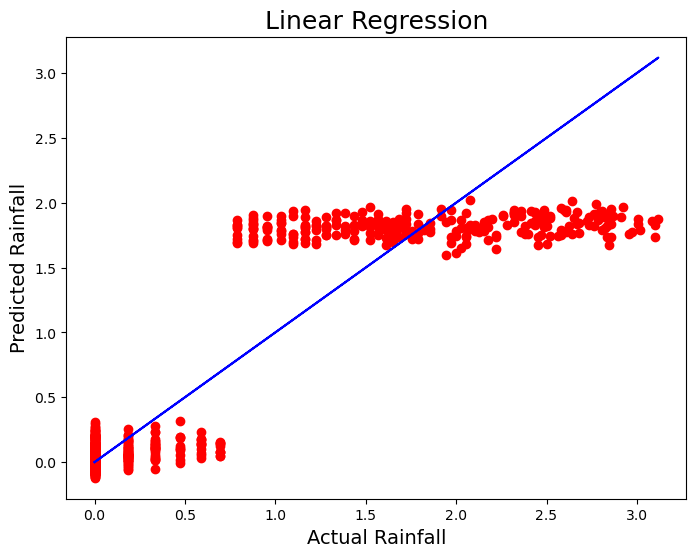

In [449]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('Linear Regression', fontsize=18) 
#plt.savefig('lr.png')
plt.show()

### Cross-validation for LinearRegression

In [450]:
from sklearn.model_selection import cross_val_score

In [451]:
cv_score=cross_val_score (reg, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [452]:
cv_score

array([0.86218386, 0.85773837, 0.83415577, 0.81866685, 0.85251541,
       0.83552438, 0.80937644, 0.82635381, 0.83750223, 0.81921654])

In [453]:
cv_mean

0.8353233664701856

In [454]:
cv_score=cross_val_score (reg, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [455]:
cv_score

array([0.8270943 , 0.84611916, 0.86918133, 0.83162654, 0.84449511,
       0.85046264, 0.81181327, 0.84219386, 0.83311315, 0.83978229])

In [456]:
cv_mean

0.8395881651581965

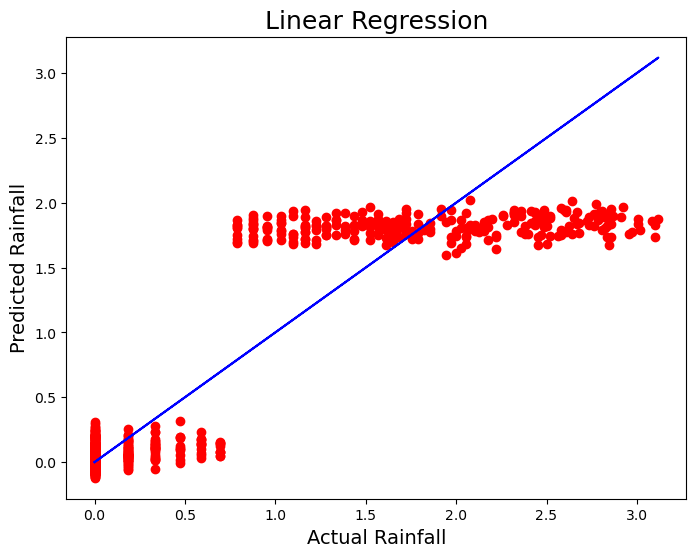

In [457]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('Linear Regression', fontsize=18) 
#plt.savefig('lr1.png')
plt.show()

# 

### DecisionTreeRegressor

In [458]:
from sklearn.tree import DecisionTreeRegressor

In [1781]:
dr = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'mae', "gini", "entropy", "log_loss"],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(2, 10, 2),
              'min_samples_leaf': range(1,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'splitter': 'random'}

In [489]:
dec = DecisionTreeRegressor(criterion='mse', splitter='random', max_features=None, min_samples_leaf= 5, min_samples_split=10,max_depth=11)

In [490]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, min_samples_leaf=5,
                      min_samples_split=10, splitter='random')

In [491]:
print('Accuracy Score:',dec.score(x_train, y_train))

Accuracy Score: 0.8907777995877535


In [492]:
y_pred = dec.predict(x_test)

In [493]:
r2_score(y_test, y_pred)

0.8029958442970201

In [494]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.13342411076835867
RMSE 0.36527265264232234
MAE 0.1819216105333037


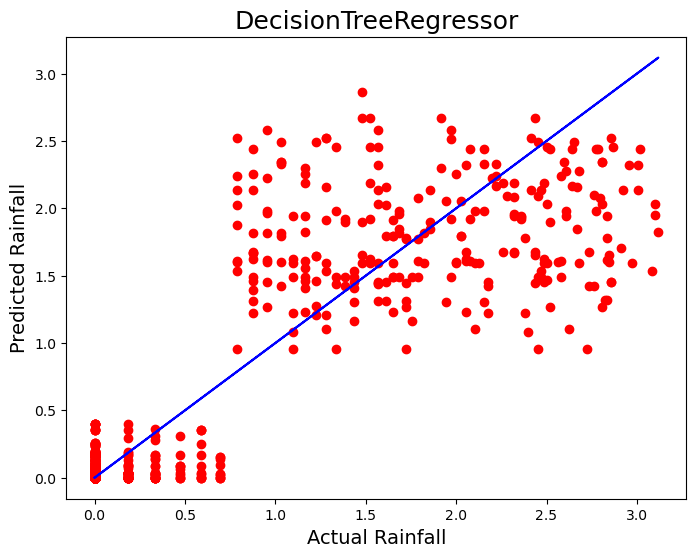

In [495]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('DecisionTreeRegressor', fontsize=18) 
#plt.savefig('dt.png')
plt.show()

### Cross-validation for DecisionTreeRegressor

In [496]:
from sklearn.model_selection import cross_val_score

In [497]:
cv_score=cross_val_score (dec, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [498]:
cv_score

array([0.82478428, 0.81948887, 0.7581147 , 0.75440645, 0.76964549,
       0.79260414, 0.79249896, 0.81440518, 0.81920686, 0.73333644])

In [499]:
cv_mean

0.7878491376779073

In [500]:
cv_score=cross_val_score (dec, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [501]:
cv_score

array([0.77847449, 0.80404159, 0.83622594, 0.820758  , 0.82535627,
       0.72440287, 0.77068804, 0.80298537, 0.77884593, 0.76041904])

In [502]:
cv_mean

0.7902197528733881

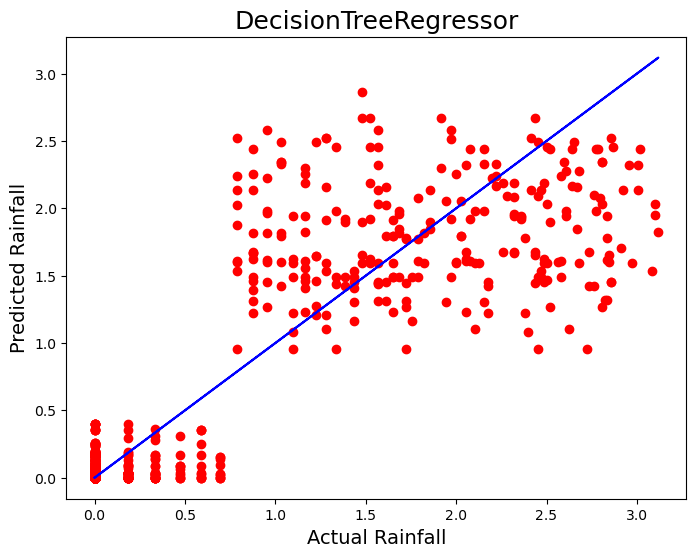

In [503]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('DecisionTreeRegressor', fontsize=18) 
#plt.savefig('dt1.png')
plt.show()

# 

### RandomForestRegressor

In [504]:
from sklearn.ensemble import RandomForestRegressor

In [1798]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': range(5,250,5),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 45}

In [535]:
rf = RandomForestRegressor(n_estimators=45, max_features= None ,min_samples_split=8,max_depth=18, max_leaf_nodes=300)

In [536]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features=None, max_leaf_nodes=300,
                      min_samples_split=8, n_estimators=45)

In [537]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.958042694516642


In [538]:
y_pred = rf.predict(x_test)

In [539]:
r2_score(y_test, y_pred)

0.8453992804172161

In [540]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.10470572796231269
RMSE 0.3235826447174086
MAE 0.1735282602525309


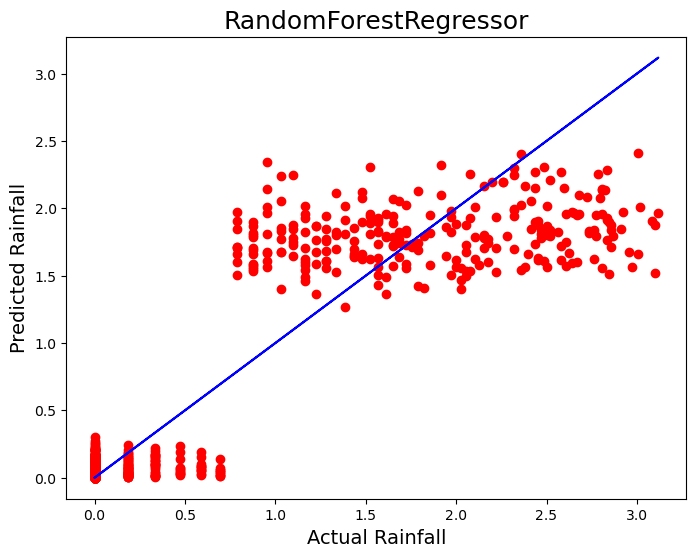

In [541]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('RandomForestRegressor', fontsize=18) 
#plt.savefig('rf.png')
plt.show()

### Cross-validation for RandomForestRegressor

In [542]:
from sklearn.model_selection import cross_val_score

In [543]:
cv_score=cross_val_score (rf, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [544]:
cv_score

array([0.85137189, 0.85453176, 0.8440803 , 0.81377251, 0.84190097,
       0.83369345, 0.81084174, 0.83139353, 0.84584314, 0.81737823])

In [545]:
cv_mean

0.834480751678187

In [546]:
cv_score=cross_val_score (rf, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [547]:
cv_score

array([0.8086976 , 0.8348245 , 0.88997646, 0.83862168, 0.84132269,
       0.84020054, 0.78284326, 0.84213658, 0.77110599, 0.85449658])

In [548]:
cv_mean

0.8304225869502334

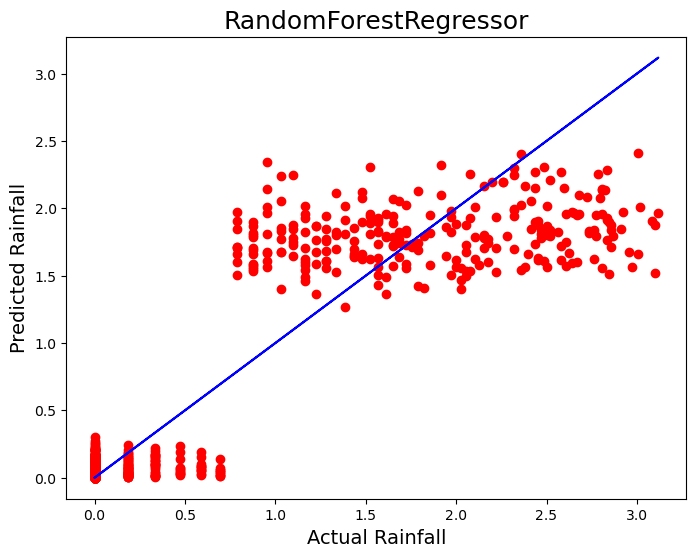

In [549]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('RandomForestRegressor', fontsize=18) 
#plt.savefig('rf1.png')
plt.show()

# 

### KNeighborsRegressor

In [550]:
from sklearn.neighbors import KNeighborsRegressor

In [1815]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [613]:
reg_KN = KNeighborsRegressor(n_neighbors=12, leaf_size=3, p = 1)

In [614]:
reg_KN.fit(x_train, y_train)

KNeighborsRegressor(leaf_size=3, n_neighbors=12, p=1)

In [615]:
print('Accuracy Score:',reg_KN.score(x_train, y_train))

Accuracy Score: 0.8084726738567978


In [616]:
y_pred = reg_KN.predict(x_test)

In [617]:
r2_score(y_test, y_pred)

0.7755111963321047

In [618]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.15203851360374385
RMSE 0.3899211633186173
MAE 0.20531208596748662


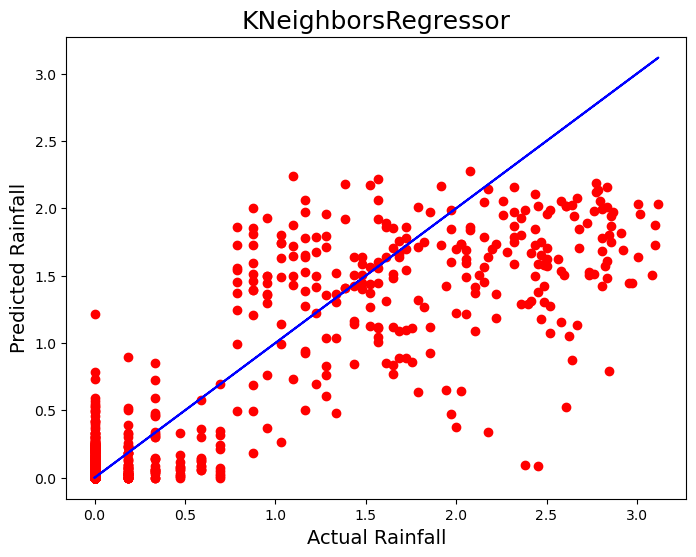

In [619]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('KNeighborsRegressor', fontsize=18) 
#plt.savefig('kn.png')
plt.show()

### Cross-validation for KNeighborsRegressor

In [620]:
from sklearn.model_selection import cross_val_score

In [621]:
cv_score=cross_val_score (reg_KN, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [622]:
cv_score

array([0.76903639, 0.79399407, 0.76451426, 0.72964042, 0.76572492,
       0.76935981, 0.73499443, 0.78544835, 0.79016017, 0.73302077])

In [623]:
cv_mean

0.7635893589193549

In [624]:
cv_score=cross_val_score (reg_KN, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [625]:
cv_score

array([0.68444633, 0.73211612, 0.68919741, 0.75435796, 0.74808828,
       0.79692052, 0.68810285, 0.76093023, 0.65105515, 0.70808804])

In [626]:
cv_mean

0.721330288662773

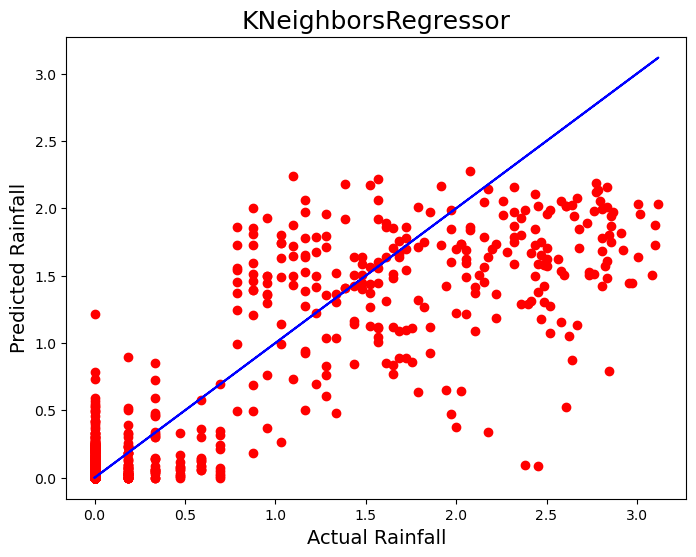

In [627]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('KNeighborsRegressor', fontsize=18) 
#plt.savefig('kn1.png')
plt.show()

# 

### SVR

In [628]:
from sklearn.svm import SVR

In [1832]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [629]:
svr = SVR(kernel='rbf',C=1, gamma=0.01)

In [630]:
svr.fit(x_train, y_train)

SVR(C=1, gamma=0.01)

In [631]:
print('Accuracy Score:',svr.score(x_train, y_train))

Accuracy Score: 0.8434936536763842


In [632]:
y_pred = svr.predict(x_test)

In [633]:
r2_score(y_test, y_pred)

0.8359804715166834

In [634]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.1110847619353086
RMSE 0.33329380722615987
MAE 0.204297418819634


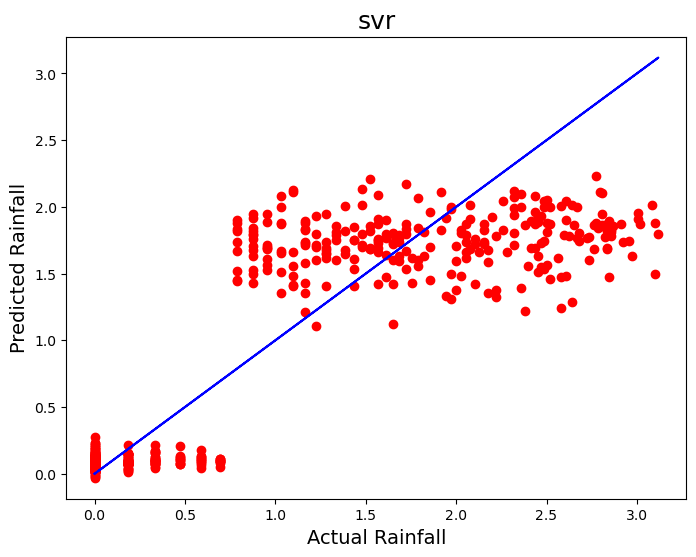

In [635]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('svr', fontsize=18) 
#plt.savefig('svr.png')
plt.show()

### Cross-validation for SVR

In [636]:
from sklearn.model_selection import cross_val_score

In [637]:
cv_score=cross_val_score (svr, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [638]:
cv_score

array([0.84485577, 0.85264069, 0.83261752, 0.82304646, 0.84315484,
       0.8384435 , 0.80492118, 0.82974212, 0.84118677, 0.82155913])

In [639]:
cv_mean

0.8332167987669328

In [640]:
cv_score=cross_val_score (svr, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [641]:
cv_score

array([0.83966758, 0.81613402, 0.82594233, 0.82156036, 0.82425436,
       0.87776338, 0.8268449 , 0.83640229, 0.80265525, 0.8113919 ])

In [642]:
cv_mean

0.828261636766956

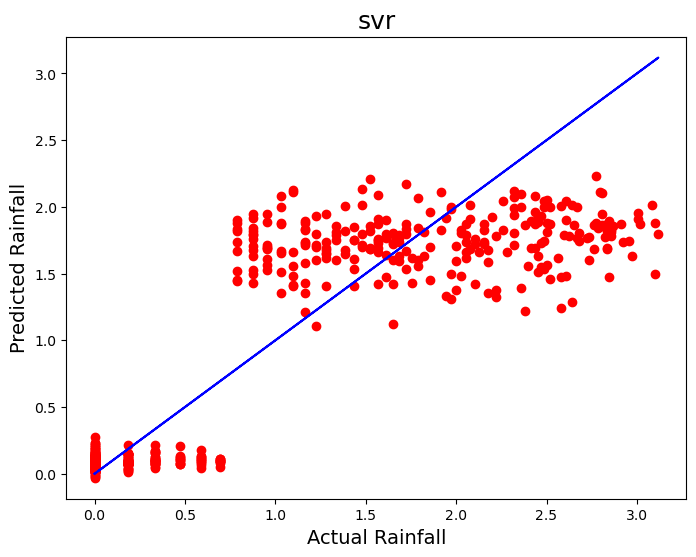

In [643]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('svr', fontsize=18) 
#plt.savefig('svr1.png')
plt.show()

# 

### XGB

In [644]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=10,learning_rate=0.1,n_estimators=165,colsample_bytree=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=165, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [645]:
y_pred = xgb.predict(x_test)

In [646]:
print('Accuracy Score:',xgb.score(x_train, y_train))

Accuracy Score: 0.9999563643770806


In [647]:
r2_score(y_test, y_pred)

0.8362817357843837

In [648]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.11088072605149307
RMSE 0.3329875764221438
MAE 0.173896581203901


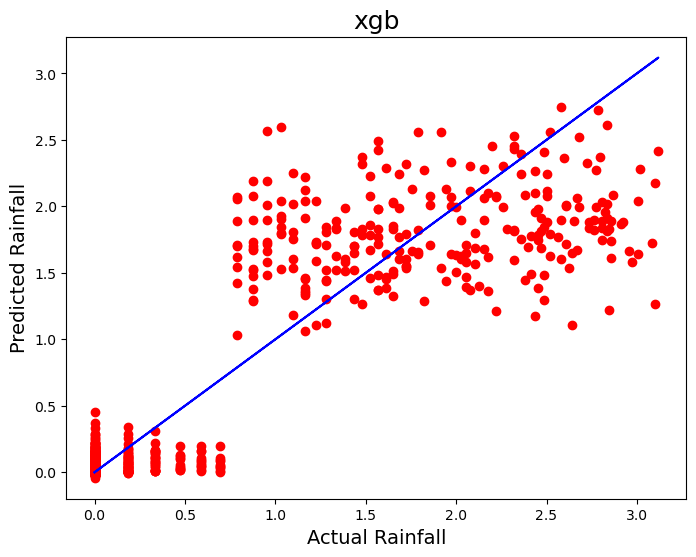

In [649]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('xgb', fontsize=18) 
#plt.savefig('xgb.png')
plt.show()

### Cross-validation for XGB

In [650]:
from sklearn.model_selection import cross_val_score

In [651]:
cv_score=cross_val_score (xgb, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [652]:
cv_score

array([0.82836053, 0.83119329, 0.83682142, 0.79559249, 0.8127538 ,
       0.82521529, 0.78811491, 0.82833709, 0.82752645, 0.79176207])

In [653]:
cv_mean

0.8165677338736502

In [654]:
cv_score=cross_val_score (xgb, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [655]:
cv_score

array([0.78590017, 0.79452644, 0.87340808, 0.81603654, 0.79473871,
       0.81879218, 0.7267305 , 0.8614317 , 0.71336763, 0.79358694])

In [656]:
cv_mean

0.7978518884384131

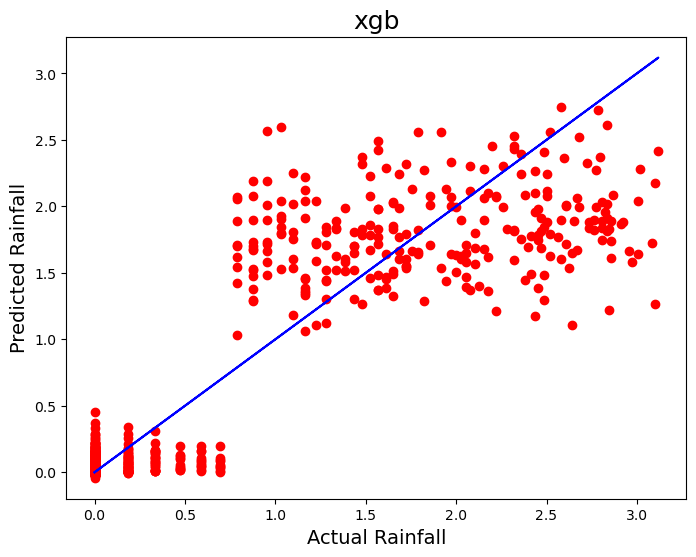

In [657]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('xgb', fontsize=18) 
#plt.savefig('xgb1.png')
plt.show()

# 

### GradientBoostingRegressor

In [658]:
from sklearn.ensemble import GradientBoostingRegressor

In [659]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': range(50, 250, 10),
              'learning_rate': [0.05, 0.1,0.15],
              'max_depth': range(3, 6),
              'min_samples_split': range(2, 5)}
gridsearch = GridSearchCV(estimator=gb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'learning_rate': 0.15,
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [660]:
gbt = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=7, min_samples_split=4)

In [661]:
gbt.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=4, n_estimators=300)

In [662]:
print('Accuracy Score:',gbt.score(x_train, y_train))

Accuracy Score: 0.9995327808591221


In [663]:
y_pred = gbt.predict(x_test)

In [664]:
r2_score(y_test, y_pred)

0.8442066413515177

In [665]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.10551346121159673
RMSE 0.32482835653864445
MAE 0.1741144742641915


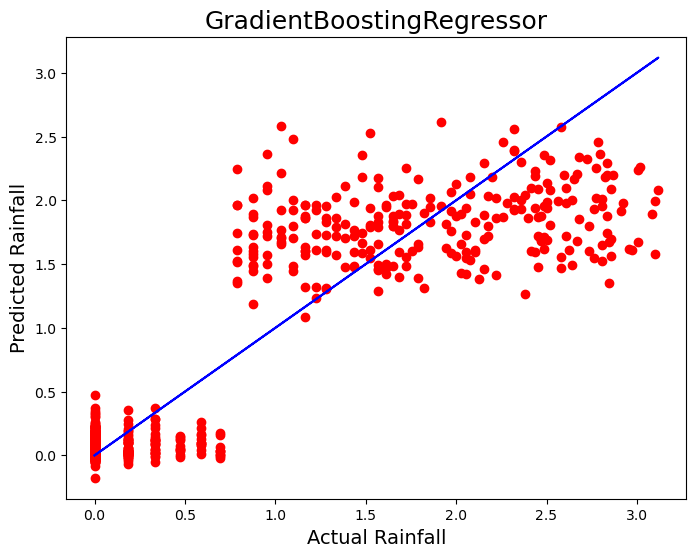

In [666]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('GradientBoostingRegressor', fontsize=18) 
#plt.savefig('gbt.png')
plt.show()

### Cross-validation for GradientBoostingRegressor

In [1898]:
from sklearn.model_selection import cross_val_score

In [1899]:
cv_score=cross_val_score (gbt, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [1900]:
cv_score

array([0.84323761, 0.83891954, 0.84036193, 0.80224637, 0.81927553,
       0.82159869, 0.80196177, 0.80556778, 0.82433605, 0.79629656])

In [1901]:
cv_mean

0.8193801826149059

In [1902]:
cv_score=cross_val_score (gbt, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [1903]:
cv_score

array([0.76375395, 0.83206733, 0.86300845, 0.81478859, 0.82775002,
       0.82902136, 0.72326947, 0.84292666, 0.69761802, 0.82549796])

In [1904]:
cv_mean

0.8019701821812818

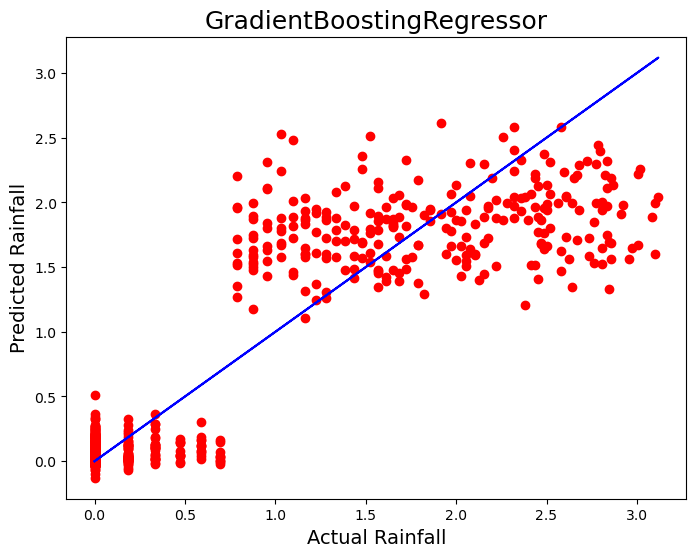

In [1905]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('GradientBoostingRegressor', fontsize=18) 
#plt.savefig('gbt1.png')
plt.show()

# 

### Lasso Regression

In [1906]:
from sklearn.linear_model import Lasso, LassoCV

In [1907]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [1908]:
alpha = lasscv.alpha_
alpha

1.2114858447386772e-05

In [1909]:
reg_lasso = Lasso(alpha)     
reg_lasso.fit(x_train, y_train)

Lasso(alpha=1.2114858447386772e-05)

In [1910]:
y_pred = reg_lasso.predict(x_test)

In [1911]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.8380003654324268


In [1912]:
r2_score(y_test, y_pred)

0.8463015514732586

In [1913]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.10409465093759257
RMSE 0.3226370266066692
MAE 0.18604131997747292


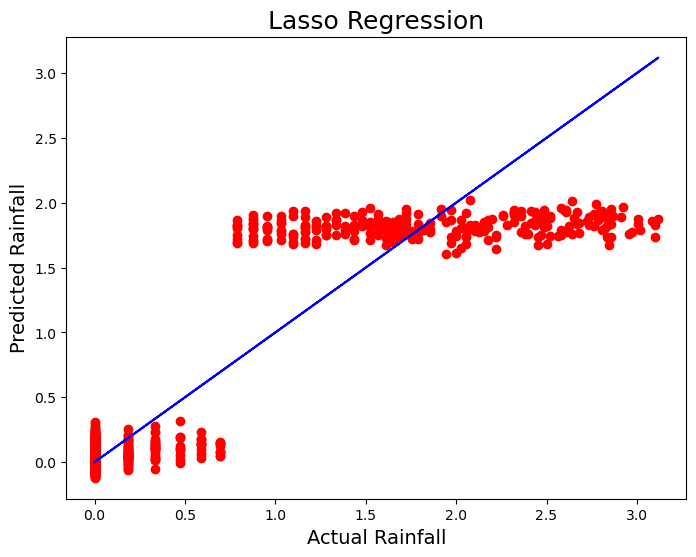

In [1914]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('Lasso Regression', fontsize=18) 
#plt.savefig('reg_lasso.png')
plt.show()

### Cross-validation for Lasso Regression

In [1915]:
from sklearn.model_selection import cross_val_score

In [1916]:
cv_score=cross_val_score (reg_lasso, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [1917]:
cv_score

array([0.86217736, 0.85773499, 0.83416557, 0.81865553, 0.85252387,
       0.83553571, 0.80938681, 0.82635084, 0.83749478, 0.81922141])

In [1918]:
cv_mean

0.8353246881092911

In [1919]:
cv_score=cross_val_score (reg_lasso, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [1920]:
cv_score

array([0.82712513, 0.84614805, 0.8691877 , 0.83166356, 0.84454994,
       0.85045877, 0.81181148, 0.84219778, 0.83313517, 0.83978958])

In [1921]:
cv_mean

0.8396067161298637

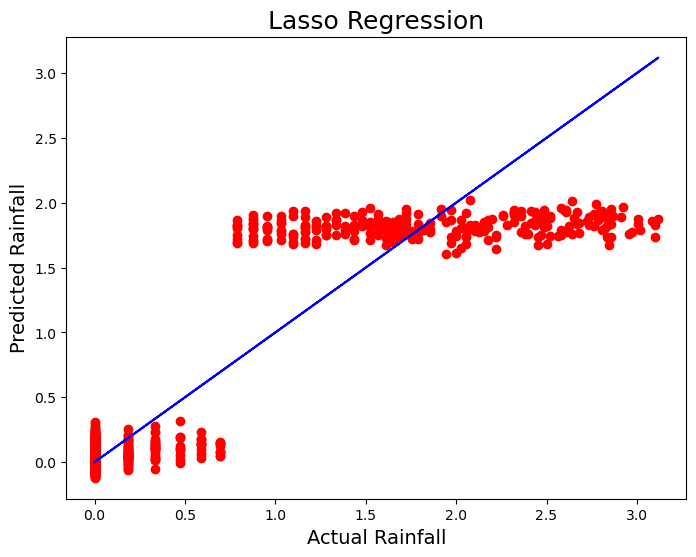

In [1922]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('Lasso Regression', fontsize=18) 
#plt.savefig('reg_lasso1.png')
plt.show()

# 

### Ridge Regression

In [1923]:
from sklearn.linear_model import Ridge, RidgeCV

In [1924]:
ridgecv = RidgeCV(alphas = np.arange(1,250,5), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246]),
        normalize=True)

In [1925]:
alpha = ridgecv.alpha_
alpha

1

In [1926]:
reg_rid = Ridge(alpha=ridgecv.alpha_) 
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

In [1927]:
y_pred = reg_rid.predict(x_test)

In [1928]:
print('Accuracy Score:',reg_rid.score(x_train, y_train))

Accuracy Score: 0.838000251477298


In [1929]:
r2_score(y_test, y_pred)

0.8462875873186461

In [1930]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.10410410837723466
RMSE 0.32265168274353484
MAE 0.1860818193332547


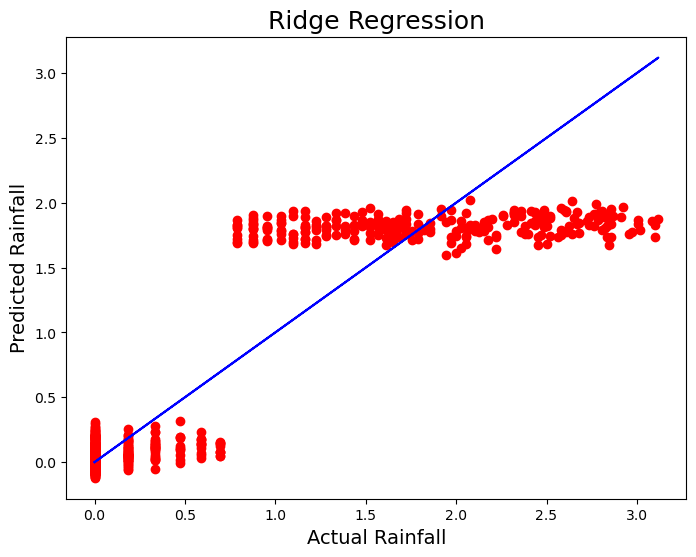

In [1931]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('Ridge Regression', fontsize=18) 
#plt.savefig('reg_rid.png')
plt.show()

### Cross-validation for Lasso Regression

In [1932]:
from sklearn.model_selection import cross_val_score

In [1933]:
cv_score=cross_val_score (reg_rid, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [1934]:
cv_score

array([0.86214903, 0.85769955, 0.83418754, 0.81867245, 0.85250179,
       0.83554236, 0.80943848, 0.82638594, 0.83750314, 0.81921934])

In [1935]:
cv_mean

0.8353299613149222

In [1936]:
cv_score=cross_val_score (reg_rid, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [1937]:
cv_score

array([0.82728036, 0.84619577, 0.86893141, 0.83184746, 0.84475782,
       0.85059827, 0.81200646, 0.84214544, 0.83313097, 0.83973894])

In [1938]:
cv_mean

0.8396632894462833

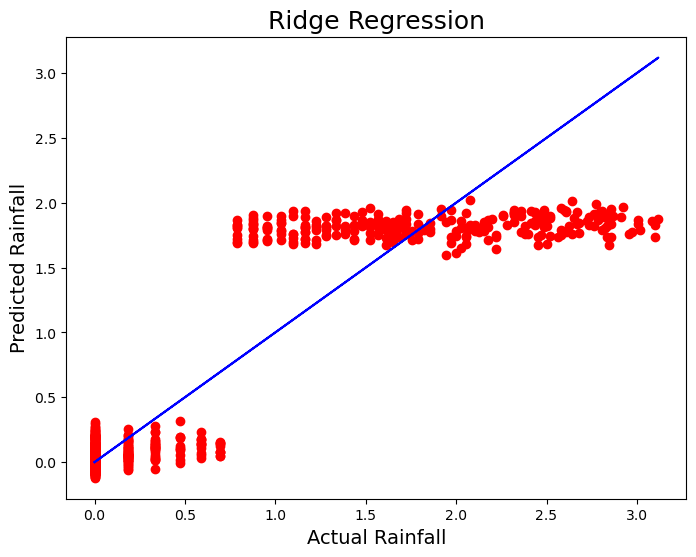

In [1939]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('Ridge Regression', fontsize=18) 
#plt.savefig('reg_rid1.png')
plt.show()

# 

### Best Model

### SVR

In [628]:
from sklearn.svm import SVR

In [1832]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [629]:
svr = SVR(kernel='rbf',C=1, gamma=0.01)

In [630]:
svr.fit(x_train, y_train)

SVR(C=1, gamma=0.01)

In [631]:
print('Accuracy Score:',svr.score(x_train, y_train))

Accuracy Score: 0.8434936536763842


In [632]:
y_pred = svr.predict(x_test)

In [633]:
r2_score(y_test, y_pred)

0.8359804715166834

In [634]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.1110847619353086
RMSE 0.33329380722615987
MAE 0.204297418819634


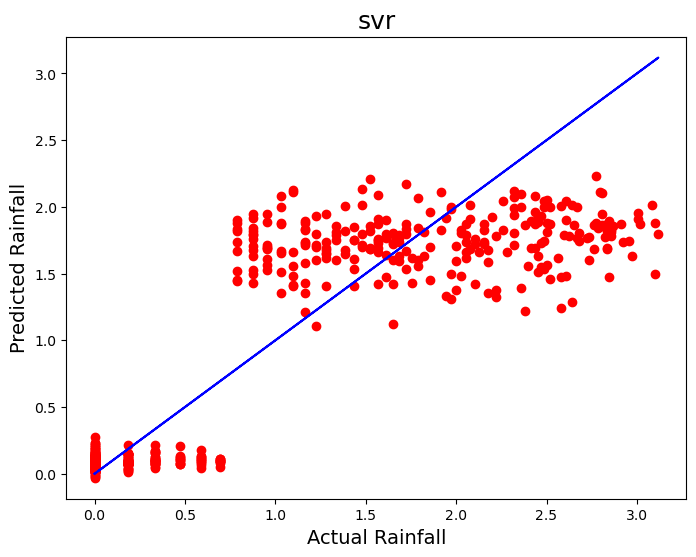

In [635]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('svr', fontsize=18) 
#plt.savefig('svr.png')
plt.show()

### Cross-validation for SVR

In [636]:
from sklearn.model_selection import cross_val_score

In [637]:
cv_score=cross_val_score (svr, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [638]:
cv_score

array([0.84485577, 0.85264069, 0.83261752, 0.82304646, 0.84315484,
       0.8384435 , 0.80492118, 0.82974212, 0.84118677, 0.82155913])

In [639]:
cv_mean

0.8332167987669328

In [640]:
cv_score=cross_val_score (svr, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [641]:
cv_score

array([0.83966758, 0.81613402, 0.82594233, 0.82156036, 0.82425436,
       0.87776338, 0.8268449 , 0.83640229, 0.80265525, 0.8113919 ])

In [642]:
cv_mean

0.828261636766956

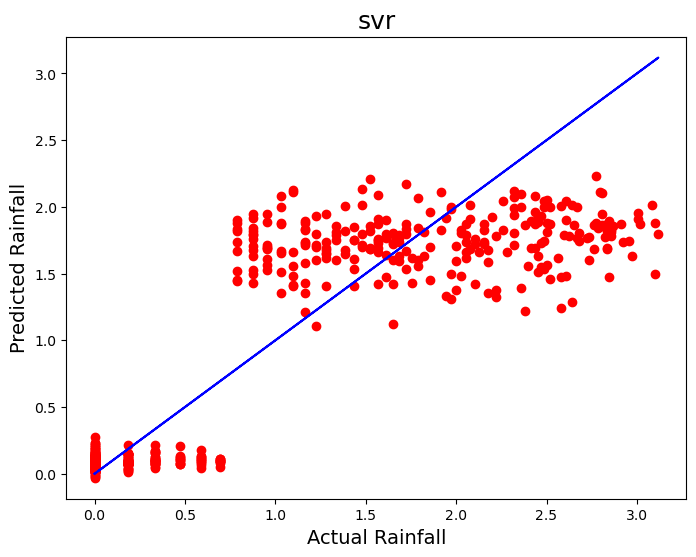

In [643]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('svr', fontsize=18) 
#plt.savefig('svr1.png')
plt.show()

### Reasons for selecting this Model

#### 1) Has one of the highest Training & Testing Score.
#### 2) Very little difference between Training & Testing Score.
#### 3) Training Score is less than Testing score
#### 4) Has one of the highest Training & Testing Score for Cross-Validation result.
#### 5) Very little difference between Training & Testing Score for Cross-Validation result.
#### 6) Training Score is less than Testing score for Cross-Validation result.
#### 7) Very less difference between Training Score & Training Score for Cross-Validation result
#### 8) Very less difference between Testing Score & Testing Score for Cross-Validation result

# 

### Saving the Best Mode

In [1]:
import pickle

In [2]:
with open('model_svr', 'wb') as f: 
    pickle.dump(svr, f)

NameError: name 'svr' is not defined

# 

# 

# 